# Analysing the reputation of Tesla using sentiment analysis

### Research objectives
The proposed study will aim to use sentiment analysis techniques to gauge public opinion about Tesla. Accordingly, the research questions to be investigated include:
 1. What is the overall sentiment on Twitter across geographies?
 2. How have the sentiments towards Tesla varied over time?
 3. Does the sentiment towards Tesla correlate with business performance and performance on the stock market?
 3. Is the performance of traditional Machine Learning (ML) models generally better than DL and Transformer models when classifying sentiment from tweets? 



### Data Collection
The dataset used for the proposed study was collected from Twitter using hashtags such as #Tesla, #TESLA.
The data was collected into a folder on my laptop and will uploaded into a Pandas dataframe before starting analysis.

### <u> Gettting the data into Pandas
4 Excel files containing sheets such as Tweets and Contributors were provided by the University for the analysis. This section will involve extracting the tweets and from the Tweets sheet and then using the location in the Contributors sheet. I can use the location data in the contributors sheet because of the Username and User columns that can be matched to the Tweets sheet

In [1]:
#getting pandas
import pandas as pd
pd.set_option('display.max_rows', None)

In [2]:
"""
-The idea is to create a list of the files
-Then after this combine all the data into a dataframe from the Tweets sheet in the different files
"""

#The file names containing the data that I need
file_names = [
    '#Tesla (#Teslamotors OR #Teslamodels OR #Teslastock OR #Tsla OR #ElonMusk) -isretweet langen.xlsx',
    '#Tesla (#Teslamotors OR #Teslamodels OR #Teslastock OR #Tsla OR #ElonMusk) -isretweet langen-1.xlsx',
    '#Tesla (#Teslamotors OR #Teslamodels OR #Teslastock OR #Tsla OR #ElonMusk) -isretweet langen-2.xlsx',
    '#Tesla (#Teslamotors OR #Teslamodels OR #Teslastock OR #Tsla OR #ElonMusk) -isretweet langen-3.xlsx',
    '#Tesla (#Teslamotors OR #Teslamodels OR #Teslastock OR #Tsla OR #ElonMusk) -isretweet langen-4.xlsx',
    '#Tesla (#Teslamotors OR #Teslamodels OR #Teslastock OR #Tsla OR #ElonMusk) -isretweet langen-5.xlsx'
             ]

#Looping to extract the tweets from the Tweets sheets in the different files
#reading the data from the different files above
data_frames = []
for file_name in file_names:
    try:
        df = pd.read_excel(file_name, sheet_name='Tweets')
        data_frames.append(df)
    except ValueError:
        pass

if data_frames:
    tesla = pd.concat(data_frames, ignore_index=True)
    print(f"{len(data_frames)} file(s) with 'Tweets' sheets found.")
    tesla.head()
else:
    print('No Tweets sheets found in any of the specified files.')

# Concatenate the data frames into one
tesla = pd.concat(data_frames, ignore_index=True)
tesla.head()

6 file(s) with 'Tweets' sheets found.


User          Username            UTC Date  \
0        skypeepzangiehot  @skypeepzangieh2 2022-12-07 22:24:55   
1             Gordon Anic   @doctorgfitness 2022-12-07 22:23:51   
2              Chief Twit    @elonchieftwit 2022-12-07 22:22:05   
3  Philippe JEAN-BAPTISTE   @PhilippeJB_PJB 2022-12-07 22:18:11   
4              Chief Twit    @elonchieftwit 2022-12-07 22:15:02   

                                               Tweet  Binders  \
0  @elonmusk   PLEASE READ THIS MISSIVE \nhttps:/...      NaN   
1  @brent_peabody Are they assuming that once #El...      NaN   
2  EM @elonmusk ‘Electric Ain’t Gonna Work’: Long...      NaN   
3  #ElonMusk #Tesla #EldenRing 2022 Gave Us Elon ...      NaN   
4  EM @elonmusk Germany’s EVs Near 40% Share – Te...      NaN   

                                           Permalink  Retweets  Likes count  \
0  https://www.twitter.com/user/status/1600617379...         0            0   
1  https://www.twitter.com/user/status/1600617110...         0            1   
2  https://www.twitter.com/user/status/1600616664...         0            0   
3  https://www.twitter.com/user/status/1600615682...         0            1   
4  https://www.twitter.com/user/status/1600614891...         0            0   

   Impressions  Quotes  Replies  Bookmarks  Tweet value  
0            0       0        0          0         0.92  
1            0       0        0          0         6.69  
2            0       0        0          0         1.09  
3            0       0        0          0         2.97  
4            0       0        0          0         1.09

In [3]:
#Properties of the dataframe
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56951 entries, 0 to 56950
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   User         56951 non-null  object        
 1   Username     56951 non-null  object        
 2   UTC Date     56951 non-null  datetime64[ns]
 3   Tweet        56951 non-null  object        
 4   Binders      0 non-null      float64       
 5   Permalink    56951 non-null  object        
 6   Retweets     56951 non-null  int64         
 7   Likes count  56951 non-null  int64         
 8   Impressions  56951 non-null  int64         
 9   Quotes       56951 non-null  int64         
 10  Replies      56951 non-null  int64         
 11  Bookmarks    56951 non-null  int64         
 12  Tweet value  56951 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 5.6+ MB


__Immediately repeating the same process for the Contributors sheets__

In [4]:
#Looping to extract the contributors from the Contributors sheets in the different files
#reading the data from the different files above
contributors_df = []
for file_name in file_names:
    try:
        df = pd.read_excel(file_name, sheet_name='Contributors')
        contributors_df.append(df)
    except ValueError:
        pass

if contributors_df:
    contributors = pd.concat(contributors_df, ignore_index=True)
    print(f"{len(contributors_df)} file(s) with 'Contributors' sheets found.")
    contributors.head()
else:
    print('No Contributors sheets found in any of the specified files.')

# Concatenate the data frames into one
contributors = pd.concat(contributors_df, ignore_index=True)
contributors.head()

2 file(s) with 'Contributors' sheets found.


User             Username                 Location  \
0  @HariSin80655831                 jsjs                      NaN   
1     @roomsmartzim  Room Smart Zimbabwe         Harare, Zimbabwe   
2       @Tamerz_NFT               Tamerz                  Cardano   
3   @abdullahimranz       Abdullah Imran                New Delhi   
4       @MrMadWhips       Mr.MadWhips 🇨🇦  Toronto, Ontario Canada   

   Total tweets  Retweets  Images  Links  Chats  Text tweets  Impressions  \
0             1         0       1      1      0            0            0   
1             1         0       1      5      0            0            0   
2             1         0       1      1      0            0            0   
3             1         0       0      1      0            0            0   
4             1         0       0      1      0            0            0   

   Quotes  Replies  Bookmarks  Tweet value  Followers  Following  \
0       0        6          0          NaN          7         31   
1       0        0          0          NaN         66        154   
2       3        8          0          NaN       2988        658   
3       0        1          0          NaN         12         53   
4       1        0          0          NaN        199        219   

                                                 Bio  User value  Tweets value  
0                                                NaN        0.03          0.04  
1  Room Smart supplies and fits high end smart ho...        0.20          0.26  
2                                                NaN        8.20         10.82  
3  Founder & CEO @Borgfy " A Venture  Studio - I ...        0.04          0.04  
4  Systems Engineer | Technology | Space | Busine...        0.62          0.68

In [5]:
contributors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User          19937 non-null  object 
 1   Username      19937 non-null  object 
 2   Location      13030 non-null  object 
 3   Total tweets  19937 non-null  int64  
 4   Retweets      19937 non-null  int64  
 5   Images        19937 non-null  int64  
 6   Links         19937 non-null  int64  
 7   Chats         19937 non-null  int64  
 8   Text tweets   19937 non-null  int64  
 9   Impressions   19937 non-null  int64  
 10  Quotes        19937 non-null  int64  
 11  Replies       19937 non-null  int64  
 12  Bookmarks     19937 non-null  int64  
 13  Tweet value   0 non-null      float64
 14  Followers     19937 non-null  int64  
 15  Following     19937 non-null  int64  
 16  Bio           17628 non-null  object 
 17  User value    19937 non-null  float64
 18  Tweets value  19937 non-nu

### <u> Examining the files after getting them into Pandas
Now that the relevant contents of the files are in Pandas, the next steps for me is to examine them and extract the relevant columns that I will be using for my analysis. (In the case of the contributors df, join relevant column to the tesla df).

In [6]:
tesla.head()

User          Username            UTC Date  \
0        skypeepzangiehot  @skypeepzangieh2 2022-12-07 22:24:55   
1             Gordon Anic   @doctorgfitness 2022-12-07 22:23:51   
2              Chief Twit    @elonchieftwit 2022-12-07 22:22:05   
3  Philippe JEAN-BAPTISTE   @PhilippeJB_PJB 2022-12-07 22:18:11   
4              Chief Twit    @elonchieftwit 2022-12-07 22:15:02   

                                               Tweet  Binders  \
0  @elonmusk   PLEASE READ THIS MISSIVE \nhttps:/...      NaN   
1  @brent_peabody Are they assuming that once #El...      NaN   
2  EM @elonmusk ‘Electric Ain’t Gonna Work’: Long...      NaN   
3  #ElonMusk #Tesla #EldenRing 2022 Gave Us Elon ...      NaN   
4  EM @elonmusk Germany’s EVs Near 40% Share – Te...      NaN   

                                           Permalink  Retweets  Likes count  \
0  https://www.twitter.com/user/status/1600617379...         0            0   
1  https://www.twitter.com/user/status/1600617110...         0            1   
2  https://www.twitter.com/user/status/1600616664...         0            0   
3  https://www.twitter.com/user/status/1600615682...         0            1   
4  https://www.twitter.com/user/status/1600614891...         0            0   

   Impressions  Quotes  Replies  Bookmarks  Tweet value  
0            0       0        0          0         0.92  
1            0       0        0          0         6.69  
2            0       0        0          0         1.09  
3            0       0        0          0         2.97  
4            0       0        0          0         1.09

__<u>Dropping some of the columns in the tesla dataframe:</u>__
This will involve dropping selected columns that I believe are not relevant to the analysis to be conducted

In [7]:
#removing columns that I don't need
tesla = tesla.drop(columns=['Binders', 'Permalink', 'Retweets', 'Likes count', 'Tweet value', 'Impressions',
                            'Quotes', 'Replies', 'Bookmarks'])
tesla.head()

User          Username            UTC Date  \
0        skypeepzangiehot  @skypeepzangieh2 2022-12-07 22:24:55   
1             Gordon Anic   @doctorgfitness 2022-12-07 22:23:51   
2              Chief Twit    @elonchieftwit 2022-12-07 22:22:05   
3  Philippe JEAN-BAPTISTE   @PhilippeJB_PJB 2022-12-07 22:18:11   
4              Chief Twit    @elonchieftwit 2022-12-07 22:15:02   

                                               Tweet  
0  @elonmusk   PLEASE READ THIS MISSIVE \nhttps:/...  
1  @brent_peabody Are they assuming that once #El...  
2  EM @elonmusk ‘Electric Ain’t Gonna Work’: Long...  
3  #ElonMusk #Tesla #EldenRing 2022 Gave Us Elon ...  
4  EM @elonmusk Germany’s EVs Near 40% Share – Te...

__<u>Joining the tesla and contributors dataframes:</u>__
Now that I have the preferred dataframe for tweets for now, I will join the locations and relevant columns in the contributors to this testla dataframe.

In [8]:
contributors.head()

User             Username                 Location  \
0  @HariSin80655831                 jsjs                      NaN   
1     @roomsmartzim  Room Smart Zimbabwe         Harare, Zimbabwe   
2       @Tamerz_NFT               Tamerz                  Cardano   
3   @abdullahimranz       Abdullah Imran                New Delhi   
4       @MrMadWhips       Mr.MadWhips 🇨🇦  Toronto, Ontario Canada   

   Total tweets  Retweets  Images  Links  Chats  Text tweets  Impressions  \
0             1         0       1      1      0            0            0   
1             1         0       1      5      0            0            0   
2             1         0       1      1      0            0            0   
3             1         0       0      1      0            0            0   
4             1         0       0      1      0            0            0   

   Quotes  Replies  Bookmarks  Tweet value  Followers  Following  \
0       0        6          0          NaN          7         31   
1       0        0          0          NaN         66        154   
2       3        8          0          NaN       2988        658   
3       0        1          0          NaN         12         53   
4       1        0          0          NaN        199        219   

                                                 Bio  User value  Tweets value  
0                                                NaN        0.03          0.04  
1  Room Smart supplies and fits high end smart ho...        0.20          0.26  
2                                                NaN        8.20         10.82  
3  Founder & CEO @Borgfy " A Venture  Studio - I ...        0.04          0.04  
4  Systems Engineer | Technology | Space | Busine...        0.62          0.68

In [9]:
#New tesla dataframe
tesla = pd.merge(
    tesla[['Username', 'UTC Date', 'Tweet']],
    contributors[['User', 'Location', 'Followers', 'Bio']],
    left_on='Username', right_on='User',
    how='left',
    suffixes=('_left', '_right')
)

#columns that I want to keep
tesla = tesla[['Username', 'UTC Date', 'Tweet', 'Location', 'Followers', 'Bio']]
tesla.head()

Username            UTC Date  \
0  @skypeepzangieh2 2022-12-07 22:24:55   
1   @doctorgfitness 2022-12-07 22:23:51   
2    @elonchieftwit 2022-12-07 22:22:05   
3   @PhilippeJB_PJB 2022-12-07 22:18:11   
4    @elonchieftwit 2022-12-07 22:15:02   

                                               Tweet              Location  \
0  @elonmusk   PLEASE READ THIS MISSIVE \nhttps:/...              colombia   
1  @brent_peabody Are they assuming that once #El...            Arvada, CO   
2  EM @elonmusk ‘Electric Ain’t Gonna Work’: Long...  Raya Lucaria Academy   
3  #ElonMusk #Tesla #EldenRing 2022 Gave Us Elon ...                 World   
4  EM @elonmusk Germany’s EVs Near 40% Share – Te...  Raya Lucaria Academy   

   Followers                                                Bio  
0      240.0  i am camgirl ,  visit my pag in onlyfans, i wa...  
1     2880.0  Take charge of your health and fitness! Be Mor...  
2      288.0                                                NaN  
3      979.0  🕵🏻‍♂️Consultant |👨🏻‍💼Managing Director |✍🏼Auth...  
4      288.0                                                NaN

In [10]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56951 entries, 0 to 56950
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Username   56951 non-null  object        
 1   UTC Date   56951 non-null  datetime64[ns]
 2   Tweet      56951 non-null  object        
 3   Location   39970 non-null  object        
 4   Followers  56948 non-null  float64       
 5   Bio        43671 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.6+ MB


__The collected Excel files have been examined and handled to become a dataset that I can start to use for my analysis.__

## Exploring the Tweets

Firstly, there are null values in columns such as location and bio, and this will be dealt with later. I will check for duplicates next

### Dealing with duplicate rows: focusing on selected columns.

In [11]:
#selecting key elements to check for duplicate rows
duplicate_rows = tesla[tesla.duplicated(subset=['Username', 'Tweet', 'Location'], keep=False)]
duplicate_rows = duplicate_rows.sort_values(by=['Username', 'Tweet', 'Location'])
duplicate_rows

Username            UTC Date  \
37670           @0xAims 2022-02-01 01:14:30   
37695           @0xAims 2022-02-01 00:36:41   
37739           @0xAims 2022-01-31 23:52:42   
37627           @0xAims 2022-02-01 13:40:34   
37668           @0xAims 2022-02-01 01:15:24   
37686           @0xAims 2022-02-01 00:47:42   
37719           @0xAims 2022-02-01 00:03:46   
37724           @0xAims 2022-02-01 00:01:52   
37743           @0xAims 2022-01-31 23:49:37   
37664           @0xAims 2022-02-01 01:41:07   
37690           @0xAims 2022-02-01 00:40:01   
37727           @0xAims 2022-01-31 23:59:38   
37737           @0xAims 2022-01-31 23:53:39   
37755           @0xAims 2022-01-31 23:19:57   
37707           @0xAims 2022-02-01 00:07:04   
37717           @0xAims 2022-02-01 00:04:32   
37689           @0xAims 2022-02-01 00:40:51   
37728           @0xAims 2022-01-31 23:59:28   
37720           @0xAims 2022-02-01 00:03:01   
37740           @0xAims 2022-01-31 23:52:31   
37699           @0xAims 2022-02-01 00:34:16   
37713           @0xAims 2022-02-01 00:05:38   
37723           @0xAims 2022-02-01 00:02:21   
37742           @0xAims 2022-01-31 23:52:11   
37747           @0xAims 2022-01-31 23:45:53   
37654           @0xAims 2022-02-01 02:14:22   
37752           @0xAims 2022-01-31 23:30:38   
37700           @0xAims 2022-02-01 00:27:49   
37736           @0xAims 2022-01-31 23:53:55   
37688           @0xAims 2022-02-01 00:43:51   
37731           @0xAims 2022-01-31 23:56:16   
37696           @0xAims 2022-02-01 00:36:14   
37710           @0xAims 2022-02-01 00:06:30   
37680           @0xAims 2022-02-01 00:59:31   
37681           @0xAims 2022-02-01 00:53:28   
37698           @0xAims 2022-02-01 00:35:43   
37709           @0xAims 2022-02-01 00:06:43   
37714           @0xAims 2022-02-01 00:05:23   
37662           @0xAims 2022-02-01 01:55:47   
37721           @0xAims 2022-02-01 00:02:40   
22074      @AAPKAVISHNU 2022-08-01 06:27:28   
22075      @AAPKAVISHNU 2022-08-01 06:27:21   
18410      @AAPKAVISHNU 2022-09-01 03:59:22   
18412      @AAPKAVISHNU 2022-09-01 03:58:58   
19845       @AFRIDI7720 2022-08-22 09:24:44   
21165       @AFRIDI7720 2022-08-16 06:41:31   
20344       @AFRIDI7720 2022-08-20 07:54:16   
21164       @AFRIDI7720 2022-08-16 06:43:26   
20342       @AFRIDI7720 2022-08-20 07:54:45   
21163       @AFRIDI7720 2022-08-16 06:43:41   
19846       @AFRIDI7720 2022-08-22 09:24:36   
21167       @AFRIDI7720 2022-08-16 06:40:48   
18779       @AFRIDI7720 2022-08-28 05:17:37   
18948       @AFRIDI7720 2022-08-27 14:14:44   
18778       @AFRIDI7720 2022-08-28 05:18:07   
18947       @AFRIDI7720 2022-08-27 14:14:50   
19625       @AFRIDI7720 2022-08-23 16:16:10   
18777       @AFRIDI7720 2022-08-28 05:18:21   
18946       @AFRIDI7720 2022-08-27 14:14:58   
35530       @AamaraTeng 2022-03-02 05:05:52   
35531       @AamaraTeng 2022-03-02 05:05:38   
20017         @Adori200 2022-08-21 13:50:53   
20557         @Adori200 2022-08-19 07:45:14   
10716    @Ahmet19852021 2022-11-01 15:35:23   
10717    @Ahmet19852021 2022-11-01 15:35:16   
10718    @Ahmet19852021 2022-11-01 15:35:09   
10719    @Ahmet19852021 2022-11-01 15:34:59   
10721    @Ahmet19852021 2022-11-01 15:34:32   
7458       @AldrinGiler 2022-11-13 19:15:50   
7459       @AldrinGiler 2022-11-13 19:15:23   
7460       @AldrinGiler 2022-11-13 19:13:35   
7461       @AldrinGiler 2022-11-13 19:13:00   
20320        @AlexLory2 2022-08-20 12:17:26   
20541        @AlexLory2 2022-08-19 10:20:37   
20321        @AlexLory2 2022-08-20 12:16:55   
20542        @AlexLory2 2022-08-19 10:19:29   
20287        @AlexLory2 2022-08-20 13:16:57   
20316        @AlexLory2 2022-08-20 12:20:47   
20319        @AlexLory2 2022-08-20 12:17:51   
20540        @AlexLory2 2022-08-19 10:21:28   
44789    @AliramaeiHiwa 2021-10-29 19:55:34   
44791    @AliramaeiHiwa 2021-10-29 19:54:42   
8637    @AndyJameTweets 2022-11-09 03:43:05   
8828    @AndyJameTweets 2022-11-08 13:48:07   
9129    @AndyJameTwe

__There are several duplicate rows. I will drop them and only keep the first row__

In [12]:
#dropping duplicate rows based on the columns Username, Tweet and Location
tesla = tesla.drop_duplicates(subset=['Username', 'Tweet', 'Location'], keep='first')
tesla = tesla.reset_index(drop=True)
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55026 entries, 0 to 55025
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Username   55026 non-null  object        
 1   UTC Date   55026 non-null  datetime64[ns]
 2   Tweet      55026 non-null  object        
 3   Location   38994 non-null  object        
 4   Followers  55023 non-null  float64       
 5   Bio        41957 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.5+ MB


__<u> Tweets by day__

In [13]:
#matplotlib
import matplotlib as matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [14]:
#Date in the dataset
start_date = tesla['UTC Date'].min()
end_date = tesla['UTC Date'].max()

# Printing the dates
print('Start date:', start_date)
print('Ending date:', end_date)
print('===========================================================================')
print ('The dataset is for the period between', start_date, 'and', end_date)

Start date: 2021-09-30 23:06:02
Ending date: 2022-12-31 23:46:33
The dataset is for the period between 2021-09-30 23:06:02 and 2022-12-31 23:46:33


The dataset is for the period between September 30, 2021 and December 31, 2022

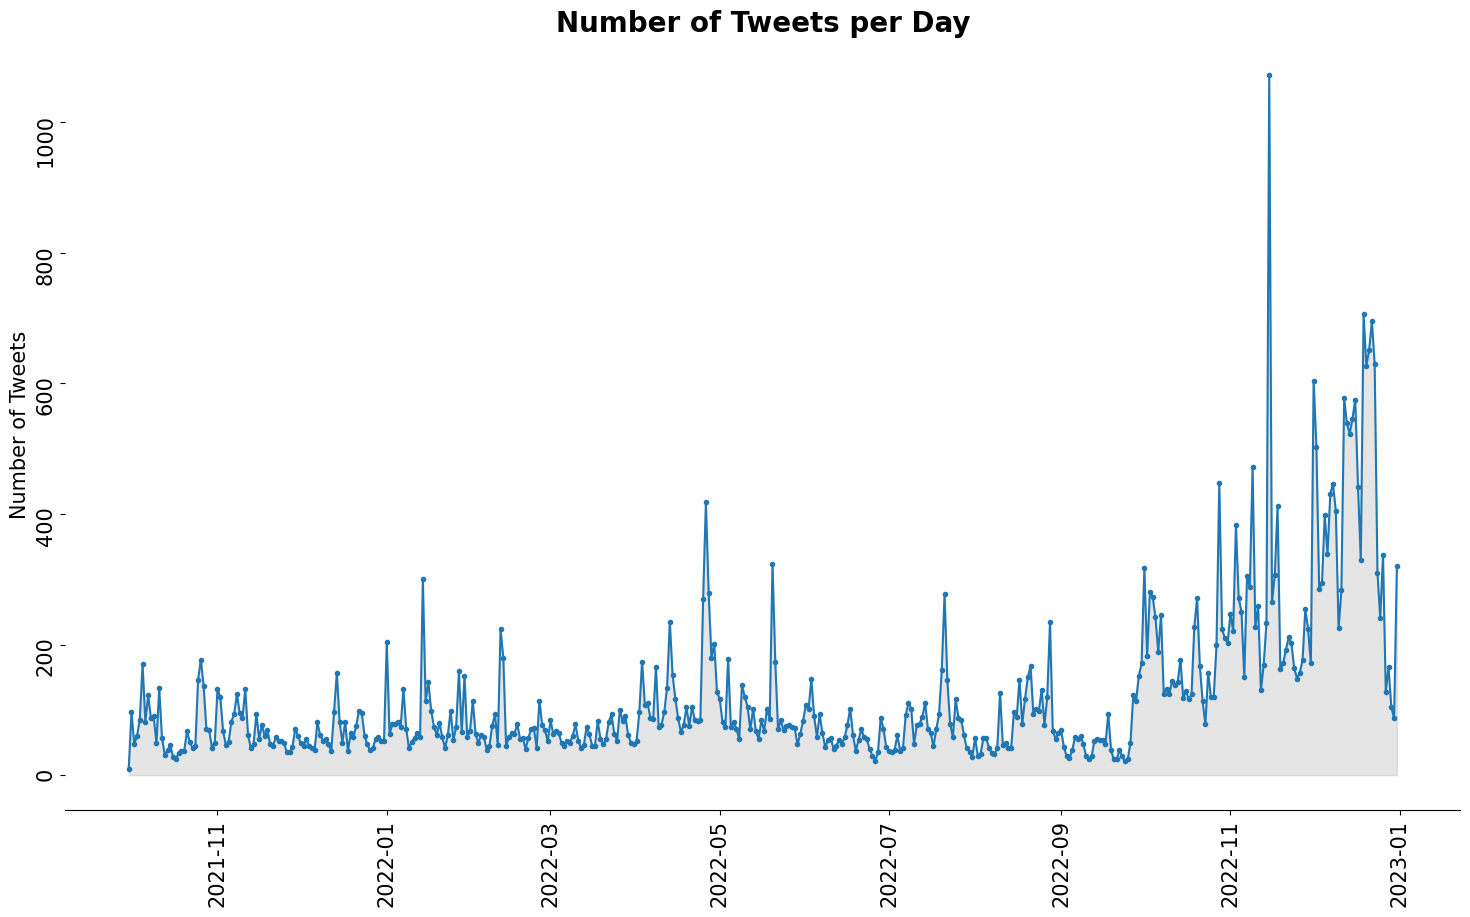

In [15]:
#Line plot of tweets count per day
tesla['Date'] = tesla['UTC Date'].dt.date
tweet_counts = tesla['Date'].value_counts().sort_index()

plt.figure(figsize=(18, 10))
plt.plot(tweet_counts.index, tweet_counts.values, marker='o', linestyle='-', markersize=3, label='Number of Tweets')
plt.title('Number of Tweets per Day', fontsize=20, fontweight='bold')
plt.xlabel('', fontsize=15)
plt.ylabel('Number of Tweets', fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=90, fontsize=15)
plt.fill_between(tweet_counts.index, tweet_counts.values, color='grey', alpha=0.2, label='Tweets Area')
sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()

In [16]:
#Date in the dataset
tesla = tesla[tesla['UTC Date'].dt.date != pd.to_datetime('2021-09-30').date()]

start_date = tesla['UTC Date'].min()
end_date = tesla['UTC Date'].max()

# Printing the dates
print('Start date:', start_date)
print('Ending date:', end_date)
print('===========================================================================')
print ('The dataset is for the period between', start_date, 'and', end_date)

Start date: 2021-10-01 00:22:26
Ending date: 2022-12-31 23:46:33
The dataset is for the period between 2021-10-01 00:22:26 and 2022-12-31 23:46:33


__Count of Tweets__

In [17]:
#average, minum and maximum number of tweets per day
average_tweets = tweet_counts.mean()
max_tweets = tweet_counts.max()
min_tweets = tweet_counts.min()
print(f"Average Number of Tweets per Day: {average_tweets:.2f}")
print(f"Maximum Number of Tweets per Day: {max_tweets}")
print(f"Minimum Number of Tweets per Day: {min_tweets}")

Average Number of Tweets per Day: 120.14
Maximum Number of Tweets per Day: 1072
Minimum Number of Tweets per Day: 9


__<u>Examining Locations__

In [18]:
#unique values in the location column
unique_locations = set()
for value in tesla['Location']:
    if value not in unique_locations:
        unique_locations.add(value)
        print(value)

colombia
Arvada, CO
Raya Lucaria Academy
World
Toronto, Ontario
Boulder, Co
nan
Canada
Chicago, IL
Sarasota, FL
Huntington Beach, CA
Fremont 
United States
London, England
England, United Kingdom
Western Hemisphere
Rotterdam, The Netherlands
Zambia
Marche - Porto San Giorgio
Ljubljana, Slovenia
Mumbai, India
Vancouver, BC  
USA
Texas, USA
Wall Street
Detroit, MI
GETTR  @ChoiceNewsNet
SpaceXXX
Delhi, India
Los Angeles, CA
I FOLLOW BACK WITHIN 1-3 DAYS 
London, UK
DM me about Promo Tweets 📢
Budapest
NAmerica/AsiaPac/Europe
World Citizen
NYC
Connecticut, USA
Earth, for now
Charleston, SC to the world
Palm Beach, FL
Singapore
Paris old EU
Chicago / Puerto Rico 
India
Tulsa, Oklahoma
Berlin, Germany
Jupiter,fl 
Columbus IN
New Delhi
Film City, Noida
Austalia
Seoul, Republic of Korea
Hustlers University
Missouri, USA
North America
Brookline, MA
Brussels
LA
Lagos, Nigeria
World Wide
Denmark
Columbus, Ohio
Seattle, WA
Earth
Harare, Zimbabwe
NY NY
Venice Fl
Merrick, New York 
US
Fort Worth, TX


__These locations will be looked at later in the notebook__

## Text Preprocessing
This section is about text preprocessing and actions such as lowercasing, removing hashtags, usernames, urls, htmls, special characters, stopwords, expanding contractions, and lemmatization. The required cleaning for the different modelling requirements will be carried out

In [19]:
#libraries to text preprocessing
import string
import re
from nltk.corpus import stopwords
import contractions
from nltk.tokenize import word_tokenize
STOPWORDS = set(stopwords.words('english'))
PUNCT_TO_REMOVE = string.punctuation

In [20]:
#https://www.kaggle.com/code/rajmehra03/a-complete-tweet-classfication-guide-word2vec-lstm
#https://www.kaggle.com/code/chirag9073/amazon-fine-food-reviews-sentiment-analysis
#https://www.kaggle.com/code/faressayah/sentiment-model-with-tensorflow-transformers

"""
Function to carry out the required tweet preprocessing
-DATA CLEANING FOR VADER BASED ON THE WORKS OF HUTTO and GILBERT
--Key highlight based on their work include - keep cases, keep question mark and exclamation marks. Keep but
"""

#custom list of stopwords
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.discard('but')

def clean_text(tweet):
    # remove urls
    tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet)

    # remove html
    tweet = re.sub(r'<.*?>', '', tweet)

    # remove username
    tweet = re.sub('@[^\s]+', '', tweet)

    # remove hashtags
    tweet = re.sub(r'#\w+\s*', '', tweet)

#     # remove emojis
#     tweet = re.sub("["
#                     u"\U0001F600-\U0001F64F"  # emoticons
#                     u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                     u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                     u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                     u"\U00002702-\U000027B0"
#                     u"\U000024C2-\U0001F251"
#                     "]+", '', tweet, flags=re.UNICODE)

#     tweet = ''.join(char for char in tweet if ord(char) < 128)

    # Handle specific case for "EM"
    tweet = re.sub(r'\bEM\b', '', tweet)

    # expand contractions
    tweet = contractions.fix(tweet)

    # remove punctuation except question marks and exclamation marks
    tweet = re.sub(r'[^\w\s?!]', ' ', tweet)

    # remove numbers
    tweet = re.sub(r'\b\d+\w*\b', '', tweet)

    # remove '’s'
    tweet = re.sub(r"’s", ' ', tweet)

    # Remove standalone 'amp' word
    tweet = ' '.join(word for word in tweet.split() if word.lower() != 'amp')

#     # convert tweets to lowercase and remove extra spaces
#     tweet = ' '.join(tweet.lower().split())

    # remove stopwords but keep the word 'but'
    words = word_tokenize(tweet)
    tweet = ' '.join([word for word in words if word not in custom_stopwords])

    return tweet 

# Doing the cleaning
tesla['New_Tweets'] = tesla['Tweet'].apply(clean_text)
tesla.head()

Username            UTC Date  \
0  @skypeepzangieh2 2022-12-07 22:24:55   
1   @doctorgfitness 2022-12-07 22:23:51   
2    @elonchieftwit 2022-12-07 22:22:05   
3   @PhilippeJB_PJB 2022-12-07 22:18:11   
4    @elonchieftwit 2022-12-07 22:15:02   

                                               Tweet              Location  \
0  @elonmusk   PLEASE READ THIS MISSIVE \nhttps:/...              colombia   
1  @brent_peabody Are they assuming that once #El...            Arvada, CO   
2  EM @elonmusk ‘Electric Ain’t Gonna Work’: Long...  Raya Lucaria Academy   
3  #ElonMusk #Tesla #EldenRing 2022 Gave Us Elon ...                 World   
4  EM @elonmusk Germany’s EVs Near 40% Share – Te...  Raya Lucaria Academy   

   Followers                                                Bio        Date  \
0      240.0  i am camgirl ,  visit my pag in onlyfans, i wa...  2022-12-07   
1     2880.0  Take charge of your health and fitness! Be Mor...  2022-12-07   
2      288.0                                                NaN  2022-12-07   
3      979.0  🕵🏻‍♂️Consultant |👨🏻‍💼Managing Director |✍🏼Auth...  2022-12-07   
4      288.0                                                NaN  2022-12-07   

                                          New_Tweets  
0                           PLEASE READ THIS MISSIVE  
1              Are assuming gone gone ? Tesla bigger  
2  Electric Are Going To Work Long Haul Truckers ...  
3  Gave Us Elon Musk Drama Every Month Whether li...  
4  Germany EVs Near Share Tesla Model Bestseller ...

In [21]:
#viewing the results of the cleaning by randomly selecting rows
tesla.Tweet.iloc[3800]

'@007 report back 🕶 \n\n#TweetSpecialEdition \n\n#Fren #Frens #Mutuals #Moots #RT #ReTweet #Viral #Crypto #Cryptocurrency #Blockchain #Bitcoin #Dogecoin #NFT #CryptoNFT #KFC #Minecraft #Meta #Metaverse #VR #Apple #AI #I #i #ElonMusk #Tesla #Doge #JB007 #JB #UK #US #USA'

In [22]:
#viewing the results of the cleaning by randomly selecting rows
tesla.New_Tweets.iloc[3800]

'report back'

In [23]:
#viewing the results of the cleaning by randomly selecting rows
tesla.Tweet.iloc[279]

'Tesla Sales in Germany Climb 93% in November\n\nDecember 7th, 2022.\nTesla’s presence in the German automotive market is growing as the Texas-based automaker continues to ramp production at Giga Berlin. \n\nhttps://t.co/5OeAh525dp\n\n#Tesla #TeslaNews #TeslaUpdate #News #TSLA https://t.co/lDQXOq5hZC'

In [24]:
#viewing the results of the cleaning by randomly selecting rows
tesla.New_Tweets.iloc[279]

'Tesla Sales Germany Climb November December Tesla presence German automotive market growing Texas based automaker continues ramp production Giga Berlin'

### Lemmatizing the Texts

In [25]:
from nltk.stem import WordNetLemmatizer

In [26]:
#function to lemmatize tweets
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

In [27]:
lemmatizer = WordNetLemmatizer()
tesla['New_Tweets_2'] = tesla['New_Tweets'].apply(lemmatize_text)
tesla.New_Tweets.iloc[5800]

'The full Elon less combative time Wilmington courtroom'

### Extracting hashtags and Mentions

In [28]:
#get hashtags
def get_hashtags(text):
    hashtags = re.findall(r'#(\w+)', text)
    if hashtags:
        return " ".join(hashtags)
    else:
        return None


tesla['hashtag'] = tesla['Tweet'].apply(get_hashtags)
tesla.head()

Username            UTC Date  \
0  @skypeepzangieh2 2022-12-07 22:24:55   
1   @doctorgfitness 2022-12-07 22:23:51   
2    @elonchieftwit 2022-12-07 22:22:05   
3   @PhilippeJB_PJB 2022-12-07 22:18:11   
4    @elonchieftwit 2022-12-07 22:15:02   

                                               Tweet              Location  \
0  @elonmusk   PLEASE READ THIS MISSIVE \nhttps:/...              colombia   
1  @brent_peabody Are they assuming that once #El...            Arvada, CO   
2  EM @elonmusk ‘Electric Ain’t Gonna Work’: Long...  Raya Lucaria Academy   
3  #ElonMusk #Tesla #EldenRing 2022 Gave Us Elon ...                 World   
4  EM @elonmusk Germany’s EVs Near 40% Share – Te...  Raya Lucaria Academy   

   Followers                                                Bio        Date  \
0      240.0  i am camgirl ,  visit my pag in onlyfans, i wa...  2022-12-07   
1     2880.0  Take charge of your health and fitness! Be Mor...  2022-12-07   
2      288.0                                                NaN  2022-12-07   
3      979.0  🕵🏻‍♂️Consultant |👨🏻‍💼Managing Director |✍🏼Auth...  2022-12-07   
4      288.0                                                NaN  2022-12-07   

                                          New_Tweets  \
0                           PLEASE READ THIS MISSIVE   
1              Are assuming gone gone ? Tesla bigger   
2  Electric Are Going To Work Long Haul Truckers ...   
3  Gave Us Elon Musk Drama Every Month Whether li...   
4  Germany EVs Near Share Tesla Model Bestseller ...   

                                        New_Tweets_2  \
0                           PLEASE READ THIS MISSIVE   
1              Are assuming gone gone ? Tesla bigger   
2  Electric Are Going To Work Long Haul Truckers ...   
3  Gave Us Elon Musk Drama Every Month Whether li...   
4  Germany EVs Near Share Tesla Model Bestseller ...   

                                             hashtag  
0  elonmusk tesla spacex elonmuskmemes teslamotor...  
1                                Elon Tesla ElonMusk  
2                              ElonMusk Tesla SpaceX  
3                           ElonMusk Tesla EldenRing  
4                              ElonMusk Tesla SpaceX

In [29]:
#get mentions
def get_mentions(text):
    mentions = re.findall(r'@(\w+)', text)
    if mentions:
        return " ".join(mentions)
    else:
        return None

tesla['mentions'] = tesla['Tweet'].apply(get_mentions)
tesla.head()

Username            UTC Date  \
0  @skypeepzangieh2 2022-12-07 22:24:55   
1   @doctorgfitness 2022-12-07 22:23:51   
2    @elonchieftwit 2022-12-07 22:22:05   
3   @PhilippeJB_PJB 2022-12-07 22:18:11   
4    @elonchieftwit 2022-12-07 22:15:02   

                                               Tweet              Location  \
0  @elonmusk   PLEASE READ THIS MISSIVE \nhttps:/...              colombia   
1  @brent_peabody Are they assuming that once #El...            Arvada, CO   
2  EM @elonmusk ‘Electric Ain’t Gonna Work’: Long...  Raya Lucaria Academy   
3  #ElonMusk #Tesla #EldenRing 2022 Gave Us Elon ...                 World   
4  EM @elonmusk Germany’s EVs Near 40% Share – Te...  Raya Lucaria Academy   

   Followers                                                Bio        Date  \
0      240.0  i am camgirl ,  visit my pag in onlyfans, i wa...  2022-12-07   
1     2880.0  Take charge of your health and fitness! Be Mor...  2022-12-07   
2      288.0                                                NaN  2022-12-07   
3      979.0  🕵🏻‍♂️Consultant |👨🏻‍💼Managing Director |✍🏼Auth...  2022-12-07   
4      288.0                                                NaN  2022-12-07   

                                          New_Tweets  \
0                           PLEASE READ THIS MISSIVE   
1              Are assuming gone gone ? Tesla bigger   
2  Electric Are Going To Work Long Haul Truckers ...   
3  Gave Us Elon Musk Drama Every Month Whether li...   
4  Germany EVs Near Share Tesla Model Bestseller ...   

                                        New_Tweets_2  \
0                           PLEASE READ THIS MISSIVE   
1              Are assuming gone gone ? Tesla bigger   
2  Electric Are Going To Work Long Haul Truckers ...   
3  Gave Us Elon Musk Drama Every Month Whether li...   
4  Germany EVs Near Share Tesla Model Bestseller ...   

                                             hashtag       mentions  
0  elonmusk tesla spacex elonmuskmemes teslamotor...       elonmusk  
1                                Elon Tesla ElonMusk  brent_peabody  
2                              ElonMusk Tesla SpaceX       elonmusk  
3                           ElonMusk Tesla EldenRing           None  
4                              ElonMusk Tesla SpaceX       elonmusk

In [30]:
#tokenizing the hashtags and mentions
tesla['hashtag'] = tesla['hashtag'].str.split()
tesla['mentions'] = tesla['mentions'].str.split()
tesla.head()

Username            UTC Date  \
0  @skypeepzangieh2 2022-12-07 22:24:55   
1   @doctorgfitness 2022-12-07 22:23:51   
2    @elonchieftwit 2022-12-07 22:22:05   
3   @PhilippeJB_PJB 2022-12-07 22:18:11   
4    @elonchieftwit 2022-12-07 22:15:02   

                                               Tweet              Location  \
0  @elonmusk   PLEASE READ THIS MISSIVE \nhttps:/...              colombia   
1  @brent_peabody Are they assuming that once #El...            Arvada, CO   
2  EM @elonmusk ‘Electric Ain’t Gonna Work’: Long...  Raya Lucaria Academy   
3  #ElonMusk #Tesla #EldenRing 2022 Gave Us Elon ...                 World   
4  EM @elonmusk Germany’s EVs Near 40% Share – Te...  Raya Lucaria Academy   

   Followers                                                Bio        Date  \
0      240.0  i am camgirl ,  visit my pag in onlyfans, i wa...  2022-12-07   
1     2880.0  Take charge of your health and fitness! Be Mor...  2022-12-07   
2      288.0                                                NaN  2022-12-07   
3      979.0  🕵🏻‍♂️Consultant |👨🏻‍💼Managing Director |✍🏼Auth...  2022-12-07   
4      288.0                                                NaN  2022-12-07   

                                          New_Tweets  \
0                           PLEASE READ THIS MISSIVE   
1              Are assuming gone gone ? Tesla bigger   
2  Electric Are Going To Work Long Haul Truckers ...   
3  Gave Us Elon Musk Drama Every Month Whether li...   
4  Germany EVs Near Share Tesla Model Bestseller ...   

                                        New_Tweets_2  \
0                           PLEASE READ THIS MISSIVE   
1              Are assuming gone gone ? Tesla bigger   
2  Electric Are Going To Work Long Haul Truckers ...   
3  Gave Us Elon Musk Drama Every Month Whether li...   
4  Germany EVs Near Share Tesla Model Bestseller ...   

                                             hashtag         mentions  
0  [elonmusk, tesla, spacex, elonmuskmemes, tesla...       [elonmusk]  
1                            [Elon, Tesla, ElonMusk]  [brent_peabody]  
2                          [ElonMusk, Tesla, SpaceX]       [elonmusk]  
3                       [ElonMusk, Tesla, EldenRing]             None  
4                          [ElonMusk, Tesla, SpaceX]       [elonmusk]

### Column for what is mentioned in tweets

In [31]:
"""
checking for tweets mentioning Tesla only
"""
def classify_tweet(tweet_tokens):
    tweet_tokens_lower = [token.lower() for token in tweet_tokens]
    
    contains_tesla_or_tsla = any(keyword in tweet_tokens_lower for keyword in ['tesla', 'teslas', 'tsla'])
    contains_other_words = any(word in tweet_tokens_lower for word in ['em', 'elon', 'musk', 'elonmusk'])
    
    if contains_tesla_or_tsla and not contains_other_words:
        return 'Yes'
    elif contains_other_words and not contains_tesla_or_tsla:
        return 'No'
    else:
        return 'Both'

tesla['New_Tweets_tokenized'] = tesla['New_Tweets'].str.split()    
tesla['Tesla_only_mentions_in_tweet_content'] = tesla['New_Tweets_tokenized'].apply(classify_tweet)
tesla['Tesla_only_mentions_in_tweet_content'].value_counts()

Tesla_only_mentions_in_tweet_content
Both    30681
Yes     15543
No       8793
Name: count, dtype: int64

In [32]:
"""
Creating dataframes for them
"""
pd.set_option('display.max_colwidth', None)
mentions_tesla_only = tesla[tesla['Tesla_only_mentions_in_tweet_content'] == 'Yes']
mentions_musk_only = tesla[tesla['Tesla_only_mentions_in_tweet_content'] == 'No']
mentions_tesla_musk = tesla[tesla['Tesla_only_mentions_in_tweet_content'] == 'Both']
mentions_tesla_only.head(10)

Username            UTC Date  \
1    @doctorgfitness 2022-12-07 22:23:51   
2     @elonchieftwit 2022-12-07 22:22:05   
4     @elonchieftwit 2022-12-07 22:15:02   
9     @elonchieftwit 2022-12-07 22:01:06   
10    @elonchieftwit 2022-12-07 22:01:04   
11    @elonchieftwit 2022-12-07 22:01:03   
13   @leoventuresllc 2022-12-07 21:53:47   
14  @ariegoldshlager 2022-12-07 21:49:20   
18    @elonchieftwit 2022-12-07 21:41:08   
21      @BulletRouge 2022-12-07 21:19:35   

                                                                                                                                                                                                                                                                                 Tweet  \
1                                                                                                                                                                @brent_peabody Are they assuming that once #Elon is gone the #Tesla will be gone too? Tesla is bigger than #ElonMusk.   
2                                                                                                                 EM @elonmusk ‘Electric Ain’t Gonna Work’: Long-Haul Truckers In Wyoming Not Fans Of Tesla Semi - Cowboy State Daily https://t.co/dmZTweUk41 #ElonMusk #Tesla #SpaceX   
4                                                                                                                                                EM @elonmusk Germany’s EVs Near 40% Share – Tesla Model 3 Bestseller - CleanTechnica https://t.co/7UpZLR38eL #ElonMusk #Tesla #SpaceX   
9                                                                                                                                    EM @elonmusk China's EV giant BYD takes on Tesla close to home - The Australian Financial Review https://t.co/c2goU0Vp0G #ElonMusk #Tesla #SpaceX   
10                                                                                                                                    EM @elonmusk Why This Market Is So Dangerous; Tesla Nears Bear Lows - Investor's Business Daily https://t.co/R8093lHt8T #ElonMusk #Tesla #SpaceX   
11                                                                                                                           EM @elonmusk BYD VP does not see Tesla as a competitor: “Our enemy is the combustion engine” - TESLARATI https://t.co/CEjgrh740n #ElonMusk #Tesla #SpaceX   
13                                                                                                                                                          Tesla..What Can You Say!! #tesla #tsla #stock #stockmarket #options #money #cars #tech #technology https://t.co/fPGCXfUouu   
14  #Tesla #TSLA \nTesla loses bid for new trial in factory worker's race bias case \n"Diaz in a 2017 lawsuit said Tesla failed to act when other employees at the Fremont factory used racist slurs and scrawled swastikas and epithets on bathroom walls." \nhttps://t.co/3vrKKxA0Ef   
18                                                                                                                                                  EM @elonmusk Tesla Inc. stock falls Wednesday, underperforms market - MarketWatch https://t.co/Tsg5GCH7jb #ElonMusk #Tesla #SpaceX   
21                                                         When backing my tesla into my garage it triggered my garage door to start closing. Feel like rear facing camera should notice that sort of thing and have stopped before it came down on top of my tesla?\n#ELONMUSK #Tesla   

                Location  Followers  \
1             Arvada, CO     2880.0   
2   Raya Lucaria Academy      288.0   
4   Raya Lucaria Academy      288.0   
9   Raya Lucaria Academy      288.0   
10  Raya Lucaria Academy      288.0   
11  Raya Lucaria Academy      288.0   
13           Chicago, IL      309.0   
14          Sarasota, FL    15241.0   
18  Raya Lucaria Academy      288.0   
21                   NaN        6.

In [33]:
#mentions elon musk
mentions_musk_only.head(10)

Username            UTC Date  \
7    @BenitoDelRay 2022-12-07 22:09:32   
12  @elonchieftwit 2022-12-07 21:56:03   
16  @elonchieftwit 2022-12-07 21:42:35   
17  @elonchieftwit 2022-12-07 21:42:33   
27  @elonchieftwit 2022-12-07 21:09:35   
28  @elonchieftwit 2022-12-07 21:09:33   
31  @elonchieftwit 2022-12-07 20:56:03   
32  @elonchieftwit 2022-12-07 20:49:04   
34    @WatchlistsC 2022-12-07 20:44:42   
39  @elonchieftwit 2022-12-07 20:23:02   

                                                                                                                                                                                                                                                                                      Tweet  \
7                                               Elon Dogecoin Cyborg 6 T-Shirt 🔥HOT SELLER🔥\n#TrendingNow #Trending #elonmusk #dogecoin #tesla #cryptocurrency #Bitcoin #cryptotrader #doge #Dogechain #dogearmy #Elon $DOGE $BTC $DOGE $SHIBA $ETH $ADA $XRP $DOT\nhttps://t.co/TSKTATbdle   
12                                                                                                                                               EM @elonmusk Miami Mayor Courts Elon Musk to Move Twitter to Magic City - Miami New Times https://t.co/J77cLZiz2U #ElonMusk #Tesla #SpaceX   
16                                                                                                                                              EM @elonmusk Elon Musk Lost The Title Of World's Richest Man, But Not For Long - SlashGear https://t.co/bu1Xm1Fona #ElonMusk #Tesla #SpaceX   
17                                                                                                                                                                          EM @elonmusk 2022 Gave Us Elon Musk Drama Every Month - Kotaku https://t.co/q9wWXxyyTw #ElonMusk #Tesla #SpaceX   
27                                                                                                                         EM @elonmusk Elon Musk's Twitter Blue subscription causes chaos, conflicting opinions, imposters - Daily Illini https://t.co/pBiaes0Yyi #ElonMusk #Tesla #SpaceX   
28                                                                                                                           EM @elonmusk Elon Musk's challenge will be to find the right advertisers for Twitter, says Taboola CEO - CNBC https://t.co/mPrs9kaEyD #ElonMusk #Tesla #SpaceX   
31                                                                                                                                                                EM @elonmusk Elon Musk's delusional fixation on code at Twitter. - Slate https://t.co/qMGF5j6lTu #ElonMusk #Tesla #SpaceX   
32                                                                                                                                                 EM @elonmusk Elon Musk briefly loses top spot on Forbes billionaire list - The National https://t.co/8yxHHwJrg1 #ElonMusk #Tesla #SpaceX   
34  Elon #Musk is likely to lose his spot as the richest person in the world to Bernard Arnault.\n\nSource: https://t.co/0mzCksqbw2\n#ElonMusk #Elon #BILLIONAIRE #billionaires #Riches #wealth #tech #technews #Forbes #BernanrdArnault #Arnault #SpaceX #Tesla #BoringCompany #CryptoNews   
39                                                                                                                                                 EM @elonmusk Elon Musk fires Twitter Deputy General Counsel James Baker - Yahoo Finance https://t.co/xVMuC2sxmQ #ElonMusk #Tesla #SpaceX   

                Location  Followers  \
7                    NaN      513.0   
12  Raya Lucaria Academy      288.0   
16  Raya Lucaria Academy      288.0   
17  Raya Lucaria Academy      288.0   
27  Raya Lucaria Academy      288.0   
28  Raya Lucaria Academy      288.0   
31  Raya Lucaria Academy      288.0   
32  Raya Lucaria Academy      288.0   
34                   NaN      333.0   

In [34]:
#contains both musk and tesla
mentions_tesla_musk.head(10)

Username            UTC Date  \
0   @skypeepzangieh2 2022-12-07 22:24:55   
3    @PhilippeJB_PJB 2022-12-07 22:18:11   
5      @nunziopresta 2022-12-07 22:14:20   
6      @ItsMe_DavidV 2022-12-07 22:10:59   
8      @Drive_Better 2022-12-07 22:09:01   
15    @elonchieftwit 2022-12-07 21:44:33   
19    @elonchieftwit 2022-12-07 21:41:06   
20     @ItsElectricV 2022-12-07 21:32:27   
22     @tinsaearegay 2022-12-07 21:18:16   
23    @elonchieftwit 2022-12-07 21:14:04   

                                                                                                                                                                                                                                               Tweet  \
0                                                                                                                 @elonmusk   PLEASE READ THIS MISSIVE \nhttps://t.co/lrH6Zl8WcT\n\n#elonmusk #tesla #spacex #elonmuskmemes #teslamotors #teslamodel   
3   #ElonMusk #Tesla #EldenRing 2022 Gave Us Elon Musk Drama Every Month: Whether you like it or not, Tesla/SpaceX/The Boring Company/Twitter/Neuralink CEO Elon Musk is inherently influential as the planet’s wealthiest … https://t.co/jO4bTklrk8   
5                                                                                                                    #ElonMusk sent an email to the staff at #Tesla with his 6 rules for productivity. Unsurprisingly, it leaked.\n\nHere they are 👇   
6                                                                                                                                                         Next up: v3 😎 \n\n#buildInPublic #tesla #tsla #widgets #iOSwidgets https://t.co/UVJ4MlDa7d   
8                                                                             #ElonMusk’s #Twitter is full of people swearing off #Tesla https://t.co/RcxMJQcSCh @drivingdotca @elonmusk @Twitter @Tesla #auto #car #driving https://t.co/TbbadBhmOs   
15                                                                                                            EM @elonmusk SpaceX launches new cargo Dragon spacecraft to space station - SpaceNews https://t.co/wMGlYRZiPq #ElonMusk #Tesla #SpaceX   
19                                                                                                       EM @elonmusk Tesla SEC Deal Ruled Off-Limits in Musk Tweet-Fraud Trial (1) - Bloomberg Law https://t.co/UmgHcZPTSM #ElonMusk #Tesla #SpaceX   
20                                                                                                                                              #EV #ElectricVehicles Elon Musk on WHY he invested in Tesla #tesla #elonmusk https://t.co/3eTwgI88bP   
22                                                         @Tesla To Bring Back Updated HD Radar And Launch Autopilot HW4 In Mid-January Suggests FCC Finding\n#Tesla #ELONMUSK #AutopilotHW4\n-\nhttps://t.co/H0kjZNTHGu\n- https://t.co/B1qH0GYHSc   
23                                                                                                         EM @elonmusk Tesla Judge Rules SEC Deal Off-Limits in Musk Tweet-Fraud Trial - Bloomberg https://t.co/i3Uqcp8cNY #ElonMusk #Tesla #SpaceX   

                Location  Followers  \
0               colombia      240.0   
3                  World      979.0   
5       Toronto, Ontario     2874.0   
6            Boulder, Co       77.0   
8                 Canada     1005.0   
15  Raya Lucaria Academy      288.0   
19  Raya Lucaria Academy      288.0   
20                   NaN        5.0   
22                   NaN      282.0   
23  Raya Lucaria Academy      288.0   

                                                                                                                                               Bio  \
0          i am camgirl ,  visit my pag in onlyfans, i wait for you #webcamer #camgirl  #sexygirl   #brunette #latina #Deutschland #australia  #UK   
3   🕵🏻‍♂️Consultant |👨🏻‍💼Managing Director |✍🏼Author |👨🏼‍🏫Teach |👨🏻‍

__Removing rows not in English language__

In [35]:
#https://pypi.org/project/langdetect/
from langdetect import detect
from langdetect import detect_langs
from langdetect.detector_factory import DetectorFactory

In [36]:
#https://www.kaggle.com/code/keitazoumana/langdetect-and-fasttext-for-language-detection/notebook
#Tweets not in English language
DetectorFactory.seed = 0
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

In [37]:
%%time
#applying the function
tesla['language'] = tesla['New_Tweets'].apply(detect_language)

CPU times: total: 3min 1s
Wall time: 3min 2s


In [38]:
#printing rows with non-English language
pd.set_option('display.max_colwidth', None)
non_english_tweets_df = tesla[tesla['language'] != 'en']
non_english_tweets_df.head(10)

Username            UTC Date  \
1   @doctorgfitness 2022-12-07 22:23:51   
6     @ItsMe_DavidV 2022-12-07 22:10:59   
18   @elonchieftwit 2022-12-07 21:41:08   
33   @elonchieftwit 2022-12-07 20:46:33   
38   @elonchieftwit 2022-12-07 20:33:02   
44   @elonchieftwit 2022-12-07 20:12:03   
46  @AndyJameTweets 2022-12-07 20:01:01   
73   @donna_impresa 2022-12-07 18:33:21   
82   @elonchieftwit 2022-12-07 18:10:04   
87   @elonchieftwit 2022-12-07 18:04:36   

                                                                                                                                                                                                                                                                                       Tweet  \
1                                                                                                                                                                      @brent_peabody Are they assuming that once #Elon is gone the #Tesla will be gone too? Tesla is bigger than #ElonMusk.   
6                                                                                                                                                                                                 Next up: v3 😎 \n\n#buildInPublic #tesla #tsla #widgets #iOSwidgets https://t.co/UVJ4MlDa7d   
18                                                                                                                                                        EM @elonmusk Tesla Inc. stock falls Wednesday, underperforms market - MarketWatch https://t.co/Tsg5GCH7jb #ElonMusk #Tesla #SpaceX   
33                                                                                                                                                                 EM @elonmusk Friends don't let friends buy a Tesla - 48 hills - 48 Hills https://t.co/mSaozeQxqy #ElonMusk #Tesla #SpaceX   
38                                                                                                                                     EM @elonmusk Tesla denied retrial request over racism case in Fremont, California - Business Insider https://t.co/CNoyFYEbGt #ElonMusk #Tesla #SpaceX   
44                                                                                                                                            EM @elonmusk Ukraine Can't Depend on Musk and SpaceX's Starlink for Internet - Foreign Policy https://t.co/5vIJ6mlcJS #ElonMusk #Tesla #SpaceX   
46                                                                                                                                                HERE'S SOMETHING NEW! \nTesla Upgrades Rear Screen in Model S and Model X for 2023 🔥 https://t.co/IjFqAk354D \n#teslamodels #tesla #models   
73  Missione https://t.co/i6vq3JrybK #TRUMP #Qatar #ElonMusk #Tesla #Putin #100DaysOfCode #Coding #Python #womenwhocode #100daysofcodechallenge #AbuDhabi #DEVCommunity #Newyork #Dubai #Bitcoin #HongKong #London #Russian #Moscow #DONNAIMPRESA #FollowTheHerd #arabicwomen #arabiasaudita   
82                                                                                                                                                         EM @elonmusk Tesla Denied Retrial Over Black Worker's Racism Verdict - Bloomberg https://t.co/XGdcpNbyT1 #ElonMusk #Tesla #SpaceX   
87                                                                                                                                                                                   EM @elonmusk Elon Musk is Elon Musk-pilled - The Verge https://t.co/Bp4n6FChep #ElonMusk #Tesla #SpaceX   

                      Location  Followers  \
1                   Arvada, CO     2880.0   
6                  Boulder, Co       77.0   
18        Raya Lucaria Academy      288.0   
33        Raya Lucaria Academy      288.0   
38        Raya Lucaria Academy      288.0   
44        Raya Lucaria Academy      288.0   
46               United States        9.0   
73  Marc

__A full inspection of the dataframe for non-English language tweets was carried out and this ws not correct (evidenced from top 10 rows printed above). This will not be applied as the model is wrongly predicting English as non_English language__

In [39]:
len(non_english_tweets_df)

7023

In [40]:
#Keeping the old dataframe
tesla = tesla.reset_index(drop=True)
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55017 entries, 0 to 55016
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Username                              55017 non-null  object        
 1   UTC Date                              55017 non-null  datetime64[ns]
 2   Tweet                                 55017 non-null  object        
 3   Location                              38986 non-null  object        
 4   Followers                             55014 non-null  float64       
 5   Bio                                   41948 non-null  object        
 6   Date                                  55017 non-null  object        
 7   New_Tweets                            55017 non-null  object        
 8   New_Tweets_2                          55017 non-null  object        
 9   hashtag                               55017 non-null  object        
 10

### Unigram, Bigram, Trigram

In [41]:
from collections import Counter
from collections import defaultdict

In [42]:
#https://www.kaggle.com/code/sonalisingh1411/nlp-part-1-amazon-fine-food-sentiment-analysis
def generate_ngrams(text, n_gram=1):
    # Ignore question marks and exclamation marks
    text = text.replace('?', '').replace('!', '')
    
    tokens = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[tokens[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [43]:
# Generate unigrams, bigrams, and trigrams
unigrams = [gram for tweet in tesla['New_Tweets'] for gram in generate_ngrams(tweet, n_gram=1)]
bigrams = [gram for tweet in tesla['New_Tweets'] for gram in generate_ngrams(tweet, n_gram=2)]
trigrams = [gram for tweet in tesla['New_Tweets'] for gram in generate_ngrams(tweet, n_gram=3)]

unigram_counts = Counter(unigrams)
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

unigram_df = pd.DataFrame(unigram_counts.most_common(), columns=['Unigram', 'Frequency'])
bigram_df = pd.DataFrame(bigram_counts.most_common(), columns=['Bigram', 'Frequency'])
trigram_df = pd.DataFrame(trigram_counts.most_common(), columns=['Trigram', 'Frequency'])

In [44]:
#unigrams
unigram_df.head(20)

Unigram  Frequency
0     tesla      18761
1      elon      12592
2      musk      11727
3   twitter       5724
4      tsla       5553
5       new       3419
6     stock       3360
7       buy       2649
8     model       2481
9      like       2447
10       us       2168
11      car       2151
12     news       2015
13      ceo       1875
14      one       1845
15    would       1809
16  billion       1771
17      get       1739
18   spacex       1682
19    world       1678

In [45]:
#bigrams
bigram_df.head(20)

Bigram  Frequency
0      elon musk       9861
1    tesla stock       1584
2    tesla model       1103
3         let us        898
4      tesla inc        723
5    qatar token        689
6     elon ethax        584
7      buy qatar        540
8       token yo        540
9   musk twitter        532
10    like share        503
11   follow like        491
12  moving tesla        484
13  posting news        482
14   news moving        482
15  stock follow        482
16     musk says        479
17  self driving        432
18    tesla elon        422
19  tesla shares        414

In [46]:
#trigrams
trigram_df.head(20)

Trigram  Frequency
0        buy qatar token        540
1         qatar token yo        540
2      follow like share        483
3    posting news moving        482
4      news moving tesla        482
5     moving tesla stock        482
6     tesla stock follow        482
7      stock follow like        482
8      elon musk twitter        443
9         elon musk says        411
10       tesla elon musk        408
11   elon ethax telegram        385
12  tesla improved model        351
13         ceo elon musk        345
14  improved model build        343
15   model build quality        343
16       post tesla elon        316
17       elon musk tesla        295
18      latest tesla inc        285
19       tesla inc daily        285

### Word Clouds

In [47]:
#https://www.kaggle.com/code/sonalisingh1411/nlp-part-1-amazon-fine-food-sentiment-analysis
from wordcloud import WordCloud

In [48]:
def generate_word_cloud(column):
    text = " ".join(column)
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=100,
        colormap='viridis',
        collocations=False, 
        width=700, 
        height=400, 
    ).generate(text)

    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

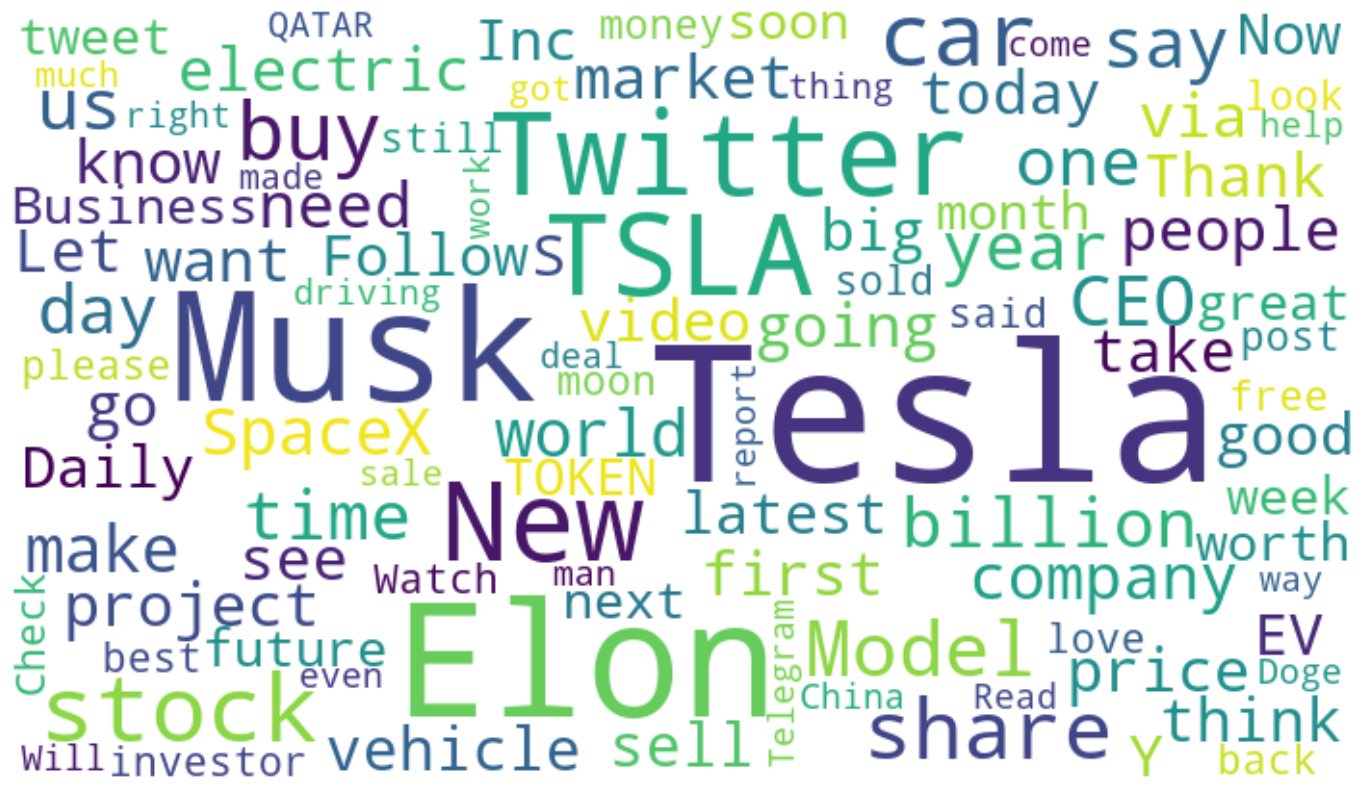

In [49]:
#wordcloud
generate_word_cloud(tesla['New_Tweets'])

### Examining the Length of Tweets

In [50]:
#creting column for number of words in tweets
tesla['Words_in_Tweet'] = tesla['New_Tweets_2'].str.split().apply(len)
tesla.head()

Username            UTC Date  \
0  @skypeepzangieh2 2022-12-07 22:24:55   
1   @doctorgfitness 2022-12-07 22:23:51   
2    @elonchieftwit 2022-12-07 22:22:05   
3   @PhilippeJB_PJB 2022-12-07 22:18:11   
4    @elonchieftwit 2022-12-07 22:15:02   

                                                                                                                                                                                                                                              Tweet  \
0                                                                                                                @elonmusk   PLEASE READ THIS MISSIVE \nhttps://t.co/lrH6Zl8WcT\n\n#elonmusk #tesla #spacex #elonmuskmemes #teslamotors #teslamodel   
1                                                                                                                             @brent_peabody Are they assuming that once #Elon is gone the #Tesla will be gone too? Tesla is bigger than #ElonMusk.   
2                                                                              EM @elonmusk ‘Electric Ain’t Gonna Work’: Long-Haul Truckers In Wyoming Not Fans Of Tesla Semi - Cowboy State Daily https://t.co/dmZTweUk41 #ElonMusk #Tesla #SpaceX   
3  #ElonMusk #Tesla #EldenRing 2022 Gave Us Elon Musk Drama Every Month: Whether you like it or not, Tesla/SpaceX/The Boring Company/Twitter/Neuralink CEO Elon Musk is inherently influential as the planet’s wealthiest … https://t.co/jO4bTklrk8   
4                                                                                                             EM @elonmusk Germany’s EVs Near 40% Share – Tesla Model 3 Bestseller - CleanTechnica https://t.co/7UpZLR38eL #ElonMusk #Tesla #SpaceX   

               Location  Followers  \
0              colombia      240.0   
1            Arvada, CO     2880.0   
2  Raya Lucaria Academy      288.0   
3                 World      979.0   
4  Raya Lucaria Academy      288.0   

                                                                                                                                                    Bio  \
0               i am camgirl ,  visit my pag in onlyfans, i wait for you #webcamer #camgirl  #sexygirl   #brunette #latina #Deutschland #australia  #UK   
1  Take charge of your health and fitness! Be More, Do More, Expect More of Yourself! Question Mainstream Narratives! Be Kind to Strangers and Animals!   
2                                                                                                                                                   NaN   
3        🕵🏻‍♂️Consultant |👨🏻‍💼Managing Director |✍🏼Author |👨🏼‍🏫Teach |👨🏻‍🎓PhD @LEST_UMR7317 #AI #ML #DeepLearning #ArtificialIntelligence #Geopolitical   
4                                                                                                                                                   NaN   

         Date  \
0  2022-12-07   
1  2022-12-07   
2  2022-12-07   
3  2022-12-07   
4  2022-12-07   

                                                                                                                                                  New_Tweets  \
0                                                                                                                                   PLEASE READ THIS MISSIVE   
1                                                                                                                      Are assuming gone gone ? Tesla bigger   
2                                                         Electric Are Going To Work Long Haul Truckers In Wyoming Not Fans Of Tesla Semi Cowboy State Daily   
3  Gave Us Elon Musk Drama Every Month Whether like Tesla SpaceX The Boring Company Twitter Neuralink CEO Elon Musk inherently influential planet wealthiest   
4                                                                                                Germany EVs Near Share Tesla Model Bestseller CleanTechnica   

                                             

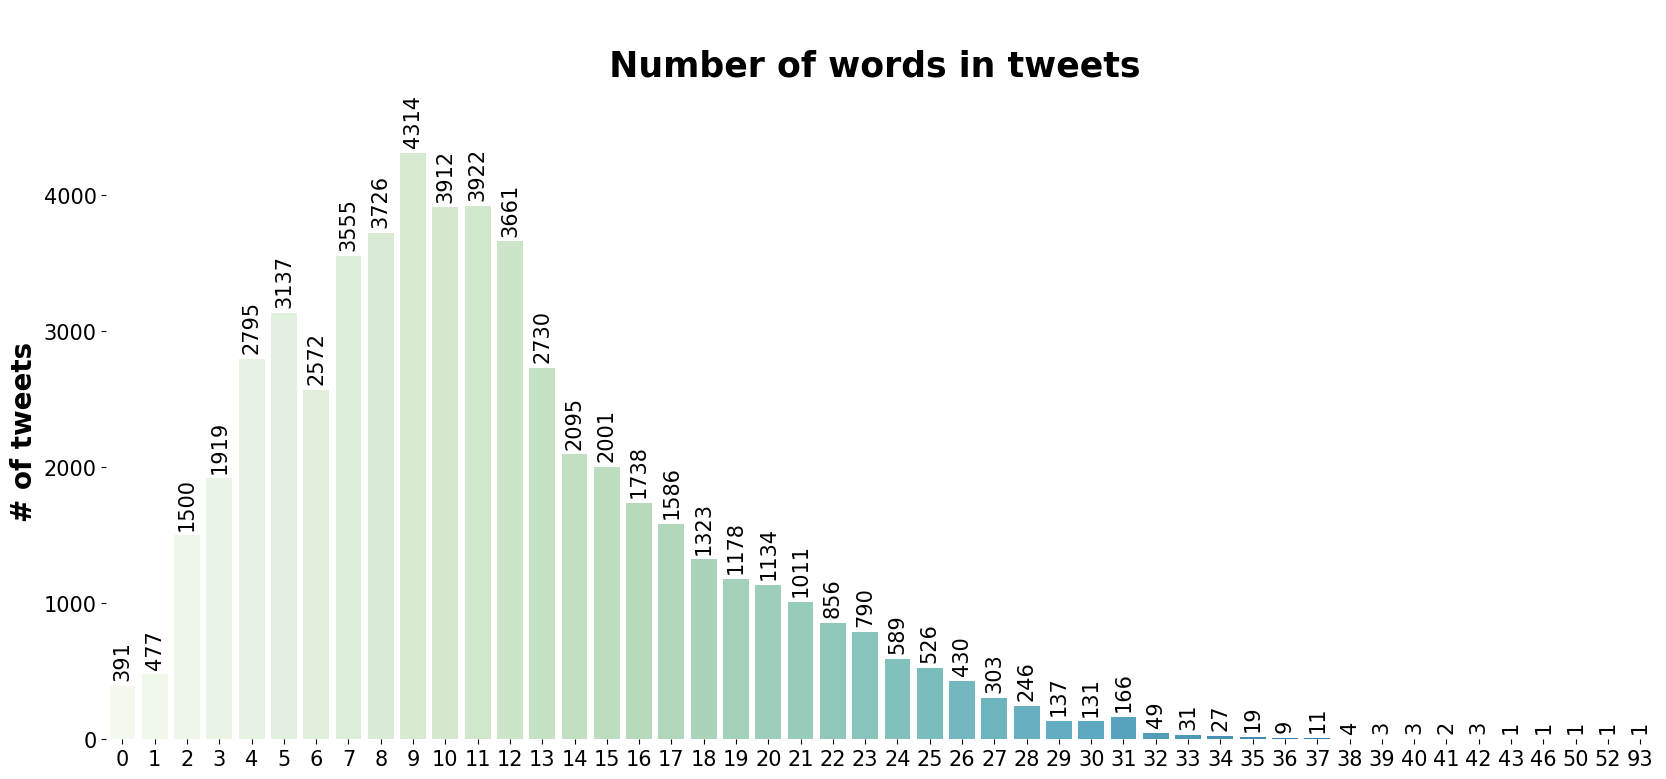

In [51]:
#plotting number of words in tweets
plt.figure(figsize = (20, 8))
length_count = sns.countplot(x = 'Words_in_Tweet', data = tesla, palette = 'GnBu')
for bars in length_count.containers:
    length_count.bar_label(bars, padding=4, fontsize=15, rotation = 90)

plt.title('\n Number of words in tweets  \n', fontsize = 25, fontweight = 'bold')
plt.xlabel('', fontsize = 30, fontweight = 'bold')
plt.ylabel('# of tweets', fontsize = 20, fontweight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
sns.despine(top = True, right = True, left = True, bottom = True)
plt.show()

__From the above, there are 0, 1,2 words in some rows which are supposed to be tweets. Obviously, this is not helpful and I will remove rows where number of words in the cleaned tweets are less than 5.__

In [52]:
#keeping only tweets with 5 or more words
tesla = tesla[tesla['Words_in_Tweet'] >=6]
tesla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44798 entries, 1 to 55016
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Username                              44798 non-null  object        
 1   UTC Date                              44798 non-null  datetime64[ns]
 2   Tweet                                 44798 non-null  object        
 3   Location                              33279 non-null  object        
 4   Followers                             44795 non-null  float64       
 5   Bio                                   34114 non-null  object        
 6   Date                                  44798 non-null  object        
 7   New_Tweets                            44798 non-null  object        
 8   New_Tweets_2                          44798 non-null  object        
 9   hashtag                               44798 non-null  object        
 10  men

In [53]:
#average words in tweets
average_words = int(tesla['Words_in_Tweet'].mean())
average_words

13

In [54]:
#maximum words in tweets
max_words = int(tesla['Words_in_Tweet'].max())
max_words

93

## Data Labelling & Sentiment Analysis

### VADER

In [55]:
tesla.head(2)

Username            UTC Date  \
1  @doctorgfitness 2022-12-07 22:23:51   
2   @elonchieftwit 2022-12-07 22:22:05   

                                                                                                                                                                  Tweet  \
1                                                 @brent_peabody Are they assuming that once #Elon is gone the #Tesla will be gone too? Tesla is bigger than #ElonMusk.   
2  EM @elonmusk ‘Electric Ain’t Gonna Work’: Long-Haul Truckers In Wyoming Not Fans Of Tesla Semi - Cowboy State Daily https://t.co/dmZTweUk41 #ElonMusk #Tesla #SpaceX   

               Location  Followers  \
1            Arvada, CO     2880.0   
2  Raya Lucaria Academy      288.0   

                                                                                                                                                    Bio  \
1  Take charge of your health and fitness! Be More, Do More, Expect More of Yourself! Question Mainstream Narratives! Be Kind to Strangers and Animals!   
2                                                                                                                                                   NaN   

         Date  \
1  2022-12-07   
2  2022-12-07   

                                                                                           New_Tweets  \
1                                                               Are assuming gone gone ? Tesla bigger   
2  Electric Are Going To Work Long Haul Truckers In Wyoming Not Fans Of Tesla Semi Cowboy State Daily   

                                                                                         New_Tweets_2  \
1                                                               Are assuming gone gone ? Tesla bigger   
2  Electric Are Going To Work Long Haul Truckers In Wyoming Not Fans Of Tesla Semi Cowboy State Daily   

                     hashtag         mentions  \
1    [Elon, Tesla, ElonMusk]  [brent_peabody]   
2  [ElonMusk, Tesla, SpaceX]       [elonmusk]   

                                                                                                    New_Tweets_tokenized  \
1                                                                          [Are, assuming, gone, gone, ?, Tesla, bigger]   
2  [Electric, Are, Going, To, Work, Long, Haul, Truckers, In, Wyoming, Not, Fans, Of, Tesla, Semi, Cowboy, State, Daily]   

  Tesla_only_mentions_in_tweet_content language  Words_in_Tweet  
1                                  Yes       it               7  
2                                  Yes       en              18

In [68]:
import nltk
nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\olada\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [57]:
analyzer = SentimentIntensityAnalyzer()
compound_scores = []
sentiments = []

for tweet in tesla['New_Tweets_2']:
    sentiment = analyzer.polarity_scores(tweet)
    compound_scores.append(sentiment['compound'])

    #score ranges
    if sentiment['compound'] >= 0.05:
        sentiments.append('positive')
    elif sentiment['compound'] <= -0.05:
        sentiments.append('negative')
    else:
        sentiments.append('neutral')

tesla['Vader_compound_score'] = compound_scores
tesla['Vader_sentiment'] = sentiments
tesla.head(2)

Username            UTC Date  \
1  @doctorgfitness 2022-12-07 22:23:51   
2   @elonchieftwit 2022-12-07 22:22:05   

                                                                                                                                                                  Tweet  \
1                                                 @brent_peabody Are they assuming that once #Elon is gone the #Tesla will be gone too? Tesla is bigger than #ElonMusk.   
2  EM @elonmusk ‘Electric Ain’t Gonna Work’: Long-Haul Truckers In Wyoming Not Fans Of Tesla Semi - Cowboy State Daily https://t.co/dmZTweUk41 #ElonMusk #Tesla #SpaceX   

               Location  Followers  \
1            Arvada, CO     2880.0   
2  Raya Lucaria Academy      288.0   

                                                                                                                                                    Bio  \
1  Take charge of your health and fitness! Be More, Do More, Expect More of Yourself! Question Mainstream Narratives! Be Kind to Strangers and Animals!   
2                                                                                                                                                   NaN   

         Date  \
1  2022-12-07   
2  2022-12-07   

                                                                                           New_Tweets  \
1                                                               Are assuming gone gone ? Tesla bigger   
2  Electric Are Going To Work Long Haul Truckers In Wyoming Not Fans Of Tesla Semi Cowboy State Daily   

                                                                                         New_Tweets_2  \
1                                                               Are assuming gone gone ? Tesla bigger   
2  Electric Are Going To Work Long Haul Truckers In Wyoming Not Fans Of Tesla Semi Cowboy State Daily   

                     hashtag         mentions  \
1    [Elon, Tesla, ElonMusk]  [brent_peabody]   
2  [ElonMusk, Tesla, SpaceX]       [elonmusk]   

                                                                                                    New_Tweets_tokenized  \
1                                                                          [Are, assuming, gone, gone, ?, Tesla, bigger]   
2  [Electric, Are, Going, To, Work, Long, Haul, Truckers, In, Wyoming, Not, Fans, Of, Tesla, Semi, Cowboy, State, Daily]   

  Tesla_only_mentions_in_tweet_content language  Words_in_Tweet  \
1                                  Yes       it               7   
2                                  Yes       en              18   

   Vader_compound_score Vader_sentiment  
1                   0.0         neutral  
2                   0.0         neutral

### Text Blob

In [58]:
from textblob import TextBlob

In [59]:
def blob_analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'
    
tesla['Blob_sentiment'] = tesla['New_Tweets_2'].apply(blob_analyze_sentiment)
tesla.head(2)

Username            UTC Date  \
1  @doctorgfitness 2022-12-07 22:23:51   
2   @elonchieftwit 2022-12-07 22:22:05   

                                                                                                                                                                  Tweet  \
1                                                 @brent_peabody Are they assuming that once #Elon is gone the #Tesla will be gone too? Tesla is bigger than #ElonMusk.   
2  EM @elonmusk ‘Electric Ain’t Gonna Work’: Long-Haul Truckers In Wyoming Not Fans Of Tesla Semi - Cowboy State Daily https://t.co/dmZTweUk41 #ElonMusk #Tesla #SpaceX   

               Location  Followers  \
1            Arvada, CO     2880.0   
2  Raya Lucaria Academy      288.0   

                                                                                                                                                    Bio  \
1  Take charge of your health and fitness! Be More, Do More, Expect More of Yourself! Question Mainstream Narratives! Be Kind to Strangers and Animals!   
2                                                                                                                                                   NaN   

         Date  \
1  2022-12-07   
2  2022-12-07   

                                                                                           New_Tweets  \
1                                                               Are assuming gone gone ? Tesla bigger   
2  Electric Are Going To Work Long Haul Truckers In Wyoming Not Fans Of Tesla Semi Cowboy State Daily   

                                                                                         New_Tweets_2  \
1                                                               Are assuming gone gone ? Tesla bigger   
2  Electric Are Going To Work Long Haul Truckers In Wyoming Not Fans Of Tesla Semi Cowboy State Daily   

                     hashtag         mentions  \
1    [Elon, Tesla, ElonMusk]  [brent_peabody]   
2  [ElonMusk, Tesla, SpaceX]       [elonmusk]   

                                                                                                    New_Tweets_tokenized  \
1                                                                          [Are, assuming, gone, gone, ?, Tesla, bigger]   
2  [Electric, Are, Going, To, Work, Long, Haul, Truckers, In, Wyoming, Not, Fans, Of, Tesla, Semi, Cowboy, State, Daily]   

  Tesla_only_mentions_in_tweet_content language  Words_in_Tweet  \
1                                  Yes       it               7   
2                                  Yes       en              18   

   Vader_compound_score Vader_sentiment Blob_sentiment  
1                   0.0         neutral        neutral  
2                   0.0         neutral       negative

In [60]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44798 entries, 1 to 55016
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Username                              44798 non-null  object        
 1   UTC Date                              44798 non-null  datetime64[ns]
 2   Tweet                                 44798 non-null  object        
 3   Location                              33279 non-null  object        
 4   Followers                             44795 non-null  float64       
 5   Bio                                   34114 non-null  object        
 6   Date                                  44798 non-null  object        
 7   New_Tweets                            44798 non-null  object        
 8   New_Tweets_2                          44798 non-null  object        
 9   hashtag                               44798 non-null  object        
 10  men

### Voting to keep only rows where the VADER and Text Blob models have predicted the same thing

In [61]:
tesla_2 = tesla[tesla['Vader_sentiment'] == tesla['Blob_sentiment']]
tesla_2 = tesla_2.reset_index(drop=True)
tesla_2.head(3)

Username            UTC Date  \
0  @doctorgfitness 2022-12-07 22:23:51   
1   @elonchieftwit 2022-12-07 22:15:02   
2   @elonchieftwit 2022-12-07 22:01:06   

                                                                                                                                               Tweet  \
0                              @brent_peabody Are they assuming that once #Elon is gone the #Tesla will be gone too? Tesla is bigger than #ElonMusk.   
1              EM @elonmusk Germany’s EVs Near 40% Share – Tesla Model 3 Bestseller - CleanTechnica https://t.co/7UpZLR38eL #ElonMusk #Tesla #SpaceX   
2  EM @elonmusk China's EV giant BYD takes on Tesla close to home - The Australian Financial Review https://t.co/c2goU0Vp0G #ElonMusk #Tesla #SpaceX   

               Location  Followers  \
0            Arvada, CO     2880.0   
1  Raya Lucaria Academy      288.0   
2  Raya Lucaria Academy      288.0   

                                                                                                                                                    Bio  \
0  Take charge of your health and fitness! Be More, Do More, Expect More of Yourself! Question Mainstream Narratives! Be Kind to Strangers and Animals!   
1                                                                                                                                                   NaN   
2                                                                                                                                                   NaN   

         Date  \
0  2022-12-07   
1  2022-12-07   
2  2022-12-07   

                                                                  New_Tweets  \
0                                      Are assuming gone gone ? Tesla bigger   
1                Germany EVs Near Share Tesla Model Bestseller CleanTechnica   
2  China EV giant BYD takes Tesla close home The Australian Financial Review   

                                                               New_Tweets_2  \
0                                     Are assuming gone gone ? Tesla bigger   
1               Germany EVs Near Share Tesla Model Bestseller CleanTechnica   
2  China EV giant BYD take Tesla close home The Australian Financial Review   

                     hashtag         mentions  \
0    [Elon, Tesla, ElonMusk]  [brent_peabody]   
1  [ElonMusk, Tesla, SpaceX]       [elonmusk]   
2  [ElonMusk, Tesla, SpaceX]       [elonmusk]   

                                                                     New_Tweets_tokenized  \
0                                           [Are, assuming, gone, gone, ?, Tesla, bigger]   
1                    [Germany, EVs, Near, Share, Tesla, Model, Bestseller, CleanTechnica]   
2  [China, EV, giant, BYD, takes, Tesla, close, home, The, Australian, Financial, Review]   

  Tesla_only_mentions_in_tweet_content language  Words_in_Tweet  \
0                                  Yes       it               7   
1                                  Yes       en               8   
2                                  Yes       en              12   

   Vader_compound_score Vader_sentiment Blob_sentiment  
0                 0.000         neutral        neutral  
1                 0.296        positive       positive  
2                 0.000         neutral        neutral

In [62]:
tesla_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24604 entries, 0 to 24603
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Username                              24604 non-null  object        
 1   UTC Date                              24604 non-null  datetime64[ns]
 2   Tweet                                 24604 non-null  object        
 3   Location                              17902 non-null  object        
 4   Followers                             24603 non-null  float64       
 5   Bio                                   19061 non-null  object        
 6   Date                                  24604 non-null  object        
 7   New_Tweets                            24604 non-null  object        
 8   New_Tweets_2                          24604 non-null  object        
 9   hashtag                               24604 non-null  object        
 10

In [63]:
def combine_sentiments(row):
    if row['Vader_sentiment'] == row['Blob_sentiment']:
        return row['Vader_sentiment']
    else:
        return 'None'

#create the 'Voted_label' column in the original DataFrame 'tesla_2'
tesla_2['Voted_label'] = tesla_2.apply(combine_sentiments, axis=1)
tesla_2.head(3)

Username            UTC Date  \
0  @doctorgfitness 2022-12-07 22:23:51   
1   @elonchieftwit 2022-12-07 22:15:02   
2   @elonchieftwit 2022-12-07 22:01:06   

                                                                                                                                               Tweet  \
0                              @brent_peabody Are they assuming that once #Elon is gone the #Tesla will be gone too? Tesla is bigger than #ElonMusk.   
1              EM @elonmusk Germany’s EVs Near 40% Share – Tesla Model 3 Bestseller - CleanTechnica https://t.co/7UpZLR38eL #ElonMusk #Tesla #SpaceX   
2  EM @elonmusk China's EV giant BYD takes on Tesla close to home - The Australian Financial Review https://t.co/c2goU0Vp0G #ElonMusk #Tesla #SpaceX   

               Location  Followers  \
0            Arvada, CO     2880.0   
1  Raya Lucaria Academy      288.0   
2  Raya Lucaria Academy      288.0   

                                                                                                                                                    Bio  \
0  Take charge of your health and fitness! Be More, Do More, Expect More of Yourself! Question Mainstream Narratives! Be Kind to Strangers and Animals!   
1                                                                                                                                                   NaN   
2                                                                                                                                                   NaN   

         Date  \
0  2022-12-07   
1  2022-12-07   
2  2022-12-07   

                                                                  New_Tweets  \
0                                      Are assuming gone gone ? Tesla bigger   
1                Germany EVs Near Share Tesla Model Bestseller CleanTechnica   
2  China EV giant BYD takes Tesla close home The Australian Financial Review   

                                                               New_Tweets_2  \
0                                     Are assuming gone gone ? Tesla bigger   
1               Germany EVs Near Share Tesla Model Bestseller CleanTechnica   
2  China EV giant BYD take Tesla close home The Australian Financial Review   

                     hashtag         mentions  \
0    [Elon, Tesla, ElonMusk]  [brent_peabody]   
1  [ElonMusk, Tesla, SpaceX]       [elonmusk]   
2  [ElonMusk, Tesla, SpaceX]       [elonmusk]   

                                                                     New_Tweets_tokenized  \
0                                           [Are, assuming, gone, gone, ?, Tesla, bigger]   
1                    [Germany, EVs, Near, Share, Tesla, Model, Bestseller, CleanTechnica]   
2  [China, EV, giant, BYD, takes, Tesla, close, home, The, Australian, Financial, Review]   

  Tesla_only_mentions_in_tweet_content language  Words_in_Tweet  \
0                                  Yes       it               7   
1                                  Yes       en               8   
2                                  Yes       en              12   

   Vader_compound_score Vader_sentiment Blob_sentiment Voted_label  
0                 0.000         neutral        neutral     neutral  
1                 0.296        positive       positive    positive  
2                 0.000         neutral        neutral     neutral

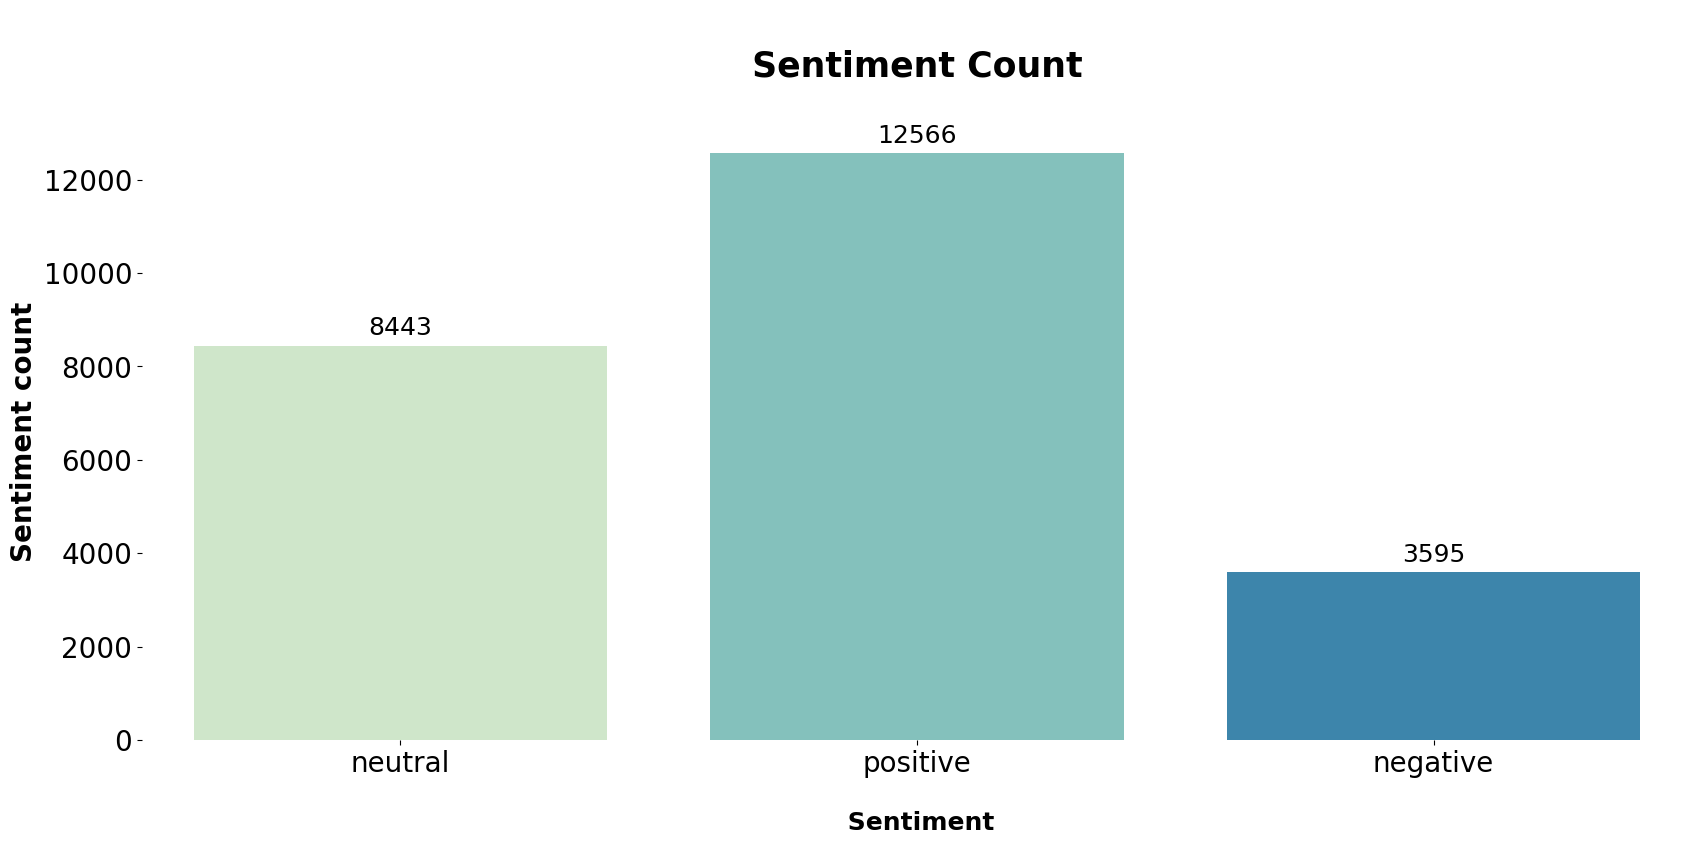

In [248]:
plt.figure(figsize = (20, 8))
vader_count = sns.countplot(x = 'Voted_label', data = tesla_2, palette = 'GnBu')
for bars in vader_count.containers:
    vader_count.bar_label(bars, padding=4, fontsize=18)

plt.title('\n Sentiment Count \n', fontsize = 25, fontweight = 'bold')
plt.xlabel('\n Sentiment', fontsize = 18, fontweight = 'bold')
plt.ylabel('Sentiment count', fontsize = 20, fontweight = 'bold')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
sns.despine(top = True, right = True, left = True, bottom = True)
plt.show()

In [246]:
tesla_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24604 entries, 0 to 24603
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Username                              24604 non-null  object        
 1   UTC Date                              24604 non-null  datetime64[ns]
 2   Tweet                                 24604 non-null  object        
 3   Location                              17902 non-null  object        
 4   Followers                             24603 non-null  float64       
 5   Bio                                   19061 non-null  object        
 6   Date                                  24604 non-null  object        
 7   New_Tweets                            24604 non-null  object        
 8   New_Tweets_2                          24604 non-null  object        
 9   hashtag                               24604 non-null  object        
 10

In [244]:
tesla_2.Voted_label.value_counts()

Voted_label
positive    12566
neutral      8443
negative     3595
Name: count, dtype: int64

### Validating the results of the voted labels using a labelled dataset__

In [245]:
#loading the tory and labour df
#remove rows not labelled
tesla_labelled = pd.read_excel('labelled_tesla (1).xlsx')
tesla_labelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24641 entries, 0 to 24640
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Username              24641 non-null  object        
 1   UTC Date              24641 non-null  datetime64[ns]
 2   Tweet                 24641 non-null  object        
 3   Location              17968 non-null  object        
 4   Followers             24640 non-null  float64       
 5   Bio                   18803 non-null  object        
 6   Date                  24641 non-null  datetime64[ns]
 7   New_Tweets            24641 non-null  object        
 8   New_Tweets_2          24641 non-null  object        
 9   language              24641 non-null  object        
 10  Words_in_Tweet        24641 non-null  int64         
 11  Vader_compound_score  24641 non-null  float64       
 12  Vader_sentiment       24641 non-null  object        
 13  Blob_sentiment  

In [66]:
#manually labelled data and data that is not manually labelled
tesla_labelled_2 = tesla_labelled[tesla_labelled['Manual label'].notna()].copy()
tesla_not_labelled = tesla_labelled[tesla_labelled['Manual label'].isna()].copy()
tesla_labelled_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1506 entries, 0 to 2883
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Username              1506 non-null   object        
 1   UTC Date              1506 non-null   datetime64[ns]
 2   Tweet                 1506 non-null   object        
 3   Location              1331 non-null   object        
 4   Followers             1506 non-null   float64       
 5   Bio                   657 non-null    object        
 6   Date                  1506 non-null   datetime64[ns]
 7   New_Tweets            1506 non-null   object        
 8   New_Tweets_2          1506 non-null   object        
 9   language              1506 non-null   object        
 10  Words_in_Tweet        1506 non-null   int64         
 11  Vader_compound_score  1506 non-null   float64       
 12  Vader_sentiment       1506 non-null   object        
 13  Blob_sentiment        1

In [67]:
tesla_not_labelled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23135 entries, 1013 to 24640
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Username              23135 non-null  object        
 1   UTC Date              23135 non-null  datetime64[ns]
 2   Tweet                 23135 non-null  object        
 3   Location              16637 non-null  object        
 4   Followers             23134 non-null  float64       
 5   Bio                   18146 non-null  object        
 6   Date                  23135 non-null  datetime64[ns]
 7   New_Tweets            23135 non-null  object        
 8   New_Tweets_2          23135 non-null  object        
 9   language              23135 non-null  object        
 10  Words_in_Tweet        23135 non-null  int64         
 11  Vader_compound_score  23135 non-null  float64       
 12  Vader_sentiment       23135 non-null  object        
 13  Blob_sentiment    

In [68]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [69]:
#classification report with labels as ground truth and voted labels as predictions
y_true = tesla_labelled_2['Manual label']
y_pred_vader = tesla_labelled_2['Voted_label']
print(classification_report(y_true, y_pred_vader))

              precision    recall  f1-score   support

    negative       0.90      0.98      0.94       461
     neutral       0.97      0.89      0.93       549
    positive       0.92      0.94      0.93       496

    accuracy                           0.93      1506
   macro avg       0.93      0.93      0.93      1506
weighted avg       0.93      0.93      0.93      1506



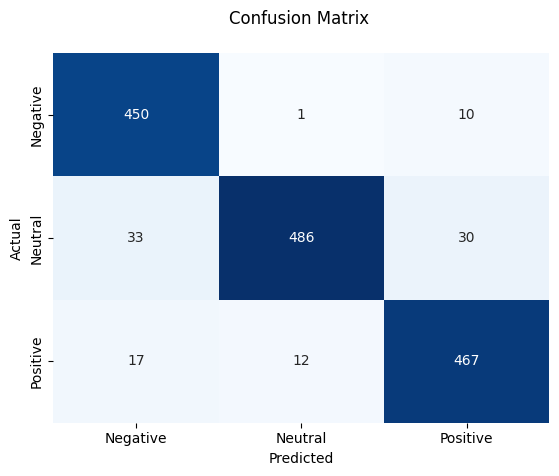

In [70]:
#confusion matrix
classes = ['Negative', 'Neutral', 'Positive']
conf_matrix = confusion_matrix(y_true, y_pred_vader)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes,
            yticklabels=classes)

plt.title('Confusion Matrix \n')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

__The VADER model does well in classifying the tweets achieveing an accuracy of 93% and F1-Score of 93%__

### <u> Answering Research Question 2:</u> How have the sentiments towards Tesla varied over time?

In [71]:
#Plotting daily count of sentiments
tesla_2['date_month'] = pd.to_datetime(tesla_2['UTC Date'])
tesla_2['date_month'] = tesla_2['UTC Date'].dt.strftime('%d-%m-%Y')

#counting sentiments in a different dataframe
count_sentiment = tesla_2[['date_month', 'Voted_label', 'New_Tweets_2']]
count_sentiment = tesla_2.groupby(['date_month', 'Voted_label' ]).size().reset_index(name='Count')
count_sentiment

date_month Voted_label  Count
0     01-01-2022    negative      2
1     01-01-2022     neutral      4
2     01-01-2022    positive    184
3     01-02-2022    negative      3
4     01-02-2022     neutral     10
5     01-02-2022    positive     10
6     01-03-2022    negative      2
7     01-03-2022     neutral      8
8     01-03-2022    positive     13
9     01-04-2022    negative      3
10    01-04-2022     neutral      8
11    01-04-2022    positive     14
12    01-05-2022    negative      7
13    01-05-2022     neutral     14
14    01-05-2022    positive     45
15    01-06-2022    negative     10
16    01-06-2022     neutral      7
17    01-06-2022    positive     28
18    01-07-2022    negative      1
19    01-07-2022     neutral      6
20    01-07-2022    positive      6
21    01-08-2022    negative      7
22    01-08-2022     neutral      2
23    01-08-2022    positive     18
24    01-09-2022    negative      4
25    01-09-2022     neutral     12
26    01-09-2022    positive     18
27    01-10-2021    negative      1
28    01-10-2021     neutral      3
29    01-10-2021    positive     11
30    01-10-2022    negative     14
31    01-10-2022     neutral     54
32    01-10-2022    positive     50
33    01-11-2021    negative      4
34    01-11-2021     neutral     11
35    01-11-2021    positive     49
36    01-11-2022    negative     13
37    01-11-2022     neutral     28
38    01-11-2022    positive     53
39    01-12-2021    negative      2
40    01-12-2021     neutral      6
41    01-12-2021    positive     12
42    01-12-2022    negative     49
43    01-12-2022     neutral    132
44    01-12-2022    positive    108
45    02-01-2022    negative      1
46    02-01-2022     neutral      6
47    02-01-2022    positive     22
48    02-02-2022    negative      4
49    02-02-2022     neutral      5
50    02-02-2022    positive     14
51    02-03-2022    negative      7
52    02-03-2022     neutral      6
53    02-03-2022    positive     14
54    02-04-2022    negative     44
55    02-04-2022     neutral      8
56    02-04-2022    positive     14
57    02-05-2022    negative      5
58    02-05-2022     neutral     13
59    02-05-2022    positive     26
60    02-06-2022    negative     11
61    02-06-2022     neutral     12
62    02-06-2022    positive     20
63    02-07-2022    negative      2
64    02-07-2022     neutral      8
65    02-07-2022    positive      2
66    02-08-2022    negative      3
67    02-08-2022     neutral      4
68    02-08-2022    positive      6
69    02-09-2022    negative      4
70    02-09-2022     neutral      4
71    02-09-2022    positive     12
72    02-10-2021     neutral      3
73    02-10-2021    positive     13
74    02-10-2022    negative      7
75    02-10-2022     neutral     24
76    02-10-2022    positive     46
77    02-11-2021    negative      9
78    02-11-2021     neutral     24
79    02-11-2021    positive     31
80    02-11-2022    negative      8
81    02-11-2022     neutral     35
82    02-11-2022    positive     47
83    02-12-2021    negative      2
84    02-12-2021     neutral      6
85    02-12-2021    positive      5
86    02-12-2022    negative     28
87    02-12-2022     neutral    115
88    02-12-2022    positive     85
89    03-01-2022    negative      4
90    03-01-2022     neutral     13
91    03-01-2022    positive     19
92    03-02-2022    negative      3
93    03-02-2022     neutral      7
94    03-02-2022    positive     12
95    03-03-2022     neutral      7
96    03-03-2022    positive      9
97    03-04-2022    negative    129
98    03-04-2022     neutral      4
99    03-04-2022    positive     14
100   03-05-2022    negative      2
101   03-05-2022     neutral      8
102   03-05-2022    positive     21
103   03-06-2022    negative     22
104   03-06-2022     neutral     14
105   03-06-2022    positive     27
106   03-07-2022    negative      4
107   03-07-2022     neutral      5
108   03-07-2022    positive      7
109   03-08-2022    negative      3
110   03-0

__Plotting by month__

In [72]:
#counting sentiments in a different dataframe by month
tesla_2['month_year'] = tesla_2['UTC Date'].dt.to_period('M')
count_sentiment_month = tesla_2[['month_year', 'Voted_label', 'New_Tweets_2']]
count_sentiment_month = tesla_2.groupby(['month_year', 'Voted_label' ]).size().reset_index(name='Count')
count_sentiment_month

month_year Voted_label  Count
0     2021-10    negative     45
1     2021-10     neutral    216
2     2021-10    positive    457
3     2021-11    negative    101
4     2021-11     neutral    309
5     2021-11    positive    569
6     2021-12    negative     63
7     2021-12     neutral    266
8     2021-12    positive    463
9     2022-01    negative     90
10    2022-01     neutral    295
11    2022-01    positive    827
12    2022-02    negative    138
13    2022-02     neutral    205
14    2022-02    positive    439
15    2022-03    negative     77
16    2022-03     neutral    203
17    2022-03    positive    573
18    2022-04    negative    394
19    2022-04     neutral    558
20    2022-04    positive   1051
21    2022-05    negative    216
22    2022-05     neutral    380
23    2022-05    positive    660
24    2022-06    negative    164
25    2022-06     neutral    220
26    2022-06    positive    446
27    2022-07    negative    163
28    2022-07     neutral    477
29    2022-07    positive    510
30    2022-08    negative     92
31    2022-08     neutral    581
32    2022-08    positive    878
33    2022-09    negative     86
34    2022-09     neutral    260
35    2022-09    positive    402
36    2022-10    negative    344
37    2022-10     neutral    876
38    2022-10    positive   1345
39    2022-11    negative    556
40    2022-11     neutral    974
41    2022-11    positive   1645
42    2022-12    negative   1066
43    2022-12     neutral   2623
44    2022-12    positive   2301

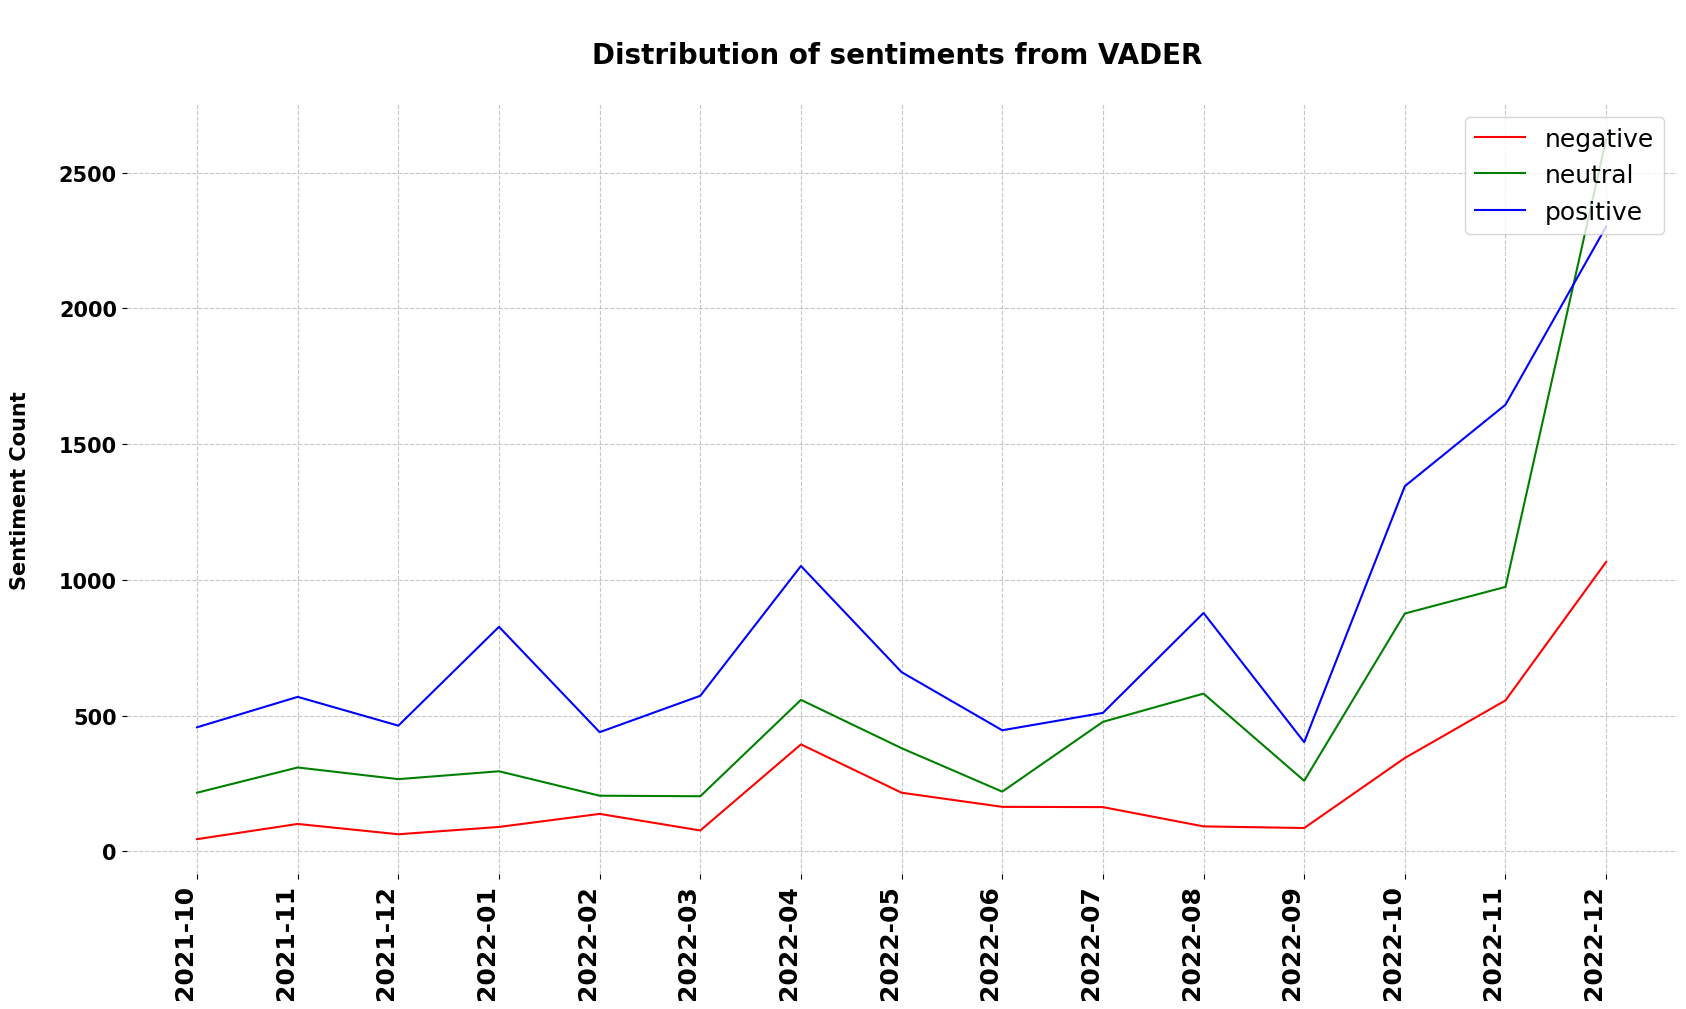

In [73]:
#Plot by month
count_sentiment_month['month_year'] = count_sentiment_month['month_year'].astype(str)

colors = ['red', 'green', 'blue']

plt.figure(figsize=(20, 10))
sns.lineplot(data=count_sentiment_month, x='month_year', y='Count', hue='Voted_label', palette=colors)

plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize=15, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold', rotation=90, ha='right')

plt.title('\nDistribution of sentiments from VADER \n', fontsize=20, fontweight='bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Sentiment Count\n', fontsize=15, fontweight='bold')

sns.despine(top=True, right=True, left=True, bottom=True)
plt.legend(fontsize=18, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

__Count of tweets by month__

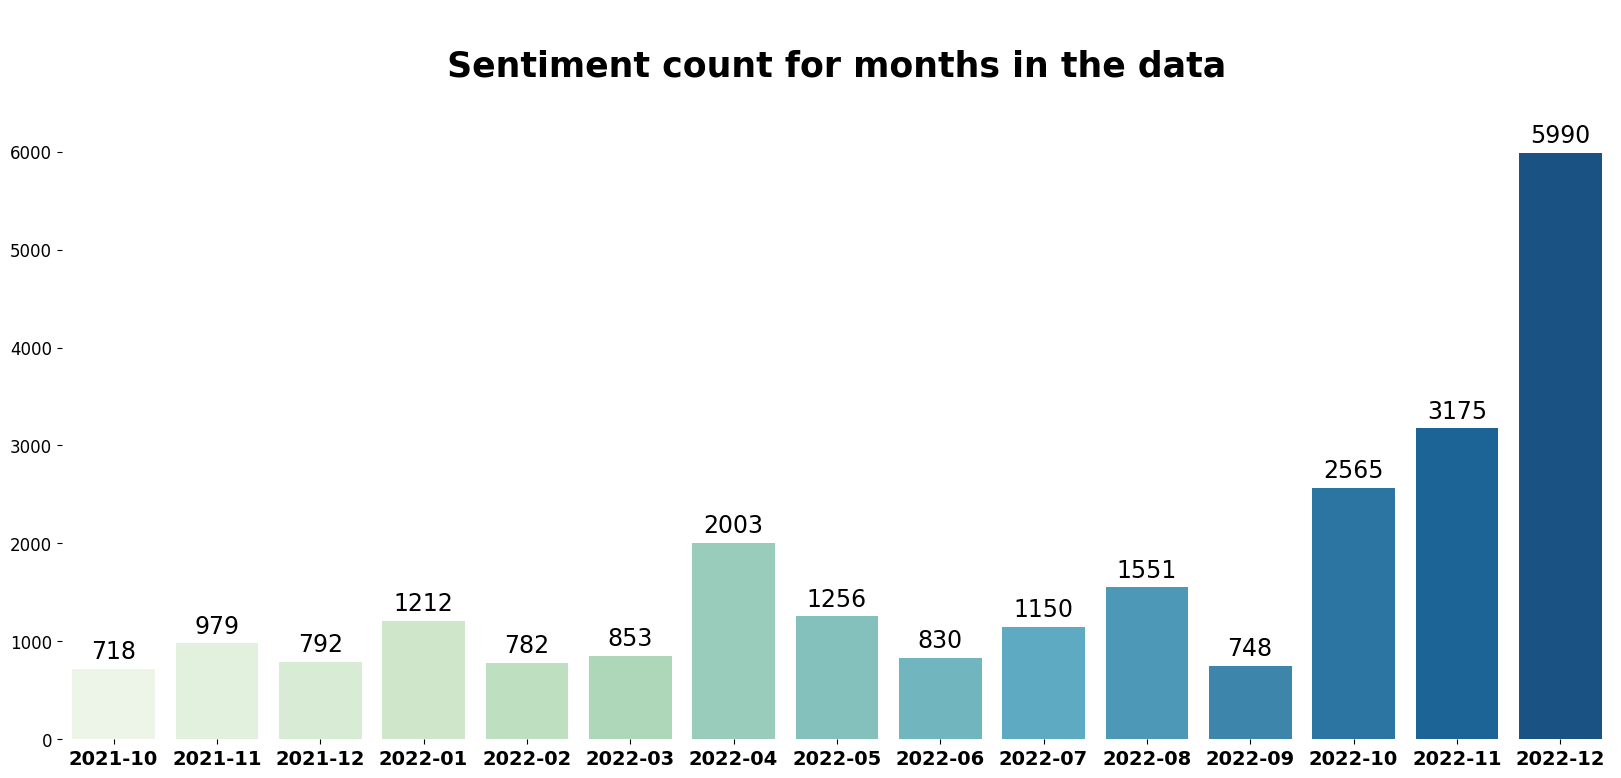

In [74]:
#count of tweets by month
tesla_2_sorted = tesla_2.sort_values(by='month_year')
plt.figure(figsize = (20, 8))
tweet_count = sns.countplot(x = 'month_year', data = tesla_2_sorted, palette = 'GnBu')
for bars in tweet_count.containers:
    tweet_count.bar_label(bars, padding=4, fontsize=17)

plt.title('\n Sentiment count for months in the data \n', fontsize = 25, fontweight = 'bold')
plt.xlabel('', fontsize = 30, fontweight = 'bold')
plt.ylabel('', fontsize = 20, fontweight = 'bold')
plt.xticks(fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 12)
sns.despine(top = True, right = True, left = True, bottom = True)
plt.show()

__Average Compound Score__

In [75]:
#average compound score
average_compound_score = tesla_2['Vader_compound_score'].mean()
average_compound_score

0.2253189074947163

In [76]:
#average compound score
monthly_compound_score = tesla_2.groupby(tesla_2['month_year'])['Vader_compound_score'].mean()
monthly_compound_score

month_year
2021-10    0.353738
2021-11    0.294997
2021-12    0.306558
2022-01    0.400512
2022-02    0.243881
2022-03    0.371095
2022-04    0.264487
2022-05    0.224443
2022-06    0.228503
2022-07    0.159249
2022-08    0.368590
2022-09    0.256214
2022-10    0.221750
2022-11    0.190099
2022-12    0.107736
Freq: M, Name: Vader_compound_score, dtype: float64

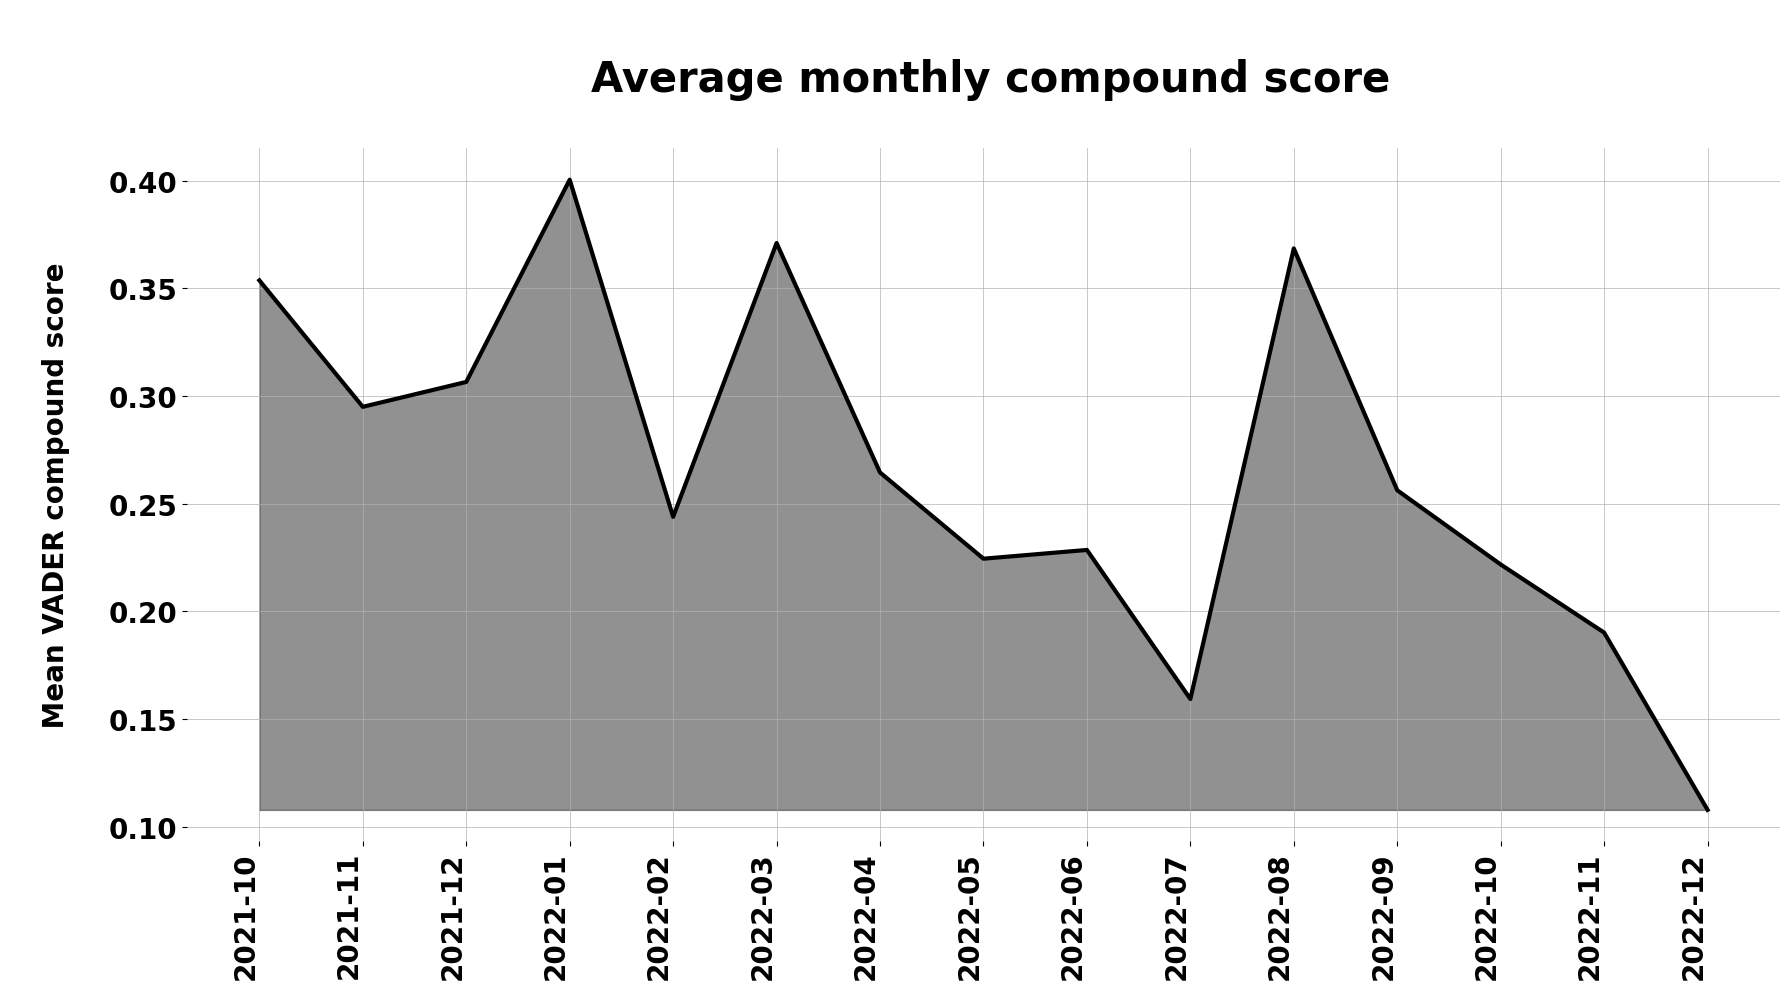

In [77]:
#Excluding 2021-09 because it does not contain enough data
monthly_compound_score.index = monthly_compound_score.index.astype(str)
monthly_compound_score = monthly_compound_score.sort_index(key=pd.to_datetime)
monthly_compound_score = monthly_compound_score[~monthly_compound_score.index.str.contains('2021-09')]
monthly_compound_score = monthly_compound_score.sort_index(key=pd.to_datetime)

plt.figure(figsize=(18, 10))
plt.plot(monthly_compound_score.index, monthly_compound_score.values, color='black', linewidth=3)
plt.fill_between(monthly_compound_score.index, monthly_compound_score.values,
                 y2=monthly_compound_score.min(),
                 color=sns.color_palette('gray')[0],
                 alpha=0.5)

# Use the modified sorted_index for x-axis values
plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold', rotation=90, ha='right')

plt.xlabel('\n\n', fontsize=15, fontweight='bold')
plt.ylabel('\n Mean VADER compound score \n', fontsize=20, fontweight='bold')
plt.title('\n  Average monthly compound score \n', fontsize=30, fontweight='bold')
plt.tight_layout()
sns.despine(top=True, right=True, left=True, bottom=True)
plt.grid(True, linestyle='-', linewidth=0.7, alpha=0.7)
plt.show()

In [78]:
monthly_compound_score

month_year
2021-10    0.353738
2021-11    0.294997
2021-12    0.306558
2022-01    0.400512
2022-02    0.243881
2022-03    0.371095
2022-04    0.264487
2022-05    0.224443
2022-06    0.228503
2022-07    0.159249
2022-08    0.368590
2022-09    0.256214
2022-10    0.221750
2022-11    0.190099
2022-12    0.107736
Name: Vader_compound_score, dtype: float64

__Split of sentiment counts and their percentage by month__

In [79]:
#Excluding 2021-09 because it does not contain enough data
sentiment_counts_group = tesla_2.groupby(['month_year', 'Voted_label']).size().unstack(fill_value=0).reset_index()
sentiment_counts_group = sentiment_counts_group[~sentiment_counts_group['month_year'].astype(str).str.contains('2021-09')]

sentiment_counts_group['Total_count'] = sentiment_counts_group['positive'] + sentiment_counts_group['neutral'] + sentiment_counts_group['negative']
# Calculate the percentages
sentiment_counts_group['Negative_percentage'] = round((sentiment_counts_group['negative'] / sentiment_counts_group['Total_count']) * 100,2)
sentiment_counts_group['Neutral_percentage'] = round((sentiment_counts_group['neutral'] / sentiment_counts_group['Total_count']) * 100,2)
sentiment_counts_group['Positive_percentage'] = round((sentiment_counts_group['positive'] / sentiment_counts_group['Total_count']) * 100,2)
sentiment_counts_group

Voted_label month_year  negative  neutral  positive  Total_count  \
0              2021-10        45      216       457          718   
1              2021-11       101      309       569          979   
2              2021-12        63      266       463          792   
3              2022-01        90      295       827         1212   
4              2022-02       138      205       439          782   
5              2022-03        77      203       573          853   
6              2022-04       394      558      1051         2003   
7              2022-05       216      380       660         1256   
8              2022-06       164      220       446          830   
9              2022-07       163      477       510         1150   
10             2022-08        92      581       878         1551   
11             2022-09        86      260       402          748   
12             2022-10       344      876      1345         2565   
13             2022-11       556      974      1645         3175   
14             2022-12      1066     2623      2301         5990   

Voted_label  Negative_percentage  Neutral_percentage  Positive_percentage  
0                           6.27               30.08                63.65  
1                          10.32               31.56                58.12  
2                           7.95               33.59                58.46  
3                           7.43               24.34                68.23  
4                          17.65               26.21                56.14  
5                           9.03               23.80                67.17  
6                          19.67               27.86                52.47  
7                          17.20               30.25                52.55  
8                          19.76               26.51                53.73  
9                          14.17               41.48                44.35  
10                          5.93               37.46                56.61  
11                         11.50               34.76                53.74  
12                         13.41               34.15                52.44  
13                         17.51               30.68                51.81  
14                         17.80               43.79                38.41

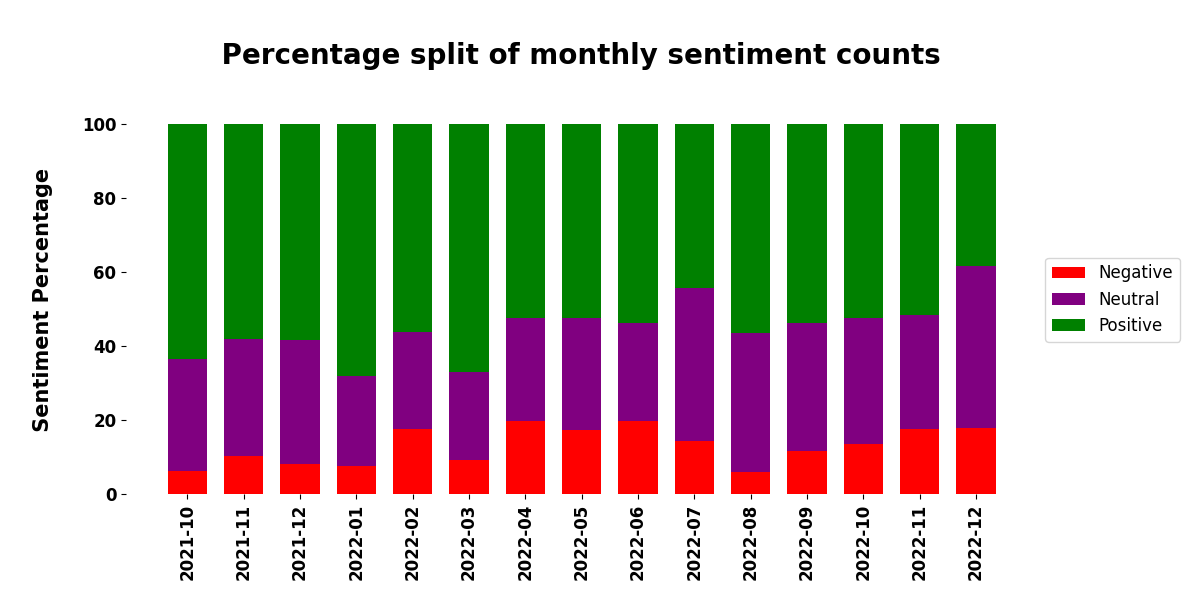

In [223]:
#Setntiment percentage
sentiment_counts_group['month_year'] = pd.to_datetime(sentiment_counts_group['month_year'])

# Plotting
plt.figure(figsize=(12, 6))

# Bar positions for each group
bar_positions = range(len(sentiment_counts_group))
bar_width = 0.7

# Plotting stacked bars
plt.bar(bar_positions, sentiment_counts_group['Negative_percentage'], width=bar_width, label='Negative', color='red')
plt.bar(bar_positions, sentiment_counts_group['Neutral_percentage'], width=bar_width, bottom=sentiment_counts_group['Negative_percentage'], label='Neutral', color='purple')
plt.bar(bar_positions, sentiment_counts_group['Positive_percentage'], width=bar_width, bottom=sentiment_counts_group['Negative_percentage'] + sentiment_counts_group['Neutral_percentage'],label='Positive', color='green')

# Adding labels and title
plt.xlabel('', fontsize=20, fontweight='bold')
plt.ylabel('\n Sentiment Percentage \n', fontsize=15, fontweight='bold')
plt.title('\n Percentage split of monthly sentiment counts \n', fontsize=20, fontweight='bold')
plt.xticks(bar_positions, sentiment_counts_group['month_year'].dt.strftime('%Y-%m'), rotation=90, 
           fontsize=12, fontweight='bold')

plt.yticks(fontsize=12, fontweight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})

# Show the plot
plt.tight_layout()
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

__Daily compound score__

In [80]:
#average compound score
daily_compound_score = tesla_2.groupby(tesla_2['date_month'])['Vader_compound_score'].mean()
daily_compound_score

date_month
01-01-2022    0.799304
01-02-2022    0.216596
01-03-2022    0.252509
01-04-2022    0.297992
01-05-2022    0.417565
01-06-2022    0.245624
01-07-2022    0.254700
01-08-2022    0.225237
01-09-2022    0.264756
01-10-2021    0.458540
01-10-2022    0.168741
01-11-2021    0.395622
01-11-2022    0.243573
01-12-2021    0.282230
01-12-2022    0.095160
02-01-2022    0.497538
02-02-2022    0.302430
02-03-2022    0.204296
02-04-2022    0.094152
02-05-2022    0.300948
02-06-2022    0.125788
02-07-2022    0.027700
02-08-2022    0.235854
02-09-2022    0.261695
02-10-2021    0.536587
02-10-2022    0.270029
02-11-2021    0.210622
02-11-2022    0.245734
02-12-2021    0.172085
02-12-2022    0.146567
03-01-2022    0.287689
03-02-2022    0.237014
03-03-2022    0.295706
03-04-2022    0.007958
03-05-2022    0.428461
03-06-2022    0.156081
03-07-2022    0.240500
03-08-2022    0.298417
03-09-2022    0.150013
03-10-2021    0.267800
03-10-2022    0.108092
03-11-2021    0.214934
03-11-2022    0.289994


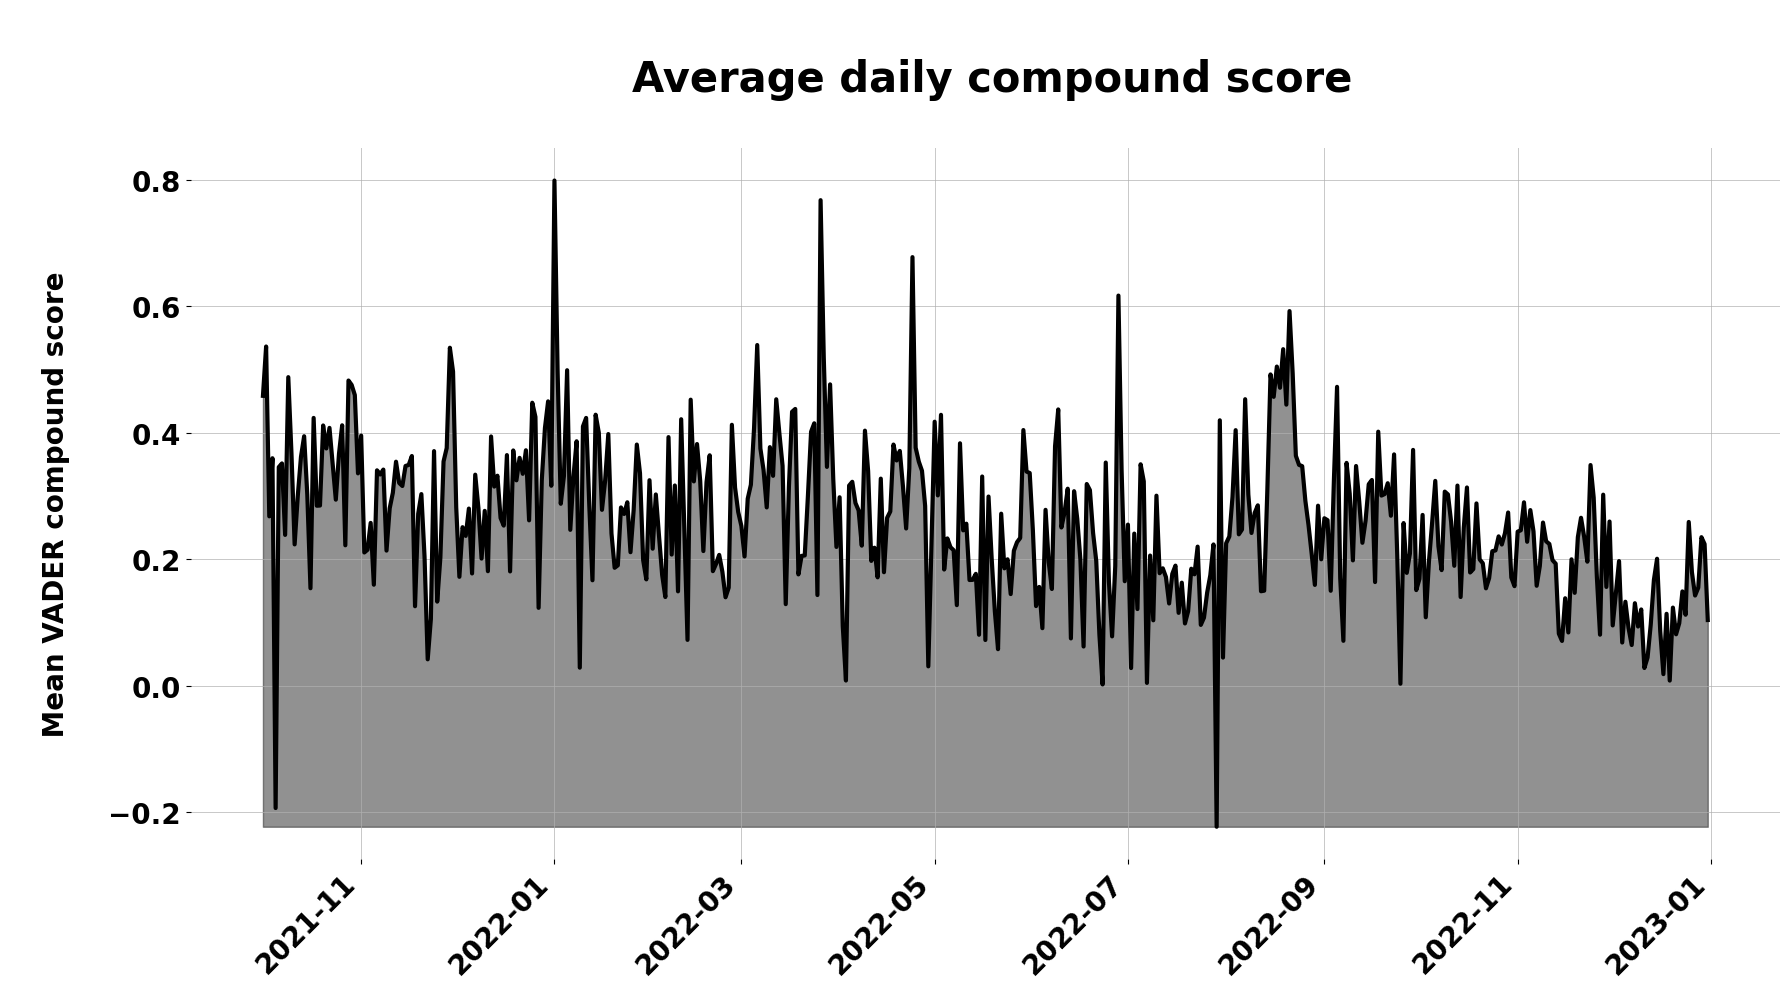

In [81]:
#average daily compound score
daily_compound_score.index = pd.to_datetime(daily_compound_score.index, format="%d-%m-%Y")

# Filter out dates in September 2021
daily_compound_score = daily_compound_score[daily_compound_score.index >= "2021-10-01"]

# Sort the DataFrame by the index
daily_compound_score = daily_compound_score.sort_index()

plt.figure(figsize=(18, 10))
plt.plot(daily_compound_score.index, daily_compound_score.values, color='black', linewidth=3)
plt.fill_between(daily_compound_score.index, daily_compound_score.values,
                 y2=daily_compound_score.min(),
                 color=sns.color_palette('gray')[0],
                 alpha=0.5)

# Use the modified sorted_index for x-axis values
plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize=20, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold', rotation=45, ha='right')

plt.xlabel('\n\n', fontsize=20, fontweight='bold')
plt.ylabel('\n Mean VADER compound score \n', fontsize=20, fontweight='bold')
plt.title('\n  Average daily compound score \n', fontsize=30, fontweight='bold')
plt.tight_layout()
sns.despine(top=True, right=True, left=True, bottom=True)
plt.grid(True, linestyle='-', linewidth=0.7, alpha=0.7)
plt.show()

In [82]:
daily_compound_score

date_month
2021-10-01    0.458540
2021-10-02    0.536587
2021-10-03    0.267800
2021-10-04    0.359773
2021-10-05   -0.193864
2021-10-06    0.345694
2021-10-07    0.351533
2021-10-08    0.238433
2021-10-09    0.488092
2021-10-10    0.367710
2021-10-11    0.223413
2021-10-12    0.300500
2021-10-13    0.361864
2021-10-14    0.394581
2021-10-15    0.301805
2021-10-16    0.154008
2021-10-17    0.423575
2021-10-18    0.284581
2021-10-19    0.284938
2021-10-20    0.411616
2021-10-21    0.375255
2021-10-22    0.407795
2021-10-23    0.351453
2021-10-24    0.294205
2021-10-25    0.366675
2021-10-26    0.411887
2021-10-27    0.221982
2021-10-28    0.482769
2021-10-29    0.475796
2021-10-30    0.459792
2021-10-31    0.335842
2021-11-01    0.395622
2021-11-02    0.210622
2021-11-03    0.214934
2021-11-04    0.257414
2021-11-05    0.159597
2021-11-06    0.340636
2021-11-07    0.334019
2021-11-08    0.341794
2021-11-09    0.213577
2021-11-10    0.280467
2021-11-11    0.305170
2021-11-12    0.354259


### <u> Answering Research Question 3:</u> Does the sentiment towards Tesla correlate with business performance and performance on the stock market?

The Tesla Stock Prices data was collected from Google Finance and for October 2021 to December 2022 and it is closing prices for the trading day.

In [83]:
"""
-Loading the data collected from Google Sheets on Tesla's stock performance
-Using daily closing prices of Tesla stock
""" 
tesla_stock = pd.read_excel('Tesla_stock_price_Google.xlsx')
tesla_stock['Date'] = pd.to_datetime(tesla_stock['Date'])
tesla_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    315 non-null    datetime64[ns]
 1   Close   315 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.1 KB


In [84]:
#Plotting daily count of sentiments
tesla_stock

Date   Close
0   2021-10-01  258.41
1   2021-10-04  260.51
2   2021-10-05  260.20
3   2021-10-06  260.92
4   2021-10-07  264.54
5   2021-10-08  261.83
6   2021-10-11  263.98
7   2021-10-12  268.57
8   2021-10-13  270.36
9   2021-10-14  272.77
10  2021-10-15  281.01
11  2021-10-18  290.04
12  2021-10-19  288.09
13  2021-10-20  288.60
14  2021-10-21  298.00
15  2021-10-22  303.23
16  2021-10-25  341.62
17  2021-10-26  339.48
18  2021-10-27  345.95
19  2021-10-28  359.01
20  2021-10-29  371.33
21  2021-11-01  402.86
22  2021-11-02  390.67
23  2021-11-03  404.62
24  2021-11-04  409.97
25  2021-11-05  407.36
26  2021-11-08  387.65
27  2021-11-09  341.17
28  2021-11-10  355.98
29  2021-11-11  354.50
30  2021-11-12  344.47
31  2021-11-15  337.80
32  2021-11-16  351.58
33  2021-11-17  363.00
34  2021-11-18  365.46
35  2021-11-19  379.02
36  2021-11-22  385.62
37  2021-11-23  369.68
38  2021-11-24  372.00
39  2021-11-26  360.64
40  2021-11-29  379.00
41  2021-11-30  381.59
42  2021-12-01  365.00
43  2021-12-02  361.53
44  2021-12-03  338.32
45  2021-12-06  336.34
46  2021-12-07  350.58
47  2021-12-08  356.32
48  2021-12-09  334.60
49  2021-12-10  339.01
50  2021-12-13  322.14
51  2021-12-14  319.50
52  2021-12-15  325.33
53  2021-12-16  308.97
54  2021-12-17  310.86
55  2021-12-20  299.98
56  2021-12-21  312.84
57  2021-12-22  336.29
58  2021-12-23  355.67
59  2021-12-27  364.65
60  2021-12-28  362.82
61  2021-12-29  362.06
62  2021-12-30  356.78
63  2021-12-31  352.26
64  2022-01-03  399.93
65  2022-01-04  383.20
66  2022-01-05  362.71
67  2022-01-06  354.90
68  2022-01-07  342.32
69  2022-01-10  352.71
70  2022-01-11  354.80
71  2022-01-12  368.74
72  2022-01-13  343.85
73  2022-01-14  349.87
74  2022-01-18  343.50
75  2022-01-19  331.88
76  2022-01-20  332.09
77  2022-01-21  314.63
78  2022-01-24  310.00
79  2022-01-25  306.13
80  2022-01-26  312.47
81  2022-01-27  276.37
82  2022-01-28  282.12
83  2022-01-31  312.24
84  2022-02-01  310.42
85  2022-02-02  301.89
86  2022-02-03  297.05
87  2022-02-04  307.77
88  2022-02-07  302.45
89  2022-02-08  307.33
90  2022-02-09  310.67
91  2022-02-10  301.52
92  2022-02-11  286.67
93  2022-02-14  291.92
94  2022-02-15  307.48
95  2022-02-16  307.80
96  2022-02-17  292.12
97  2022-02-18  285.66
98  2022-02-22  273.84
99  2022-02-23  254.68
100 2022-02-24  266.92
101 2022-02-25  269.96
102 2022-02-28  290.14
103 2022-03-01  288.12
104 2022-03-02  293.30
105 2022-03-03  279.76
106 2022-03-04  279.43
107 2022-03-07  268.19
108 2022-03-08  274.80
109 2022-03-09  286.32
110 2022-03-10  279.43
111 2022-03-11  265.12
112 2022-03-14  255.46
113 2022-03-15  267.30
114 2022-03-16  280.08
115 2022-03-17  290.53
116 2022-03-18  301.80
117 2022-03-21  307.05
118 2022-03-22  331.33
119 2022-03-23  333.04
120 2022-03-24  337.97
121 2022-03-25  336.88
122 2022-03-28  363.95
123 2022-03-29  366.52
124 2022-03-30  364.66
125 2022-03-31  359.20
126 2022-04-01  361.53
127 2022-04-04  381.82
128 2022-04-05  363.75
129 2022-04-06  348.59
130 2022-04-07  352.42
131 2022-04-08  341.83
132 2022-04-11  325.31
133 2022-04-12  328.98
134 2022-04-13  340.79
135 2022-04-14  328.33
136 2022-04-18  334.76
137 2022-04-19  342.72
138 2022-04-20  325.73
139 2022-04-21  336.26
140 2022-04-22  335.02
141 2022-04-25  332.67
142 2022-04-26  292.14
143 2022-04-27  293.84
144 2022-04-28  292.50
145 2022-04-29  290.25
146 2022-05-02  300.98
147 2022-05-03  303.08
148 2022-05-04  317.54
149 2022-05-05  291.09
150 2022-05-06  288.55
151 2022-05-09  262.37
152 2022-05-10  266.68
153 2022-05-11  244.67
154 2022-05-12  242.67
155 2022-05-13  256.53
156 2022-05-16  241.46
157 2022-05-17  253.87
158 2022-05-18  236.60
159 2022-05-19  236.47
160 2022-05-20  221.30
161 2022-05-23  224.97
162 2022-05-24  209.39
163 2022-05-25  219.60
164 2022-05-26  235.91
165 2022-05-27  253.21
166 2022-05-31  252.75
167 2022-06-01  246.79
168 2022-06-02  258.33
169 2022-06-03  234.52
170 2022-06-06  238.28
171 2022-06-07  238.89
172 2022-06-08  241.87
173 2022

In [85]:
#Date in the dataset
start_date_stock = tesla_stock['Date'].min()
end_date_stock = tesla_stock['Date'].max()

# Printing the dates
print('Start date:', start_date_stock)
print('Ending date:', end_date_stock)
print('===========================================================================')
print ('The dataset is for the period between', start_date_stock, 'and', end_date_stock)

Start date: 2021-10-01 00:00:00
Ending date: 2022-12-30 00:00:00
The dataset is for the period between 2021-10-01 00:00:00 and 2022-12-30 00:00:00


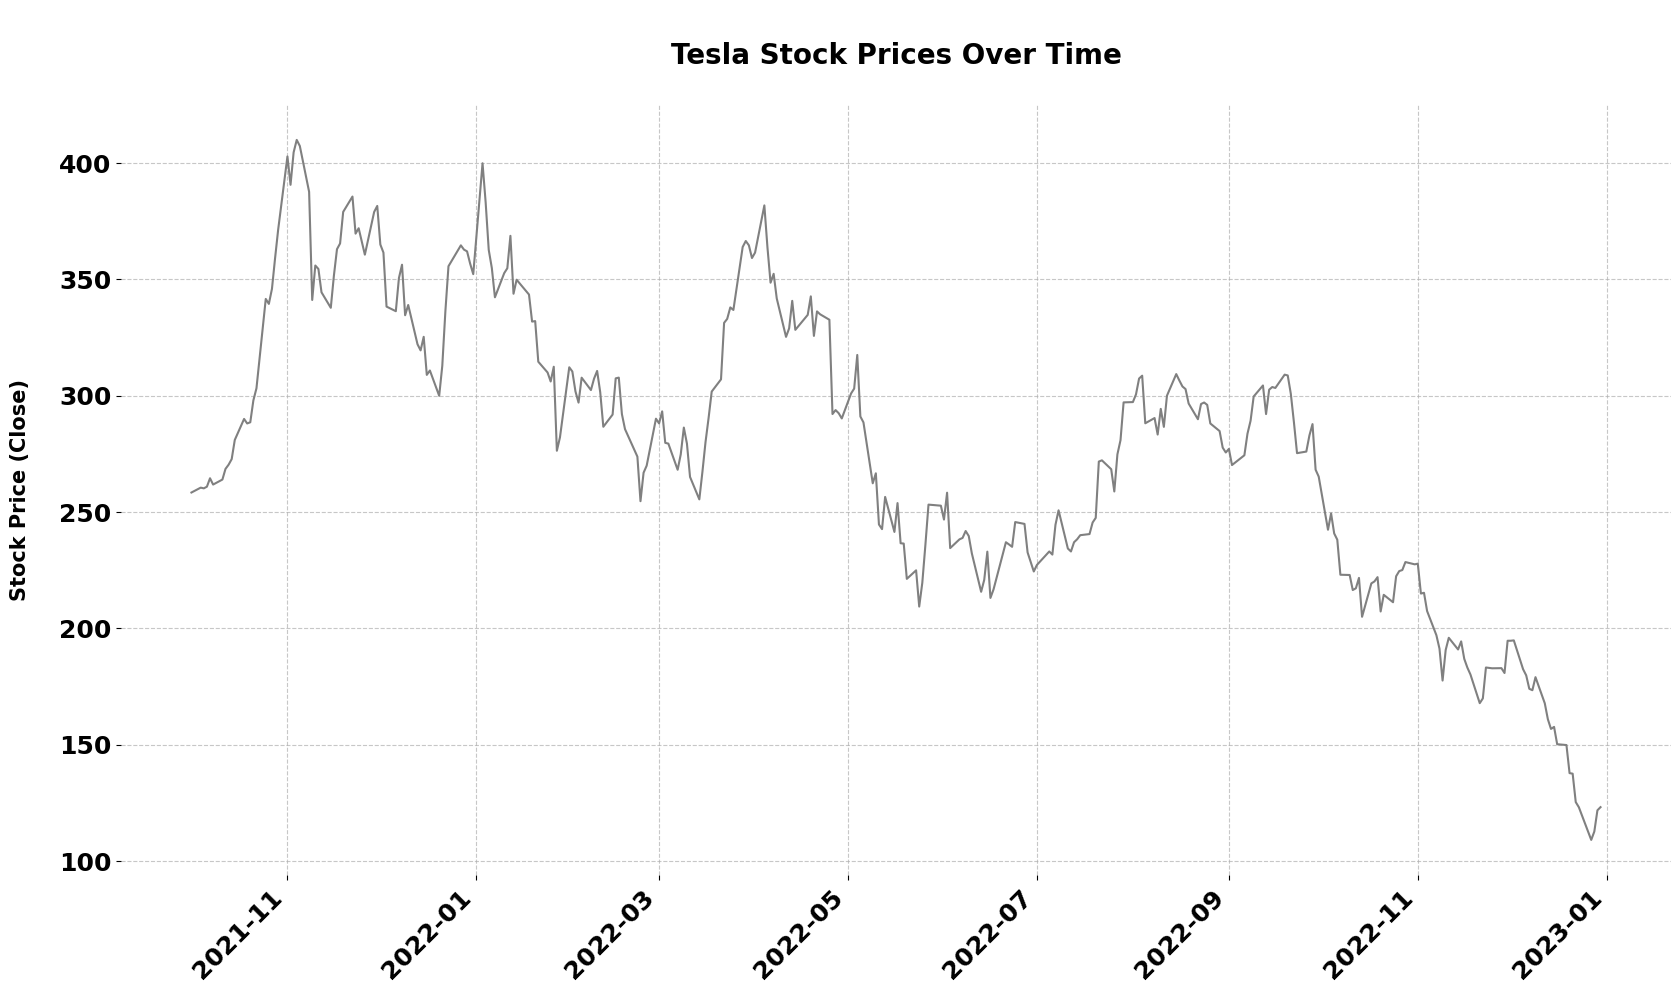

In [86]:
#Tesla closing stock prices over the course of the timeline covered
plt.figure(figsize=(20, 10))
sns.lineplot(data=tesla_stock, x='Date', y='Close', color = 'gray')
plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize=18, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold', rotation=45, ha='right')

plt.title('\nTesla Stock Prices Over Time\n', fontsize=20, fontweight='bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Stock Price (Close)\n', fontsize=15, fontweight='bold')

sns.despine(top=True, right=True, left=True, bottom=True)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

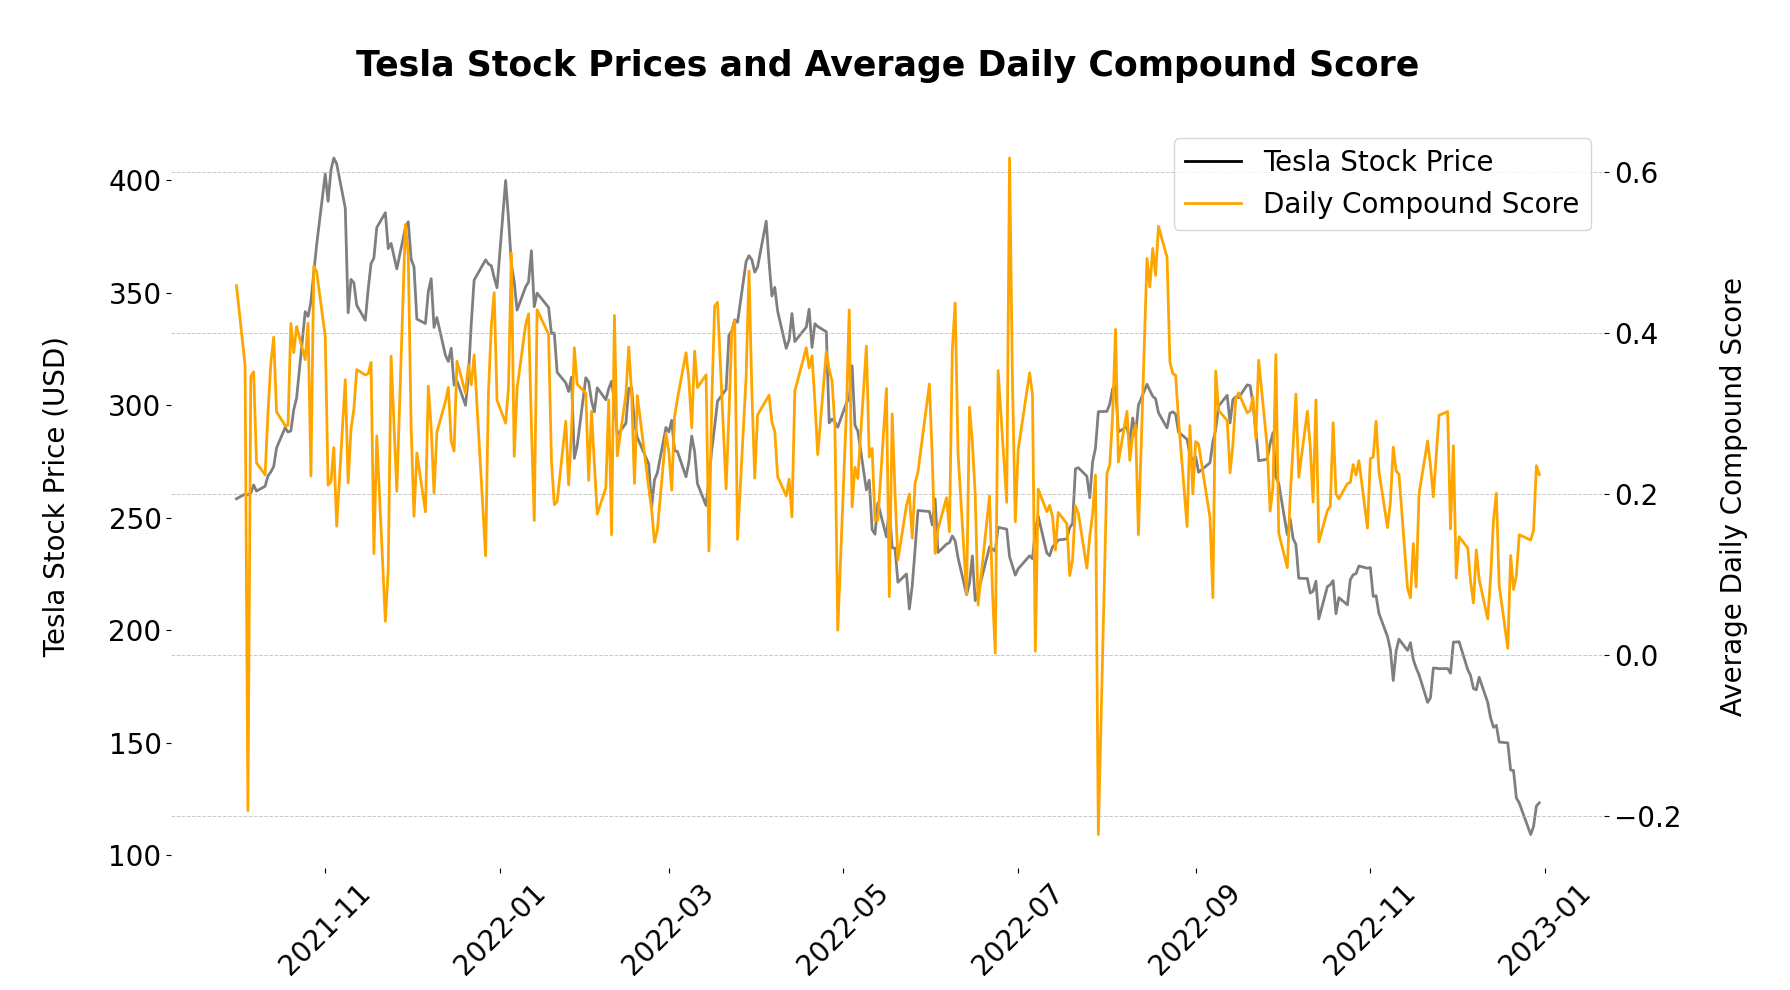

In [87]:
#Tesla stock prices and compound score
from matplotlib.lines import Line2D
daily_compound_score.index = pd.to_datetime(daily_compound_score.index, format="%d-%m-%Y")
tesla_stock['Date'] = pd.to_datetime(tesla_stock['Date'], format="%m/%d/%Y %H:%M:%S")

# Merge the two DataFrames on the date
stock_compound = pd.merge_asof(tesla_stock, daily_compound_score, left_on='Date', right_index=True, direction='nearest')

fig, ax1 = plt.subplots(figsize=(18, 10))

# Plot Tesla stock prices on the left y-axis
ax1.set_xlabel('', fontsize=20)
ax1.set_ylabel('\n Tesla Stock Price (USD) \n', color='black', fontsize=20)
stock_price_line = ax1.plot(stock_compound['Date'], stock_compound['Close'], color='black',
                            label='\n Tesla Stock Price \n', linewidth=2, alpha=0.5)
ax1.tick_params(axis='y', labelcolor='black', labelsize=20)
ax1.tick_params(axis='x', labelrotation=45, labelsize=20)

ax2 = ax1.twinx()
ax2.set_ylabel('\n Average Daily Compound Score \n', color='black', fontsize=20)
compound_score_line = ax2.plot(stock_compound['Date'], stock_compound['Vader_compound_score'], color='orange',
                               label='Daily Compound Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black', labelsize=20)

fig.tight_layout()
plt.title('\n Tesla Stock Prices and Average Daily Compound Score \n', fontsize=25, fontweight='bold')

# Create legend handles
legend_handles = [Line2D([0], [0], color='black', linewidth=2, label='Tesla Stock Price'),
                  Line2D([0], [0], color='orange', linewidth=2, label='Daily Compound Score')]

plt.legend(handles=legend_handles, fontsize=20, loc='upper right')
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

In [88]:
#compound score
daily_compound_score_group = tesla_2.groupby(['date_month', 'Voted_label'])['Vader_compound_score'].mean().unstack()
daily_compound_score_group['Overall'] = tesla_2.groupby(tesla_2['date_month'])['Vader_compound_score'].mean()
daily_compound_score_group.index = pd.to_datetime(daily_compound_score_group.index, format='%d-%m-%Y')
daily_compound_score_group = daily_compound_score_group.sort_index()
daily_compound_score_group

Voted_label  negative   neutral  positive   Overall
date_month                                         
2021-10-01  -0.175900  0.000000  0.641273  0.458540
2021-10-02        NaN  0.000000  0.660415  0.536587
2021-10-03  -0.332000  0.000000  0.618600  0.267800
2021-10-04  -0.367050  0.000000  0.613070  0.359773
2021-10-05  -0.721225  0.000000  0.376200 -0.193864
2021-10-06  -0.431050  0.004300  0.795925  0.345694
2021-10-07  -0.126467  0.000000  0.587747  0.351533
2021-10-08  -0.665950  0.001843  0.539671  0.238433
2021-10-09  -0.325400  0.000000  0.668867  0.488092
2021-10-10  -0.250000  0.000000  0.531460  0.367710
2021-10-11        NaN  0.002345  0.709760  0.223413
2021-10-12  -0.407800  0.000000  0.479367  0.300500
2021-10-13  -0.287800  0.000000  0.705213  0.361864
2021-10-14  -0.458800  0.000000  0.624643  0.394581
2021-10-15  -0.440400  0.000000  0.617470  0.301805
2021-10-16  -0.423150  0.000000  0.569680  0.154008
2021-10-17        NaN  0.000000  0.484086  0.423575
2021-10-18  -0.798300  0.004300  0.482050  0.284581
2021-10-19        NaN  0.000000  0.569875  0.284938
2021-10-20  -0.750000 -0.005160  0.661269  0.411616
2021-10-21        NaN  0.001573  0.603617  0.375255
2021-10-22  -0.527800  0.000000  0.649393  0.407795
2021-10-23        NaN  0.000000  0.556467  0.351453
2021-10-24  -0.351500  0.000000  0.548925  0.294205
2021-10-25  -0.534940  0.001720  0.588507  0.366675
2021-10-26  -0.358750  0.000000  0.619784  0.411887
2021-10-27  -0.459571  0.000000  0.590191  0.221982
2021-10-28        NaN  0.000000  0.643692  0.482769
2021-10-29        NaN  0.000000  0.589081  0.475796
2021-10-30        NaN  0.000000  0.551750  0.459792
2021-10-31  -0.318200  0.000000  0.543538  0.335842
2021-11-01  -0.357550  0.000000  0.545918  0.395622
2021-11-02  -0.492600  0.000000  0.577845  0.210622
2021-11-03  -0.540450  0.000000  0.524681  0.214934
2021-11-04  -0.587050  0.000000  0.569767  0.257414
2021-11-05  -0.271033  0.000000  0.544140  0.159597
2021-11-06  -0.288800  0.000000  0.672633  0.340636
2021-11-07  -0.349125  0.000000  0.636058  0.334019
2021-11-08  -0.334875 -0.001843  0.592380  0.341794
2021-11-09  -0.629033  0.000000  0.539458  0.213577
2021-11-10  -0.566757  0.000000  0.583219  0.280467
2021-11-11  -0.520200  0.000000  0.558326  0.305170
2021-11-12  -0.318200  0.000000  0.617700  0.354259
2021-11-13  -0.557400  0.000000  0.750200  0.320617
2021-11-14  -0.433550  0.006450  0.589510  0.315862
2021-11-15  -0.500033  0.000000  0.534735  0.347519
2021-11-16  -0.709600  0.003225  0.604220  0.349146
2021-11-17  -0.499900  0.000000  0.641164  0.363235
2021-11-18  -0.501180  0.000000  0.482462  0.125537
2021-11-19  -0.404200  0.000000  0.671265  0.271874
2021-11-20  -0.378600  0.000000  0.550400  0.303000
2021-11-21  -0.559450  0.003686  0.570288  0.204071
2021-11-22  -0.508980  0.000000  0.499957  0.041513
2021-11-23  -0.532040  0.000000  0.471682  0.105346
2021-11-24        NaN  0.000000  0.599377  0.371043
2021-11-25  -0.587600  0.000000  0.671350  0.132829
2021-11-26  -0.233567  0.000000  0.594712  0.202850
2021-11-27  -0.519850  0.000000  0.648167  0.354647
2021-11-28  -0.177900  0.000000  0.613227  0.375854
2021-11-29  -0.379850  0.000000  0.671434  0.534626
2021-11-30  -0.421500  0.000000  0.659254  0.496794
2021-12-01  -0.422450  0.000000  0.540792  0.282230
2021-12-02  -0.202450  0.000000  0.528400  0.172085
2021-12-03  -0.765000  0.000000  0.639127  0.250616
2021-12-04  -0.741150  0.000000  0.638333  0.236817
2021-12-05  -0.510600  0.000000  0.611220  0.280080
2021-12-06  -0.436640  0.000000  0.569445  0.177422
2021-12-07  -0.479060  0.000000  0.642129  0.333738
2021-12-08  -0.625000  0.000000  0.510433  0.281260
2021-12-09  -0.450367  0.000000  0.566186  0.200938
2021-12-10  -0.451600  0.000000  0.510972  0.276477
2021-12-11  -0.541600  0.000000  0.440875  0.180973
2021-12-12  -0.401900  0.000000  0.616456  0.394225
2021-12-13  -0.394100  0.000000  0.593321  0.314912
2021-12-14  -0.407760  0.000000  0.606918  0.332

In [89]:
#grouping scores
negative_scores = daily_compound_score_group['negative'].dropna()
positive_scores = daily_compound_score_group['positive'].dropna()
neutral_scores = daily_compound_score_group['neutral'].dropna()

In [90]:
negative_scores

date_month
2021-10-01   -0.175900
2021-10-03   -0.332000
2021-10-04   -0.367050
2021-10-05   -0.721225
2021-10-06   -0.431050
2021-10-07   -0.126467
2021-10-08   -0.665950
2021-10-09   -0.325400
2021-10-10   -0.250000
2021-10-12   -0.407800
2021-10-13   -0.287800
2021-10-14   -0.458800
2021-10-15   -0.440400
2021-10-16   -0.423150
2021-10-18   -0.798300
2021-10-20   -0.750000
2021-10-22   -0.527800
2021-10-24   -0.351500
2021-10-25   -0.534940
2021-10-26   -0.358750
2021-10-27   -0.459571
2021-10-31   -0.318200
2021-11-01   -0.357550
2021-11-02   -0.492600
2021-11-03   -0.540450
2021-11-04   -0.587050
2021-11-05   -0.271033
2021-11-06   -0.288800
2021-11-07   -0.349125
2021-11-08   -0.334875
2021-11-09   -0.629033
2021-11-10   -0.566757
2021-11-11   -0.520200
2021-11-12   -0.318200
2021-11-13   -0.557400
2021-11-14   -0.433550
2021-11-15   -0.500033
2021-11-16   -0.709600
2021-11-17   -0.499900
2021-11-18   -0.501180
2021-11-19   -0.404200
2021-11-20   -0.378600
2021-11-21   -0.559450


In [91]:
positive_scores

date_month
2021-10-01    0.641273
2021-10-02    0.660415
2021-10-03    0.618600
2021-10-04    0.613070
2021-10-05    0.376200
2021-10-06    0.795925
2021-10-07    0.587747
2021-10-08    0.539671
2021-10-09    0.668867
2021-10-10    0.531460
2021-10-11    0.709760
2021-10-12    0.479367
2021-10-13    0.705213
2021-10-14    0.624643
2021-10-15    0.617470
2021-10-16    0.569680
2021-10-17    0.484086
2021-10-18    0.482050
2021-10-19    0.569875
2021-10-20    0.661269
2021-10-21    0.603617
2021-10-22    0.649393
2021-10-23    0.556467
2021-10-24    0.548925
2021-10-25    0.588507
2021-10-26    0.619784
2021-10-27    0.590191
2021-10-28    0.643692
2021-10-29    0.589081
2021-10-30    0.551750
2021-10-31    0.543538
2021-11-01    0.545918
2021-11-02    0.577845
2021-11-03    0.524681
2021-11-04    0.569767
2021-11-05    0.544140
2021-11-06    0.672633
2021-11-07    0.636058
2021-11-08    0.592380
2021-11-09    0.539458
2021-11-10    0.583219
2021-11-11    0.558326
2021-11-12    0.617700


In [92]:
neutral_scores

date_month
2021-10-01    0.000000
2021-10-02    0.000000
2021-10-03    0.000000
2021-10-04    0.000000
2021-10-05    0.000000
2021-10-06    0.004300
2021-10-07    0.000000
2021-10-08    0.001843
2021-10-09    0.000000
2021-10-10    0.000000
2021-10-11    0.002345
2021-10-12    0.000000
2021-10-13    0.000000
2021-10-14    0.000000
2021-10-15    0.000000
2021-10-16    0.000000
2021-10-17    0.000000
2021-10-18    0.004300
2021-10-19    0.000000
2021-10-20   -0.005160
2021-10-21    0.001573
2021-10-22    0.000000
2021-10-23    0.000000
2021-10-24    0.000000
2021-10-25    0.001720
2021-10-26    0.000000
2021-10-27    0.000000
2021-10-28    0.000000
2021-10-29    0.000000
2021-10-30    0.000000
2021-10-31    0.000000
2021-11-01    0.000000
2021-11-02    0.000000
2021-11-03    0.000000
2021-11-04    0.000000
2021-11-05    0.000000
2021-11-06    0.000000
2021-11-07    0.000000
2021-11-08   -0.001843
2021-11-09    0.000000
2021-11-10    0.000000
2021-11-11    0.000000
2021-11-12    0.000000


__Plot of positive, negative, overall compound scores and then Tesla stock price__

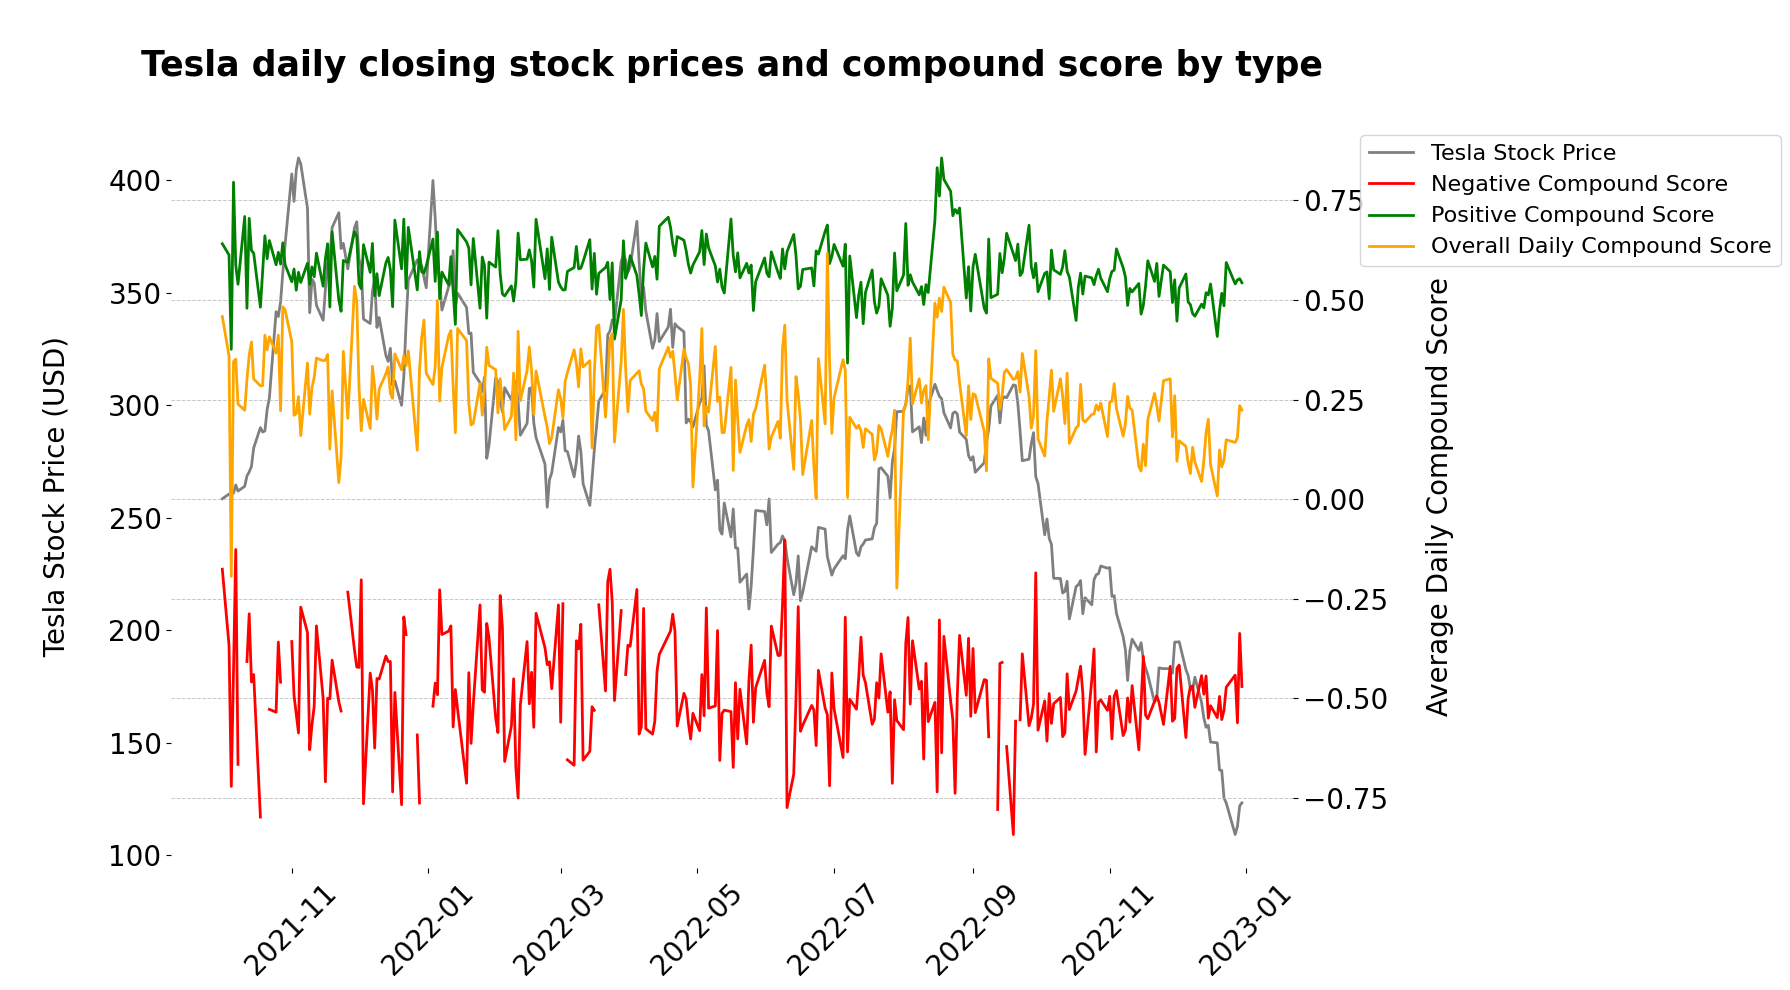

In [109]:
#Plot of positive, negative, overall compound scores and then Tesla stock price
daily_compound_score_group.index = pd.to_datetime(daily_compound_score_group.index, format="%d-%m-%Y")
tesla_stock['Date'] = pd.to_datetime(tesla_stock['Date'], format="%m/%d/%Y %H:%M:%S")

# Sort the index of daily_compound_score_group
daily_compound_score_group = daily_compound_score_group.sort_index()

# Merge the two DataFrames on the date
stock_compound = pd.merge_asof(tesla_stock, daily_compound_score_group, left_on='Date', right_index=True, direction='nearest')

fig, ax1 = plt.subplots(figsize=(18, 10))
ax1.set_xlabel('', fontsize=20)
ax1.set_ylabel('\n Tesla Stock Price (USD) \n', color='black', fontsize=20)
ax1.plot(stock_compound['Date'], stock_compound['Close'], color='black',
         label='Tesla Stock Price', linewidth=2, alpha=0.5)
ax1.tick_params(axis='y', labelcolor='black', labelsize=20)
ax1.tick_params(axis='x', labelrotation=45, labelsize=20)


ax2 = ax1.twinx()
ax2.set_ylabel('\n Average Daily Compound Score \n', color='black', fontsize=20)

ax2.plot(stock_compound['Date'], stock_compound['negative'], color='red',
         label='Negative Compound Score', linewidth=2)
ax2.plot(stock_compound['Date'], stock_compound['positive'], color='green',
         label='Positive Compound Score', linewidth=2)

ax2.plot(stock_compound['Date'], stock_compound['Overall'], color='orange',
         label='Overall Daily Compound Score', linewidth=2)

ax2.tick_params(axis='y', labelcolor='black', labelsize=20)

# Legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, fontsize=16, bbox_to_anchor=(1.05, 1), loc='upper left')

fig.tight_layout()
plt.title('\n Tesla daily closing stock prices and compound score by type \n', fontsize=25, fontweight='bold')

plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

### Hypothesis Testing
 - __<u> Null Hypothesis:<u/>__ There is no correlation between Tesla stock prices and Vader_compound_score.
 - __<u> Alternative Hypothesis:<u/>__ There is a correlation between Tesla stock prices and Vader_compound_score.

In [110]:
from scipy.stats import pearsonr

In [111]:
stock_compound.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 0 to 314
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      315 non-null    datetime64[ns]
 1   Close     315 non-null    float64       
 2   negative  299 non-null    float64       
 3   neutral   315 non-null    float64       
 4   positive  315 non-null    float64       
 5   Overall   315 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 17.2 KB


In [112]:
# Calculate correlation for Close vs Negative
stock_compound_cleaned = stock_compound[['Close', 'negative']].dropna()
correlation_negative, p_value_negative = pearsonr(stock_compound_cleaned['Close'], stock_compound_cleaned['negative'])
correlation_positive, p_value_positive = pearsonr(stock_compound['Close'], stock_compound['positive'])
correlation_overall, p_value_overall = pearsonr(stock_compound['Close'], stock_compound['Overall'])

# Significance level
alpha = 0.05

In [113]:
# Output results
print(f"Pearson Correlation Coefficient (Close vs Negative): {correlation_negative}")
print(f"P-value (Close vs Negative): {p_value_negative:.20f}")
if p_value_negative < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Don't reject the null hypothesis. There is no significant correlation.")

print("\n")

print(f"Pearson Correlation Coefficient (Close vs Positive): {correlation_positive}")
print(f"P-value (Close vs Positive): {p_value_positive:.20f}")
if p_value_positive < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Don't reject the null hypothesis. There is no significant correlation.")

print("\n")

print(f"Pearson Correlation Coefficient (Close vs Overall): {correlation_overall}")
print(f"P-value (Close vs Overall): {p_value_overall:.20f}")
if p_value_overall < alpha:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Don't reject the null hypothesis. There is no significant correlation.")

Pearson Correlation Coefficient (Close vs Negative): 0.126568423080751
P-value (Close vs Negative): 0.02865410877341505874
Reject the null hypothesis. There is a significant correlation.


Pearson Correlation Coefficient (Close vs Positive): 0.23282751248412636
P-value (Close vs Positive): 0.00003001602151098037
Reject the null hypothesis. There is a significant correlation.


Pearson Correlation Coefficient (Close vs Overall): 0.4251532770346058
P-value (Close vs Overall): 0.00000000000000294083
Reject the null hypothesis. There is a significant correlation.


The p-value is less than alpha (0.05), indicating that we reject the null hypothesis. This suggests that there is a significant correlation between Tesla stock prices and Vader compound scores. The positive correlation coefficient suggests that as stock prices increase, Vader compound scores also tend to increase. Given the very low p-value, we have strong evidence against the null hypothesis, reinforcing the conclusion that there is a significant correlation between the two variables. However, the correlation is not significantly strong, and below 50%. Yet, given the very low p-value, the null hypothesis will be rejected for the overall average compound score.

In [114]:
#stock and compound score dataframe
stock_compound

Date   Close  negative   neutral  positive   Overall
0   2021-10-01  258.41 -0.175900  0.000000  0.641273  0.458540
1   2021-10-04  260.51 -0.367050  0.000000  0.613070  0.359773
2   2021-10-05  260.20 -0.721225  0.000000  0.376200 -0.193864
3   2021-10-06  260.92 -0.431050  0.004300  0.795925  0.345694
4   2021-10-07  264.54 -0.126467  0.000000  0.587747  0.351533
5   2021-10-08  261.83 -0.665950  0.001843  0.539671  0.238433
6   2021-10-11  263.98       NaN  0.002345  0.709760  0.223413
7   2021-10-12  268.57 -0.407800  0.000000  0.479367  0.300500
8   2021-10-13  270.36 -0.287800  0.000000  0.705213  0.361864
9   2021-10-14  272.77 -0.458800  0.000000  0.624643  0.394581
10  2021-10-15  281.01 -0.440400  0.000000  0.617470  0.301805
11  2021-10-18  290.04 -0.798300  0.004300  0.482050  0.284581
12  2021-10-19  288.09       NaN  0.000000  0.569875  0.284938
13  2021-10-20  288.60 -0.750000 -0.005160  0.661269  0.411616
14  2021-10-21  298.00       NaN  0.001573  0.603617  0.375255
15  2021-10-22  303.23 -0.527800  0.000000  0.649393  0.407795
16  2021-10-25  341.62 -0.534940  0.001720  0.588507  0.366675
17  2021-10-26  339.48 -0.358750  0.000000  0.619784  0.411887
18  2021-10-27  345.95 -0.459571  0.000000  0.590191  0.221982
19  2021-10-28  359.01       NaN  0.000000  0.643692  0.482769
20  2021-10-29  371.33       NaN  0.000000  0.589081  0.475796
21  2021-11-01  402.86 -0.357550  0.000000  0.545918  0.395622
22  2021-11-02  390.67 -0.492600  0.000000  0.577845  0.210622
23  2021-11-03  404.62 -0.540450  0.000000  0.524681  0.214934
24  2021-11-04  409.97 -0.587050  0.000000  0.569767  0.257414
25  2021-11-05  407.36 -0.271033  0.000000  0.544140  0.159597
26  2021-11-08  387.65 -0.334875 -0.001843  0.592380  0.341794
27  2021-11-09  341.17 -0.629033  0.000000  0.539458  0.213577
28  2021-11-10  355.98 -0.566757  0.000000  0.583219  0.280467
29  2021-11-11  354.50 -0.520200  0.000000  0.558326  0.305170
30  2021-11-12  344.47 -0.318200  0.000000  0.617700  0.354259
31  2021-11-15  337.80 -0.500033  0.000000  0.534735  0.347519
32  2021-11-16  351.58 -0.709600  0.003225  0.604220  0.349146
33  2021-11-17  363.00 -0.499900  0.000000  0.641164  0.363235
34  2021-11-18  365.46 -0.501180  0.000000  0.482462  0.125537
35  2021-11-19  379.02 -0.404200  0.000000  0.671265  0.271874
36  2021-11-22  385.62 -0.508980  0.000000  0.499957  0.041513
37  2021-11-23  369.68 -0.532040  0.000000  0.471682  0.105346
38  2021-11-24  372.00       NaN  0.000000  0.599377  0.371043
39  2021-11-26  360.64 -0.233567  0.000000  0.594712  0.202850
40  2021-11-29  379.00 -0.379850  0.000000  0.671434  0.534626
41  2021-11-30  381.59 -0.421500  0.000000  0.659254  0.496794
42  2021-12-01  365.00 -0.422450  0.000000  0.540792  0.282230
43  2021-12-02  361.53 -0.202450  0.000000  0.528400  0.172085
44  2021-12-03  338.32 -0.765000  0.000000  0.639127  0.250616
45  2021-12-06  336.34 -0.436640  0.000000  0.569445  0.177422
46  2021-12-07  350.58 -0.479060  0.000000  0.642129  0.333738
47  2021-12-08  356.32 -0.625000  0.000000  0.510433  0.281260
48  2021-12-09  334.60 -0.450367  0.000000  0.566186  0.200938
49  2021-12-10  339.01 -0.451600  0.000000  0.510972  0.276477
50  2021-12-13  322.14 -0.394100  0.000000  0.593321  0.314912
51  2021-12-14  319.50 -0.407760  0.000000  0.606918  0.332079
52  2021-12-15  325.33 -0.407700  0.000000  0.575995  0.265190
53  2021-12-16  308.97 -0.735100  0.000000  0.483125  0.253120
54  2021-12-17  310.86 -0.485360  0.005160  0.700739  0.364725
55  2021-12-20  299.98 -0.767200  0.000000  0.578233  0.324821
56  2021-12-21  312.84 -0.295800  0.000000  0.703100  0.360353
57  2021-12-22  336.29 -0.340000  0.000000  0.529400  0.335124
58  2021-12-23  355.67       NaN  0.000000  0.682650  0.372355
59  2021-12-27  364.65 -0.592050  0.000000  0.525283  0.122975
60  2021-12-28  362.82 -0.763000  0.000000  0.621640  0.324942
61  2021-12-29  362.06       NaN  0.000000  0.570580  0.407557
62  2021-12-30  356.78       NaN  0.00000

In [99]:
#stock and compound score dataframe
#stock price percentage change
stock_compound['compound_score_change'] = round(stock_compound['Overall'].pct_change() * 100,3)
stock_compound['compound_score_change_yesterday'] = stock_compound['Overall'].shift(1)
stock_compound['compound_score_change'] = stock_compound['compound_score_change'].fillna(0)
stock_compound['stock_price_change'] = round(stock_compound['Close'].pct_change() * 100, 3)
stock_compound['stock_price_change'] = stock_compound['stock_price_change'].fillna(0)
stock_compound

Date   Close  negative   neutral  positive   Overall  \
0   2021-10-01  258.41 -0.175900  0.000000  0.641273  0.458540   
1   2021-10-04  260.51 -0.367050  0.000000  0.613070  0.359773   
2   2021-10-05  260.20 -0.721225  0.000000  0.376200 -0.193864   
3   2021-10-06  260.92 -0.431050  0.004300  0.795925  0.345694   
4   2021-10-07  264.54 -0.126467  0.000000  0.587747  0.351533   
5   2021-10-08  261.83 -0.665950  0.001843  0.539671  0.238433   
6   2021-10-11  263.98       NaN  0.002345  0.709760  0.223413   
7   2021-10-12  268.57 -0.407800  0.000000  0.479367  0.300500   
8   2021-10-13  270.36 -0.287800  0.000000  0.705213  0.361864   
9   2021-10-14  272.77 -0.458800  0.000000  0.624643  0.394581   
10  2021-10-15  281.01 -0.440400  0.000000  0.617470  0.301805   
11  2021-10-18  290.04 -0.798300  0.004300  0.482050  0.284581   
12  2021-10-19  288.09       NaN  0.000000  0.569875  0.284938   
13  2021-10-20  288.60 -0.750000 -0.005160  0.661269  0.411616   
14  2021-10-21  298.00       NaN  0.001573  0.603617  0.375255   
15  2021-10-22  303.23 -0.527800  0.000000  0.649393  0.407795   
16  2021-10-25  341.62 -0.534940  0.001720  0.588507  0.366675   
17  2021-10-26  339.48 -0.358750  0.000000  0.619784  0.411887   
18  2021-10-27  345.95 -0.459571  0.000000  0.590191  0.221982   
19  2021-10-28  359.01       NaN  0.000000  0.643692  0.482769   
20  2021-10-29  371.33       NaN  0.000000  0.589081  0.475796   
21  2021-11-01  402.86 -0.357550  0.000000  0.545918  0.395622   
22  2021-11-02  390.67 -0.492600  0.000000  0.577845  0.210622   
23  2021-11-03  404.62 -0.540450  0.000000  0.524681  0.214934   
24  2021-11-04  409.97 -0.587050  0.000000  0.569767  0.257414   
25  2021-11-05  407.36 -0.271033  0.000000  0.544140  0.159597   
26  2021-11-08  387.65 -0.334875 -0.001843  0.592380  0.341794   
27  2021-11-09  341.17 -0.629033  0.000000  0.539458  0.213577   
28  2021-11-10  355.98 -0.566757  0.000000  0.583219  0.280467   
29  2021-11-11  354.50 -0.520200  0.000000  0.558326  0.305170   
30  2021-11-12  344.47 -0.318200  0.000000  0.617700  0.354259   
31  2021-11-15  337.80 -0.500033  0.000000  0.534735  0.347519   
32  2021-11-16  351.58 -0.709600  0.003225  0.604220  0.349146   
33  2021-11-17  363.00 -0.499900  0.000000  0.641164  0.363235   
34  2021-11-18  365.46 -0.501180  0.000000  0.482462  0.125537   
35  2021-11-19  379.02 -0.404200  0.000000  0.671265  0.271874   
36  2021-11-22  385.62 -0.508980  0.000000  0.499957  0.041513   
37  2021-11-23  369.68 -0.532040  0.000000  0.471682  0.105346   
38  2021-11-24  372.00       NaN  0.000000  0.599377  0.371043   
39  2021-11-26  360.64 -0.233567  0.000000  0.594712  0.202850   
40  2021-11-29  379.00 -0.379850  0.000000  0.671434  0.534626   
41  2021-11-30  381.59 -0.421500  0.000000  0.659254  0.496794   
42  2021-12-01  365.00 -0.422450  0.000000  0.540792  0.282230   
43  2021-12-02  361.53 -0.202450  0.000000  0.528400  0.172085   
44  2021-12-03  338.32 -0.765000  0.000000  0.639127  0.250616   
45  2021-12-06  336.34 -0.436640  0.000000  0.569445  0.177422   
46  2021-12-07  350.58 -0.479060  0.000000  0.642129  0.333738   
47  2021-12-08  356.32 -0.625000  0.000000  0.510433  0.281260   
48  2021-12-09  334.60 -0.450367  0.000000  0.566186  0.200938   
49  2021-12-10  339.01 -0.451600  0.000000  0.510972  0.276477   
50  2021-12-13  322.14 -0.394100  0.000000  0.593321  0.314912   
51  2021-12-14  319.50 -0.407760  0.000000  0.606918  0.332079   
52  2021-12-15  325.33 -0.407700  0.000000  0.575995  0.265190   
53  2021-12-16  308.97 -0.735100  0.000000  0.483125  0.253120   
54  2021-12-17  310.86 -0.485360  0.005160  0.700739  0.364725   
55  2021-12-20  299.98 -0.767200  0.000000  0.578233  0.324821   
56  2021-12-21  312.84 -0.295800  0.000000  0.703100  0.360353   
57  2021-12-22  336.29 -0.340000  0.000000  0.529400  0.335124   
58  2021-12-23  355.67       NaN  0.000000  0.682650  0.372355   
59  2021-12-27  364.65 -0.592050  0.000000  0.5252

In [100]:
correlation_coefficient = stock_compound['neutral'].corr(stock_compound['Close'])
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: -0.06522850523190547


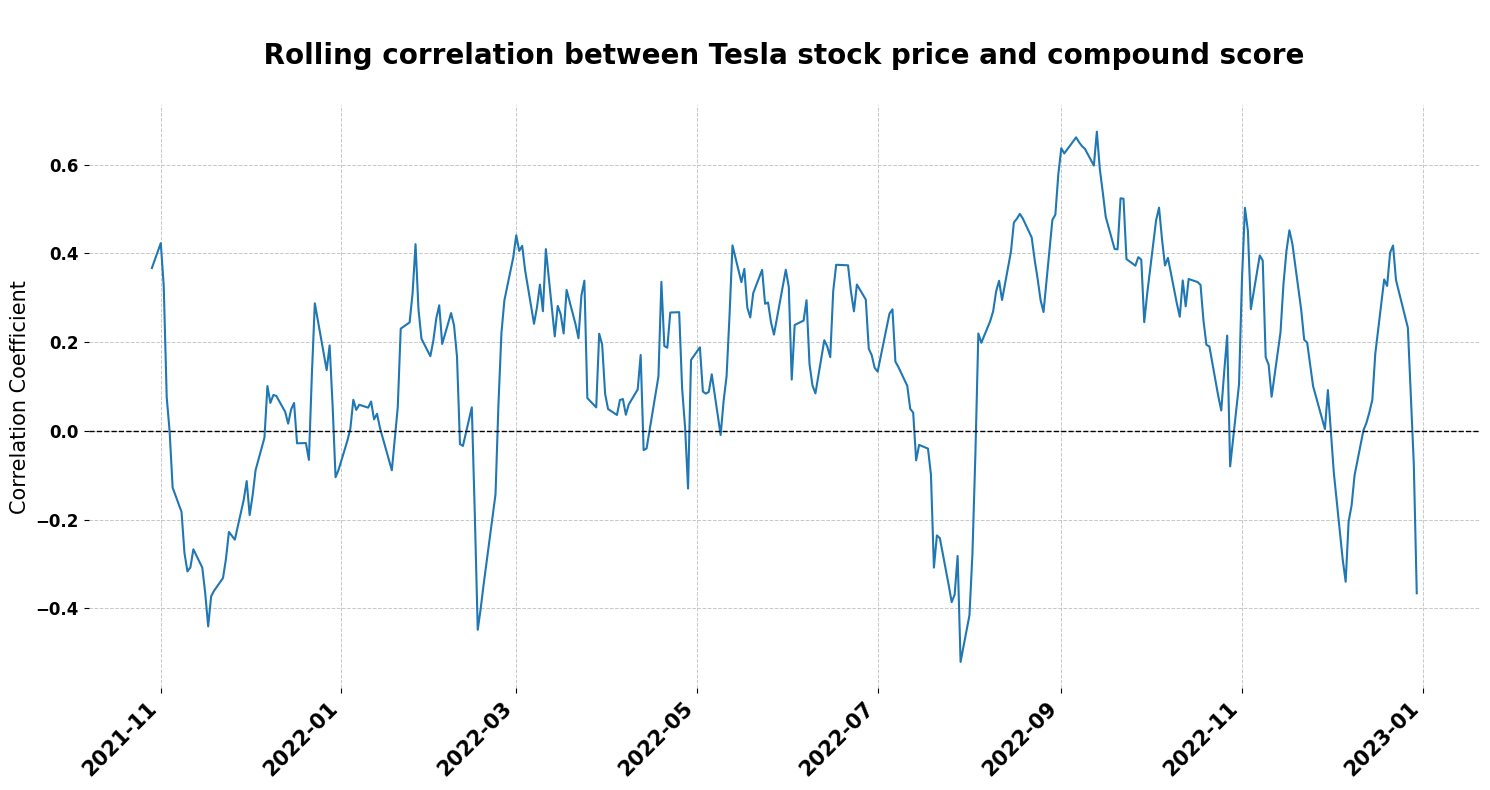

In [101]:
#rolling correlation
window_size = 21 
rolling_correlation = stock_compound['Close'].rolling(window=window_size).corr(stock_compound['Overall'])

plt.figure(figsize=(15, 8))
plt.plot(stock_compound['Date'], rolling_correlation, label=f'Rolling Correlation ({window_size}-day window)')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Correlation')
plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=15, fontweight='bold', rotation=45, ha='right')

plt.xlabel('', fontsize=20)
plt.ylabel('Correlation Coefficient', fontsize=15)
plt.title('\n Rolling correlation between Tesla stock price and compound score \n', fontsize=20, fontweight='bold')

plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

In [102]:
print(rolling_correlation)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20     0.367209
21     0.423361
22     0.326247
23     0.076112
24    -0.002307
25    -0.127756
26    -0.182392
27    -0.275589
28    -0.316639
29    -0.307508
30    -0.266807
31    -0.307749
32    -0.365491
33    -0.440622
34    -0.372572
35    -0.360162
36    -0.331553
37    -0.288528
38    -0.227600
39    -0.245036
40    -0.155247
41    -0.112993
42    -0.189630
43    -0.145461
44    -0.088503
45    -0.015078
46     0.101143
47     0.063177
48     0.080959
49     0.079003
50     0.042860
51     0.016403
52     0.048573
53     0.063013
54    -0.027859
55    -0.027333
56    -0.065293
57     0.125610
58     0.287701
59     0.137167
60     0.192784
61     0.057707
62    -0

### Explore performance correlation by month and quarterly

In [185]:
#create a copy
stock_compound_2 = stock_compound.copy()
stock_compound_2['Date'] = pd.to_datetime(stock_compound_2['Date'])
stock_compound_2.set_index('Date', inplace=True)
print(stock_compound_2.columns)

Index(['Close', 'negative', 'neutral', 'positive', 'Overall'], dtype='object')


In [186]:
#Function to calculate correlation, p-value, and significance test result
def calculate_correlation(data):
    
    # if ccolumn is present in the resampled data
    if 'Overall' not in data.columns:
        raise KeyError("'Overall' column not found in resampled data.")
    
    # Drop rows with NaN or infinite values
    data = data.replace([np.inf, -np.inf], np.nan).dropna()
    
    if data.empty:
        raise ValueError("Data contains only NaN or infinite values.")
    
    correlation, p_value = pearsonr(data['Close'], data['Overall'])
    result = "Reject the null hypothesis. There is a significant correlation." if p_value < alpha else "Don't reject the null hypothesis. There is no significant correlation."
    
    # Get the quarter and month from the first date in the group
    quarter = f"Q{data.index[0].quarter}-{data.index[0].year}"
    month = f"{data.index[0].strftime('%B')}-{data.index[0].year}"
    
    return pd.DataFrame({'Quarter': [quarter], 'Month': [month], 'Correlation': correlation, 'P-value': p_value, 'Result': result})

# Group by quarters and apply the function
try:
    quarterly_results = stock_compound_2.resample('Q').apply(calculate_correlation)
except Exception as e:
    print(f"Error: {e}")

# Group by months and apply the function
try:
    monthly_results = stock_compound_2.resample('M').apply(calculate_correlation)
except Exception as e:
    print(f"Error: {e}")

In [187]:
#Monthly correlation analysis
monthly_results

Quarter           Month  Correlation   P-value  \
0  Q4-2021    October-2021     0.158626  0.557358   
0  Q4-2021   November-2021    -0.111874  0.638656   
0  Q4-2021   December-2021    -0.454170  0.058311   
0  Q1-2022    January-2022     0.168507  0.477600   
0  Q1-2022   February-2022     0.411573  0.079985   
0  Q1-2022      March-2022    -0.011677  0.961031   
0  Q2-2022      April-2022     0.207982  0.378907   
0  Q2-2022        May-2022     0.363338  0.105457   
0  Q2-2022       June-2022     0.142298  0.538353   
0  Q3-2022       July-2022    -0.540066  0.013968   
0  Q3-2022     August-2022     0.515062  0.011901   
0  Q3-2022  September-2022     0.233498  0.351073   
0  Q4-2022    October-2022     0.105081  0.650322   
0  Q4-2022   November-2022     0.092068  0.691428   
0  Q4-2022   December-2022    -0.365892  0.102849   

                                                                   Result  
0  Don't reject the null hypothesis. There is no significant correlation.  
0  Don't reject the null hypothesis. There is no significant correlation.  
0  Don't reject the null hypothesis. There is no significant correlation.  
0  Don't reject the null hypothesis. There is no significant correlation.  
0  Don't reject the null hypothesis. There is no significant correlation.  
0  Don't reject the null hypothesis. There is no significant correlation.  
0  Don't reject the null hypothesis. There is no significant correlation.  
0  Don't reject the null hypothesis. There is no significant correlation.  
0  Don't reject the null hypothesis. There is no significant correlation.  
0         Reject the null hypothesis. There is a significant correlation.  
0         Reject the null hypothesis. There is a significant correlation.  
0  Don't reject the null hypothesis. There is no significant correlation.  
0  Don't reject the null hypothesis. There is no significant correlation.  
0  Don't reject the null hypothesis. There is no significant correlation.  
0  Don't reject the null hypothesis. There is no significant correlation.

In [188]:
#auarterly correlation analysis
quarterly_results

Quarter         Month  Correlation   P-value  \
0  Q4-2021  October-2021    -0.125993  0.363974   
0  Q1-2022  January-2022     0.230508  0.079017   
0  Q2-2022    April-2022     0.300521  0.017630   
0  Q3-2022     July-2022     0.405013  0.001205   
0  Q4-2022  October-2022     0.419774  0.000615   

                                                                   Result  
0  Don't reject the null hypothesis. There is no significant correlation.  
0  Don't reject the null hypothesis. There is no significant correlation.  
0         Reject the null hypothesis. There is a significant correlation.  
0         Reject the null hypothesis. There is a significant correlation.  
0         Reject the null hypothesis. There is a significant correlation.

### <u> Answering Research Question 3:</u> What is the overall sentiment on Twitter across geographies?

### Extracting Location

In [103]:
#unique values in the location column
unique_locations = set()
for value in tesla['Location']:
    if value not in unique_locations:
        unique_locations.add(value)
        print(value)

Arvada, CO
Raya Lucaria Academy
World
Toronto, Ontario
nan
Chicago, IL
Sarasota, FL
Huntington Beach, CA
Fremont 
United States
London, England
England, United Kingdom
Western Hemisphere
Rotterdam, The Netherlands
Zambia
Ljubljana, Slovenia
Mumbai, India
Vancouver, BC  
USA
Texas, USA
Wall Street
Detroit, MI
GETTR  @ChoiceNewsNet
SpaceXXX
I FOLLOW BACK WITHIN 1-3 DAYS 
London, UK
DM me about Promo Tweets 📢
NAmerica/AsiaPac/Europe
World Citizen
NYC
Canada
Connecticut, USA
Earth, for now
Charleston, SC to the world
Palm Beach, FL
Singapore
Paris old EU
Chicago / Puerto Rico 
India
Tulsa, Oklahoma
Jupiter,fl 
Columbus IN
New Delhi
Film City, Noida
Austalia
Hustlers University
North America
Brookline, MA
Brussels
LA
Lagos, Nigeria
Denmark
Columbus, Ohio
Seattle, WA
Earth
Harare, Zimbabwe
NY NY
Venice Fl
US
Fort Worth, TX
#Blockchain
Germany
Santa Clara, CA
Christchurch City, New Zealand
X / Starbase / Cape Canaveral
Europe, Germany, Berlin
Marche - Porto San Giorgio
Washington, DC
www.tikt

In [104]:
print(f"Number of unique locations: {len(unique_locations)}")

Number of unique locations: 4948


__As it can be seen above, the location data do not follow set patterns. For this, I will be using the geocoder library to extract and standardize location data.__

### COMMENTING OUT THE CODE FOR EXTRACTING LOCATION AS IT RUNS FOR ABOUT 48 MINS. AN EXCEL FILE OF THE RESULTS WILL BE USED IN THE NOTEBOOK.

In [105]:
# import geocoder

In [106]:
# %%time
# #getting location
# def find_location_details(location):
#     try:
#         location_info = geocoder.osm(location)
#         if location_info.ok:
#             return location_info.address
#     except Exception as e:
#         print(f"Error finding location for {location}: {e}")
#     return None

# # Create an empty list to store DataFrames
# dfs = []

# unique_locations = set()

# for value in tesla['Location']:
#     if value not in unique_locations:
#         unique_locations.add(value)
#         location_details = find_location_details(value)
#         if location_details:
#             df = pd.DataFrame({'Location': [value], 'Details': [location_details]})
#             dfs.append(df)
#         else:
#             print(f"Unable to find details for {value}")

# # Concatenate the list of DataFrames into a single DataFrame
# location_results = pd.concat(dfs, ignore_index=True)

# # Display the results DataFrame
# print(location_results)

In [107]:
# location_results

In [108]:
# ### Put the location data in csv
# location_results.to_csv('location_results.csv', index=False)
# location_results.to_excel('location_results.xlsx', index=False)

__THIS LOADS THE RESULTS GENERATED BY THE CODE COMMENTED OUT ABOVE__

In [227]:
locations_geocoder = pd.read_csv('location_results.csv')
locations_geocoder.head()

Location  \
0        Arvada, CO   
1             World   
2  Toronto, Ontario   
3       Boulder, Co   
4               NaN   

                                                                                                               Details  
0                                                                    Arvada, Jefferson County, Colorado, United States  
1           World, Church Street, Boydtown, Queenstown, Queenstown-Lakes District, Otago, 9348, New Zealand / Aotearoa  
2                                                              Old Toronto, Toronto, Golden Horseshoe, Ontario, Canada  
3                                                                     Boulder, Boulder County, Colorado, United States  
4  Nanno, Ville d'Anaunia, Comunità della Val di Non, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38019, Italia

In [228]:
#extracting country
locations_geocoder['Country'] = locations_geocoder['Details'].apply(lambda x: x.split(',')[-1].strip() if (isinstance(x, str) and ',' in x) else x)
locations_geocoder = locations_geocoder.dropna(subset=['Location'])
locations_geocoder = locations_geocoder.reset_index(drop=True)
locations_geocoder.head()

Location  \
0        Arvada, CO   
1             World   
2  Toronto, Ontario   
3       Boulder, Co   
4            Canada   

                                                                                                      Details  \
0                                                           Arvada, Jefferson County, Colorado, United States   
1  World, Church Street, Boydtown, Queenstown, Queenstown-Lakes District, Otago, 9348, New Zealand / Aotearoa   
2                                                     Old Toronto, Toronto, Golden Horseshoe, Ontario, Canada   
3                                                            Boulder, Boulder County, Colorado, United States   
4                                                                                                      Canada   

                  Country  
0           United States  
1  New Zealand / Aotearoa  
2                  Canada  
3           United States  
4                  Canada

In [229]:
# Count the locations where the country is "Italia"
italia_count = locations_geocoder[locations_geocoder['Country'].str.lower() == 'italia']
italia_count

Location  \
14       Marche - Porto San Giorgio   
153                Torino, Piemonte   
164                          Sicily   
173                              PT   
231                            Rome   
392                🇺🇸/🇪🇺 via Philly   
430                   Milano/Puglia   
480                    Genova Italy   
550              Reggio nell'Emilia   
563                      Alexandria   
596                    Milan, Italy   
623                 Vicenza (Italy)   
649          Rimini, Emilia Romagna   
666                 Ivrea, Piemonte   
731                   Verona, Italy   
757                  Carovigno (Br)   
828   Villafranca di Verona, Veneto   
845       PORTO SAN GIORGIO - ITALY   
998               Milano, Lombardia   
1069                    Milan Italy   
1073            Vittuone, Lombardia   
1119                         Milano   
1169                         Italia   
1193                         Padova   
1307                  Osimo, Ancona   
1366                          Milan   
1428                Genova, Liguria   
1604                 Treviso, Italy   
1634                  Milan - Italy   
1746                  Cardano(ADA)    
1776                          Italy   
1829                  Brescia Italy   
1886                Milan, Lombardy   
1898       Riccione, Emilia Romagna   
1939             Campobasso, Molise   
1948               Fiumicino, Lazio   
1996           Carmagnola, Piemonte   
1999                   Top 1% of 1%   
2131                        OPENSEA   
2150                        Cardano   
2206                      Spacetime   
2333                  into the wild   
2347                Catania, Sicily   
2556                    Sedrina, BG   
2593                          Rome    
2681                    Rome, Lazio   
2682                          Prato   
2692                      Doge City   
2704                       Italy 🇮🇹   
2711                   Sansepolcro    
2785        Bologna, Emilia Romagna   
2806                          Italy   
2819                      Andromeda   
2879  Bolzano, Trentino-South Tyrol   
2984                      ANDROMEDA   
2994               Monte di Procida   
3041                        Opensea   
3113                           Roma   
3120                            GTA   
3264                     Pi Network   
3287                       Roma, IT   
3351                             CO   
3365                  Modena, Italy   
3404                        OpenSea   
3460              Lombardia, Italia   
3485             Bergamo, Lombardia   
3539                         Narnia   
3622                          italy   
3658             Brescia, Lombardia   
3661                Lodi, Lombardia   
3686                Ravenna , Italy   
3713                         Torino   
3747                        Scampia   
3785               Segusino, Veneto   
3790             Iglesias, Sardegna   
3879                    Florida Man   
3942   Santa Lucia di Piave, Veneto   
4020                           roma   
4066                   Goblin Town    
4083                Arezzo, Toscana   
4090                           none   
4167                   Ancona,Italy   
4177            43.587061,11.989888   
4270             45.467495,9.153237   
4289                    Planet Mars   
4341         41.3598° N, 15.3081° E   

                                                                                                                                            Details  \
14                                                                                                  Porto San Giorgio, Fermo, Marche, 63822, Italia   
153                                                                                                                        Torino, Piemonte, Italia   
164                                                                                                                                 Sicilia, Italia   
173                          

__Combining the location file and the dataframe__

In [230]:
#Combining the location file and the dataframe
tesla_3 = pd.merge(tesla_2, locations_geocoder, on='Location', how='left')
tesla_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24604 entries, 0 to 24603
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Username                              24604 non-null  object        
 1   UTC Date                              24604 non-null  datetime64[ns]
 2   Tweet                                 24604 non-null  object        
 3   Location                              17902 non-null  object        
 4   Followers                             24603 non-null  float64       
 5   Bio                                   19061 non-null  object        
 6   Date                                  24604 non-null  object        
 7   New_Tweets                            24604 non-null  object        
 8   New_Tweets_2                          24604 non-null  object        
 9   hashtag                               24604 non-null  object        
 10

In [231]:
tesla_3['Country'] = tesla_3['Details'].apply(lambda x: x.split(',')[-1].strip() if (isinstance(x, str) and ',' in x) else x)
tesla_3.head()

Username            UTC Date  \
0  @doctorgfitness 2022-12-07 22:23:51   
1   @elonchieftwit 2022-12-07 22:15:02   
2   @elonchieftwit 2022-12-07 22:01:06   
3   @elonchieftwit 2022-12-07 22:01:04   
4  @leoventuresllc 2022-12-07 21:53:47   

                                                                                                                                               Tweet  \
0                              @brent_peabody Are they assuming that once #Elon is gone the #Tesla will be gone too? Tesla is bigger than #ElonMusk.   
1              EM @elonmusk Germany’s EVs Near 40% Share – Tesla Model 3 Bestseller - CleanTechnica https://t.co/7UpZLR38eL #ElonMusk #Tesla #SpaceX   
2  EM @elonmusk China's EV giant BYD takes on Tesla close to home - The Australian Financial Review https://t.co/c2goU0Vp0G #ElonMusk #Tesla #SpaceX   
3   EM @elonmusk Why This Market Is So Dangerous; Tesla Nears Bear Lows - Investor's Business Daily https://t.co/R8093lHt8T #ElonMusk #Tesla #SpaceX   
4                         Tesla..What Can You Say!! #tesla #tsla #stock #stockmarket #options #money #cars #tech #technology https://t.co/fPGCXfUouu   

               Location  Followers  \
0            Arvada, CO     2880.0   
1  Raya Lucaria Academy      288.0   
2  Raya Lucaria Academy      288.0   
3  Raya Lucaria Academy      288.0   
4           Chicago, IL      309.0   

                                                                                                                                                    Bio  \
0  Take charge of your health and fitness! Be More, Do More, Expect More of Yourself! Question Mainstream Narratives! Be Kind to Strangers and Animals!   
1                                                                                                                                                   NaN   
2                                                                                                                                                   NaN   
3                                                                                                                                                   NaN   
4                                                                                                                             Full Time Futures Trading   

         Date  \
0  2022-12-07   
1  2022-12-07   
2  2022-12-07   
3  2022-12-07   
4  2022-12-07   

                                                                      New_Tweets  \
0                                          Are assuming gone gone ? Tesla bigger   
1                    Germany EVs Near Share Tesla Model Bestseller CleanTechnica   
2      China EV giant BYD takes Tesla close home The Australian Financial Review   
3  Why This Market Is So Dangerous Tesla Nears Bear Lows Investor Business Daily   
4                                                     Tesla What Can You Say ! !   

                                                                    New_Tweets_2  \
0                                          Are assuming gone gone ? Tesla bigger   
1                    Germany EVs Near Share Tesla Model Bestseller CleanTechnica   
2       China EV giant BYD take Tesla close home The Australian Financial Review   
3  Why This Market Is So Dangerous Tesla Nears Bear Lows Investor Business Daily   
4                                                     Tesla What Can You Say ! !   

                                                                     hashtag  \
0                                                    [Elon, Tesla, ElonMusk]   
1                                                  [ElonMusk, Tesla, SpaceX]   
2                                                  [ElonMusk, Tesla, SpaceX]   
3                                                  [ElonMusk, Tesla, SpaceX]   
4  [tesla, tsla, stock, stockmarket, options, money, cars, tech, technology]   

   ... language Words_in_Tweet Vader_compound_score Vader_sentiment  \
0  ...       it    

In [232]:
#removing rows where country in null
tesla_3 = tesla_3.dropna(subset=['Country'])
tesla_3 = tesla_3.reset_index(drop=True)
tesla_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Username                              12491 non-null  object        
 1   UTC Date                              12491 non-null  datetime64[ns]
 2   Tweet                                 12491 non-null  object        
 3   Location                              12491 non-null  object        
 4   Followers                             12491 non-null  float64       
 5   Bio                                   11870 non-null  object        
 6   Date                                  12491 non-null  object        
 7   New_Tweets                            12491 non-null  object        
 8   New_Tweets_2                          12491 non-null  object        
 9   hashtag                               12491 non-null  object        
 10

In [233]:
#unique countries
tesla_3.Country.unique()

array(['United States', 'United Kingdom', 'Nederland', 'Zambia',
       'Slovenija', 'Canada', 'India', 'North America', 'Nigeria',
       'Zimbabwe', 'Česko', 'New Zealand / Aotearoa', 'Singapore',
       'ประเทศไทย', 'België / Belgique / Belgien',
       'Schweiz/Suisse/Svizzera/Svizra', 'Türkiye', 'România', 'Kosovë',
       'Australia', 'پاکستان', 'الإمارات العربية المتحدة', 'Deutschland',
       'Centrafrique', 'France', '中国', 'Italia', 'Philippines',
       'South Africa', 'Polska', 'Kenya', '대한민국', 'السعودية',
       'Suomi / Finland', 'Portugal', 'México', 'Uganda',
       'Maroc ⵍⵎⵖⵔⵉⴱ المغرب', 'Perú', 'Danmark', 'Sverige', 'Dominica',
       'Brunei', 'Malta', 'България', 'Ελλάς', 'Österreich', 'Norge',
       'Ísland', 'Malaysia', 'Brasil', 'ישראל', 'Monaco', 'San Marino',
       '臺灣', 'España', '日本', 'Ecuador', 'أوروبا', 'ایران',
       'Éire / Ireland', 'Crna Gora / Црна Гора', 'Україна', 'Cameroun',
       'Κύπρος - Kıbrıs', 'Chile', 'Eesti', 'ދިވެހިރާއްޖެ', 'Africa',
   

__Remove countries that are not in English language__

In [234]:
%%time
import pycountry
def is_valid_country(location):
    try:
        country = pycountry.countries.search_fuzzy(location)
        return len(country) > 0
    except:
        return False
    
unique_countries = tesla_3['Country'].unique()
valid_countries = [country for country in unique_countries if is_valid_country(country)]
tesla_3 = tesla_3[tesla_3['Country'].isin(valid_countries)]
tesla_3.Country.value_counts()

CPU times: total: 3.19 s
Wall time: 3.25 s


Country
United States             5293
India                     1501
United Kingdom            1446
Canada                     768
France                     320
Australia                  278
Portugal                   180
Kenya                       90
Italia                      90
South Africa                86
Nigeria                     73
Indonesia                   68
Singapore                   57
Philippines                 52
Malaysia                    31
Danmark                     30
Uruguay                     21
Colombia                    20
México                      13
România                     13
Uganda                      13
Ghana                       12
Việt Nam                    11
Tanzania                    11
Österreich                  10
Argentina                    8
Chile                        6
Venezuela                    6
Africa                       5
Ísland                       5
Malta                        5
Monaco                       4


In [235]:
#info
tesla_3 = tesla_3.reset_index(drop=True)
tesla_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10581 entries, 0 to 10580
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Username                              10581 non-null  object        
 1   UTC Date                              10581 non-null  datetime64[ns]
 2   Tweet                                 10581 non-null  object        
 3   Location                              10581 non-null  object        
 4   Followers                             10581 non-null  float64       
 5   Bio                                   10097 non-null  object        
 6   Date                                  10581 non-null  object        
 7   New_Tweets                            10581 non-null  object        
 8   New_Tweets_2                          10581 non-null  object        
 9   hashtag                               10581 non-null  object        
 10

In [236]:
#keeping countries where there are more than 50 rows
country_counts = tesla_3['Country'].value_counts()
valid_countries_count = country_counts[country_counts > 50].index
tesla_3 = tesla_3[tesla_3['Country'].isin(valid_countries_count)]
tesla_3 = tesla_3.reset_index(drop=True)
tesla_3.Country.value_counts()

Country
United States     5293
India             1501
United Kingdom    1446
Canada             768
France             320
Australia          278
Portugal           180
Italia              90
Kenya               90
South Africa        86
Nigeria             73
Indonesia           68
Singapore           57
Philippines         52
Name: count, dtype: int64

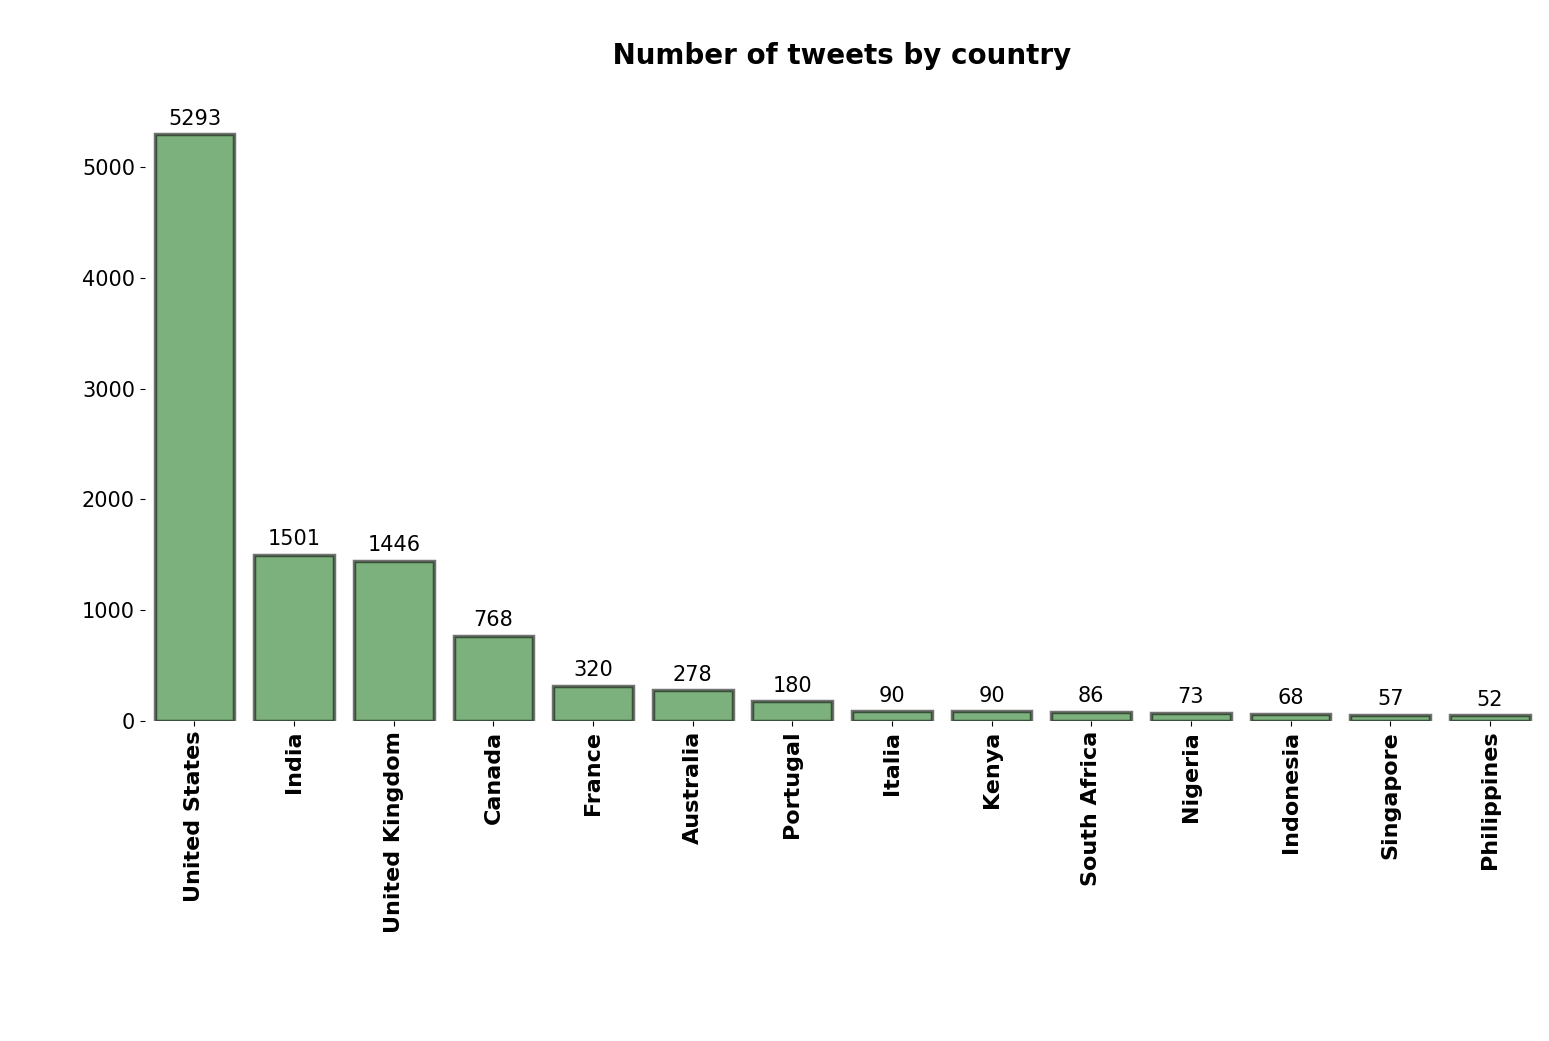

In [237]:
#counting tweets from the countries
plt.figure(figsize=(18, 8))

# Create the countplot and store the axis object
country_plot = sns.countplot(data=tesla_3, x='Country', color = 'green',
                              edgecolor='black', alpha=0.55, linewidth=2.5,
                              order=tesla_3['Country'].value_counts().index)

for bars in country_plot.containers:
    country_plot.bar_label(bars, padding=4, fontsize=15)

plt.tick_params(bottom=True, left=True)
plt.yticks(fontsize=15)
plt.xticks(fontsize=16, fontweight='bold', rotation = 90)

plt.title('\n Number of tweets by country \n', fontsize=20, fontweight='bold')
plt.xlabel('\n \n', fontsize=20, fontweight='bold')
plt.ylabel('\n \n', fontsize=15, fontweight='bold')

sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

__Average daily compound score__

In [120]:
#daily compound score mean
daily_mean_compound_score_country = tesla_3.groupby(['date_month', 'Country'])['Vader_compound_score'].mean().reset_index()
daily_mean_compound_score_country

date_month         Country  Vader_compound_score
0     01-01-2022          France              0.000000
1     01-01-2022          Italia              0.571900
2     01-01-2022  United Kingdom             -0.250000
3     01-01-2022   United States              0.688833
4     01-02-2022           India              0.784500
5     01-02-2022     Philippines              0.000000
6     01-02-2022   United States              0.008457
7     01-03-2022           India              0.541300
8     01-03-2022   United States              0.138550
9     01-04-2022          Canada              0.210750
10    01-04-2022           India              0.380200
11    01-04-2022  United Kingdom              0.077640
12    01-04-2022   United States              0.272550
13    01-05-2022          Canada              0.585900
14    01-05-2022          France              0.000000
15    01-05-2022           India              0.625640
16    01-05-2022       Indonesia              0.000000
17    01-05-2022  United Kingdom             -0.278700
18    01-05-2022   United States              0.635038
19    01-06-2022       Australia              0.461900
20    01-06-2022          Canada              0.576367
21    01-06-2022          France              0.220200
22    01-06-2022           India              0.000000
23    01-06-2022    South Africa              0.526700
24    01-06-2022  United Kingdom             -0.099100
25    01-06-2022   United States              0.311022
26    01-07-2022       Australia              0.836000
27    01-07-2022          Canada             -0.526700
28    01-07-2022          France              0.202300
29    01-07-2022           India              0.607200
30    01-07-2022  United Kingdom              0.000000
31    01-07-2022   United States              0.488467
32    01-08-2022       Australia              0.131833
33    01-08-2022          Canada              0.480300
34    01-08-2022           India              0.698100
35    01-08-2022  United Kingdom             -0.476700
36    01-08-2022   United States              0.288745
37    01-09-2022          Canada              0.278700
38    01-09-2022          France              0.624900
39    01-09-2022           India              0.716967
40    01-09-2022       Indonesia              0.000000
41    01-09-2022    South Africa              0.493900
42    01-09-2022  United Kingdom              0.385850
43    01-09-2022   United States              0.281600
44    01-10-2021           India              0.596500
45    01-10-2021  United Kingdom              0.784500
46    01-10-2021   United States              0.271250
47    01-10-2022       Australia              0.000000
48    01-10-2022          Canada             -0.092700
49    01-10-2022          France              0.158150
50    01-10-2022           India              0.211006
51    01-10-2022    South Africa              0.564950
52    01-10-2022  United Kingdom              0.140500
53    01-10-2022   United States              0.228900
54    01-11-2021       Australia              0.299700
55    01-11-2021          Canada              0.585900
56    01-11-2021          France              0.376450
57    01-11-2021           India              0.496071
58    01-11-2021  United Kingdom              0.335250
59    01-11-2021   United States              0.407639
60    01-11-2022       Australia              0.629000
61    01-11-2022          Canada              0.209800
62    01-11-2022           India             -0.157645
63    01-11-2022          Italia              0.250000
64    01-11-2022         Nigeria              0.000000
65    01-11-2022  United Kingdom              0.381425
66    01-11-2022   United States              0.150833
67    01-12-2021       Indonesia              0.844200
68    01-12-2021          Italia              0.901700
69    01-12-2021  United Kingdom              0.000000
70    01-12-2021   United States              0.349825
71    01-12-2022          Canada              

__Average monthly compound score__

In [121]:
#monthly compound score mean
tesla_3['Date'] = pd.to_datetime(tesla_3['UTC Date'].dt.date)
tesla_3['year_month'] = tesla_3['Date'].dt.to_period('M')
monthly_mean_compound_score_country = tesla_3.groupby(['year_month', 'Country'])['Vader_compound_score'].mean().reset_index()
monthly_mean_compound_score_country

year_month         Country  Vader_compound_score
0      2021-10       Australia              0.290593
1      2021-10          Canada              0.164011
2      2021-10          France              0.217700
3      2021-10           India              0.357124
4      2021-10       Indonesia              0.542300
5      2021-10          Italia              0.393225
6      2021-10         Nigeria              0.000000
7      2021-10    South Africa             -0.443000
8      2021-10  United Kingdom              0.391436
9      2021-10   United States              0.367916
10     2021-11       Australia              0.123371
11     2021-11          Canada              0.239244
12     2021-11          France              0.263318
13     2021-11           India              0.240332
14     2021-11       Indonesia              0.474680
15     2021-11          Italia              0.369700
16     2021-11           Kenya              0.000000
17     2021-11     Philippines              0.924600
18     2021-11        Portugal              0.476700
19     2021-11       Singapore              0.183814
20     2021-11    South Africa              0.233833
21     2021-11  United Kingdom              0.208668
22     2021-11   United States              0.228298
23     2021-12       Australia              0.409133
24     2021-12          Canada              0.148503
25     2021-12          France              0.324410
26     2021-12           India              0.247450
27     2021-12       Indonesia              0.844200
28     2021-12          Italia              0.179575
29     2021-12           Kenya              0.623900
30     2021-12       Singapore              0.197560
31     2021-12    South Africa              0.648600
32     2021-12  United Kingdom              0.193206
33     2021-12   United States              0.282504
34     2022-01       Australia              0.403026
35     2022-01          Canada              0.298637
36     2022-01          France              0.329375
37     2022-01           India              0.217347
38     2022-01       Indonesia              0.000000
39     2022-01          Italia              0.542057
40     2022-01         Nigeria              0.636900
41     2022-01     Philippines              0.414213
42     2022-01       Singapore             -0.318200
43     2022-01    South Africa              0.344200
44     2022-01  United Kingdom              0.092676
45     2022-01   United States              0.294189
46     2022-02       Australia              0.231000
47     2022-02          Canada              0.121595
48     2022-02          France              0.370820
49     2022-02           India              0.284187
50     2022-02       Indonesia              0.190233
51     2022-02          Italia              0.008560
52     2022-02           Kenya              0.768000
53     2022-02         Nigeria              0.358850
54     2022-02     Philippines              0.000000
55     2022-02        Portugal              0.000000
56     2022-02       Singapore              0.634067
57     2022-02    South Africa              0.773433
58     2022-02  United Kingdom              0.128426
59     2022-02   United States              0.128718
60     2022-03       Australia              0.739661
61     2022-03          Canada              0.279577
62     2022-03          France              0.486933
63     2022-03           India              0.312455
64     2022-03       Indonesia              0.426910
65     2022-03          Italia              0.469960
66     2022-03           Kenya              0.957800
67     2022-03         Nigeria              0.850800
68     2022-03     Philippines              0.794700
69     2022-03       Singapore              0.219550
70     2022-03    South Africa              0.851900
71     2022-03  United Kingdom              0.176239
72     2022-03   United States              0.335706
73     2022-04       Australia              0.113710
74     2022-04          Canad

In [122]:
#selected countries to observe with more than 100 rows
selected_countries = ['United States', 'India',
                      'United Kingdom', 'Canada',
                      'France', 'Australia', 'Portugal']
selected_country_data = monthly_mean_compound_score_country[monthly_mean_compound_score_country['Country'].isin(selected_countries)].copy()
selected_country_data

year_month         Country  Vader_compound_score
0      2021-10       Australia              0.290593
1      2021-10          Canada              0.164011
2      2021-10          France              0.217700
3      2021-10           India              0.357124
8      2021-10  United Kingdom              0.391436
9      2021-10   United States              0.367916
10     2021-11       Australia              0.123371
11     2021-11          Canada              0.239244
12     2021-11          France              0.263318
13     2021-11           India              0.240332
18     2021-11        Portugal              0.476700
21     2021-11  United Kingdom              0.208668
22     2021-11   United States              0.228298
23     2021-12       Australia              0.409133
24     2021-12          Canada              0.148503
25     2021-12          France              0.324410
26     2021-12           India              0.247450
32     2021-12  United Kingdom              0.193206
33     2021-12   United States              0.282504
34     2022-01       Australia              0.403026
35     2022-01          Canada              0.298637
36     2022-01          France              0.329375
37     2022-01           India              0.217347
44     2022-01  United Kingdom              0.092676
45     2022-01   United States              0.294189
46     2022-02       Australia              0.231000
47     2022-02          Canada              0.121595
48     2022-02          France              0.370820
49     2022-02           India              0.284187
55     2022-02        Portugal              0.000000
58     2022-02  United Kingdom              0.128426
59     2022-02   United States              0.128718
60     2022-03       Australia              0.739661
61     2022-03          Canada              0.279577
62     2022-03          France              0.486933
63     2022-03           India              0.312455
71     2022-03  United Kingdom              0.176239
72     2022-03   United States              0.335706
73     2022-04       Australia              0.113710
74     2022-04          Canada              0.250962
75     2022-04          France              0.127700
76     2022-04           India              0.291527
82     2022-04        Portugal              0.465300
85     2022-04  United Kingdom              0.183716
86     2022-04   United States              0.372277
87     2022-05       Australia              0.276954
88     2022-05          Canada              0.282949
89     2022-05          France              0.079208
90     2022-05           India              0.126750
96     2022-05        Portugal              0.391900
99     2022-05  United Kingdom              0.060188
100    2022-05   United States              0.250801
101    2022-06       Australia              0.295146
102    2022-06          Canada              0.157427
103    2022-06          France             -0.057788
104    2022-06           India              0.332224
110    2022-06        Portugal              0.594300
113    2022-06  United Kingdom              0.067468
114    2022-06   United States              0.182725
115    2022-07       Australia              0.172482
116    2022-07          Canada              0.269973
117    2022-07          France              0.204005
118    2022-07           India              0.311416
124    2022-07        Portugal             -0.071688
126    2022-07  United Kingdom              0.039528
127    2022-07   United States              0.174086
128    2022-08       Australia              0.350507
129    2022-08          Canada              0.193035
130    2022-08          France              0.723855
131    2022-08           India              0.322319
137    2022-08        Portugal              0.000000
139    2022-08  United Kingdom              0.151326
140    2022-08   United States              0.268362
141    2022-09       Australia              0.423482
142    2022-09          Canad

In [123]:
selected_country_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 195
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype    
---  ------                --------------  -----    
 0   year_month            100 non-null    period[M]
 1   Country               100 non-null    object   
 2   Vader_compound_score  100 non-null    float64  
dtypes: float64(1), object(1), period[M](1)
memory usage: 3.1+ KB


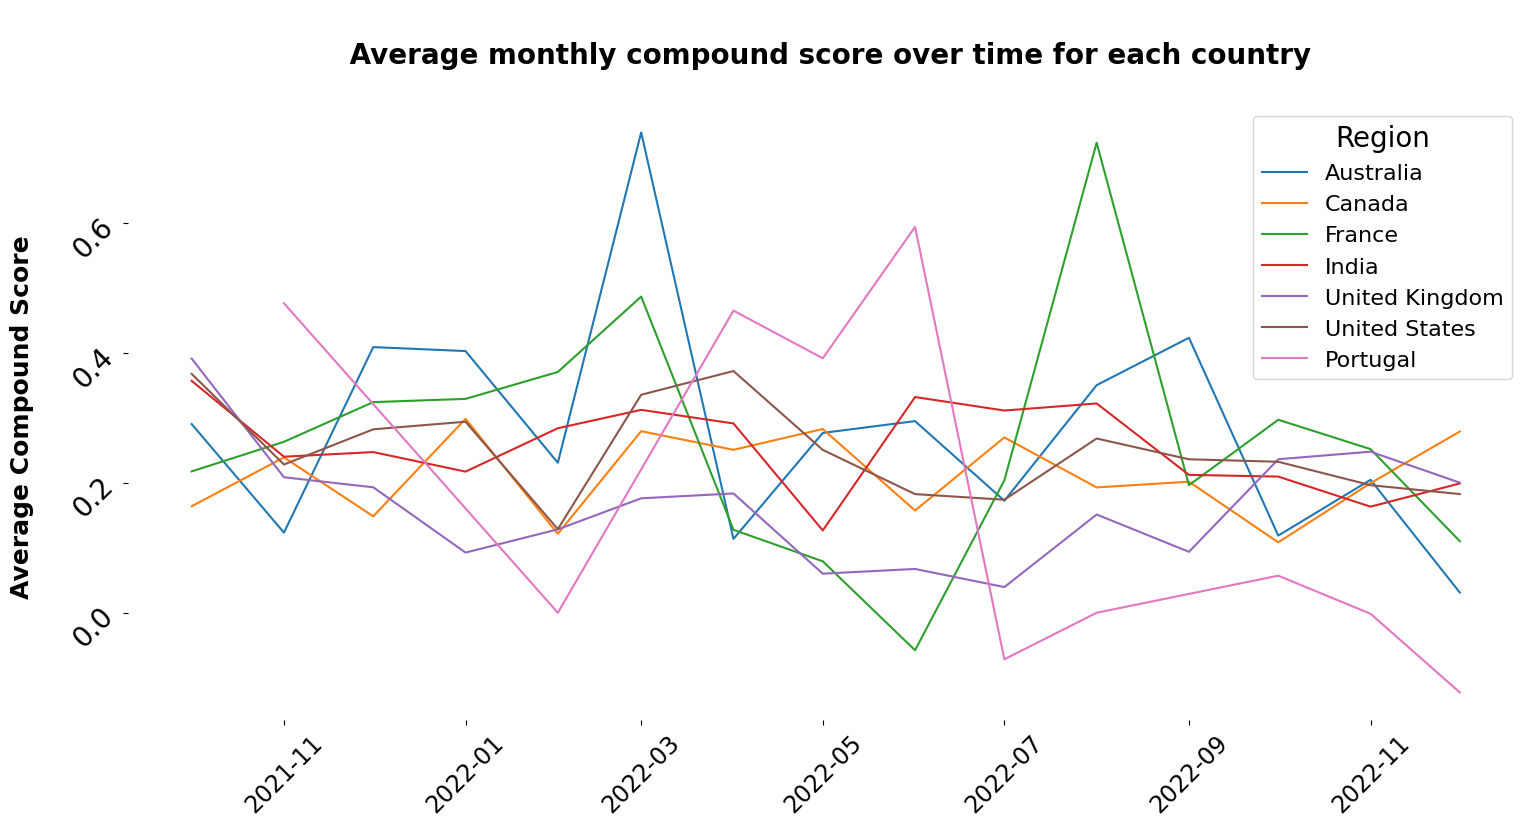

In [124]:
# Convert year_month to datetime
selected_country_data['year_month'] = selected_country_data['year_month'].astype('datetime64[ns]')
selected_country_data = selected_country_data.sort_values(by='year_month')

# Plot
plt.figure(figsize=(18, 8))
sns.lineplot(data=selected_country_data, x='year_month', y='Vader_compound_score', hue='Country')
plt.xticks(rotation=45, fontsize=17)
plt.yticks(rotation=45, fontsize=20)
plt.xlabel('', fontsize=20, fontweight='bold')
plt.ylabel('Average Compound Score \n', fontsize=18, fontweight='bold')
plt.title('\n Average monthly compound score over time for each country\n', fontsize=20, fontweight='bold')
plt.legend(fontsize=16, title='Region', title_fontsize=20)
sns.despine(top=True, right=True, left=True, bottom=True)

plt.show()

In [242]:
#mean scores by country
mean_score_country = round(tesla_3.groupby(['Country'])['Vader_compound_score'].mean().reset_index(),3)
mean_score_country

Country  Vader_compound_score
0        Australia                 0.236
1           Canada                 0.213
2           France                 0.256
3            India                 0.234
4        Indonesia                 0.331
5           Italia                 0.201
6            Kenya                 0.468
7          Nigeria                 0.393
8      Philippines                 0.373
9         Portugal                 0.009
10       Singapore                 0.183
11    South Africa                 0.360
12  United Kingdom                 0.133
13   United States                 0.237

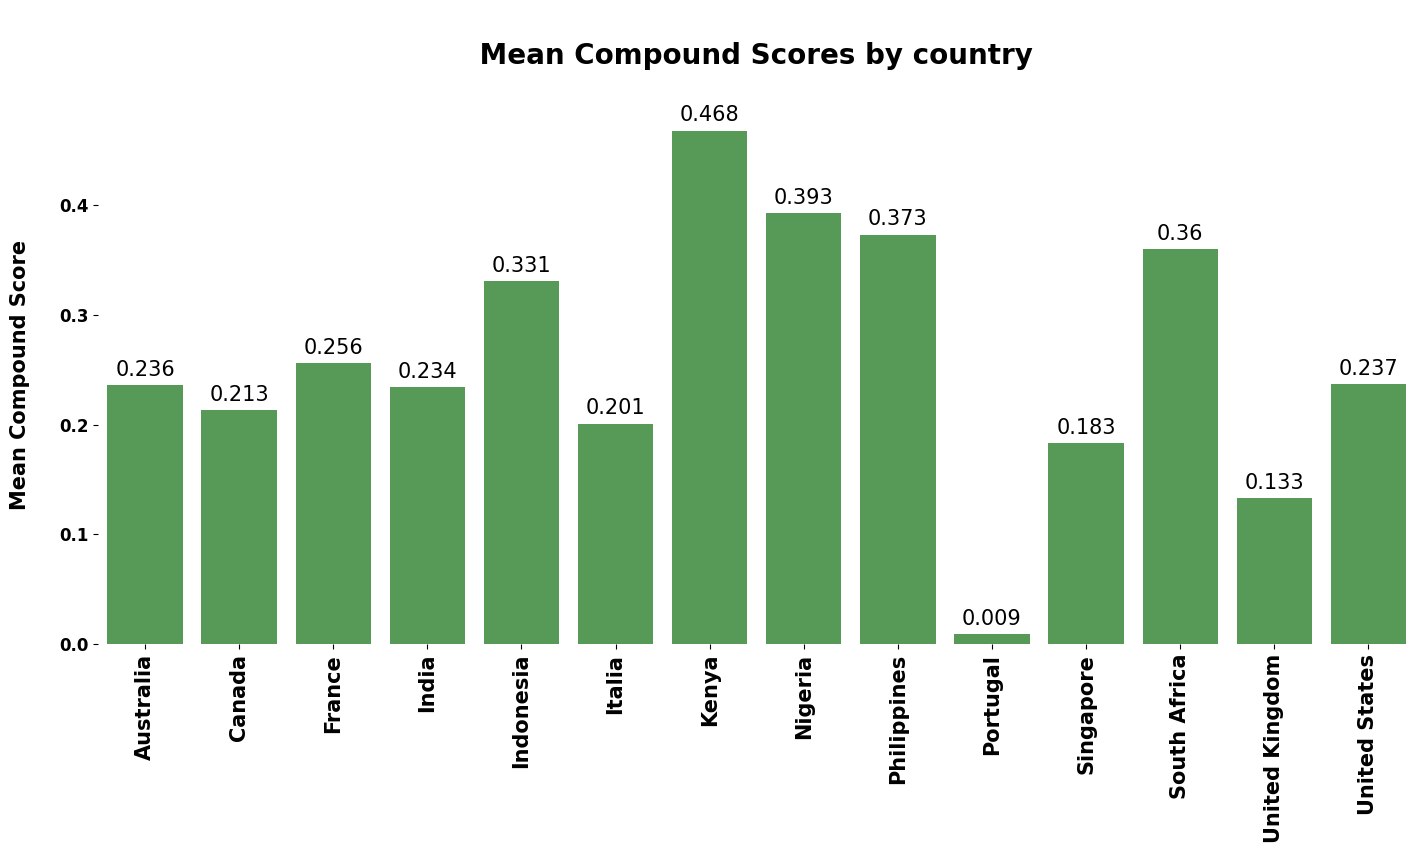

In [243]:
#Mean compound scores by country
plt.figure(figsize=(17, 7))

# Plotting the bars
meanscore = sns.barplot(data=mean_score_country, x='Country', y='Vader_compound_score', color='Green', alpha=0.7)

for bars in meanscore.containers:
    meanscore.bar_label(bars, padding=4, fontsize=15)

plt.tick_params(bottom=True, left=True)
plt.xticks(rotation=90, fontsize=15, fontweight='bold')
plt.yticks(rotation=0, fontsize=12, fontweight='bold')
plt.title('\n Mean Compound Scores by country \n', fontsize=20, fontweight='bold')
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Mean Compound Score\n', fontsize=15, fontweight='bold')

sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

__Sentiments by country__

In [127]:
#sentiment by country
country_voted_sentiment = tesla_3.groupby(['Country', 'Voted_label']).size().unstack(fill_value=0).reset_index()

# Calculate the total count and percentages
country_voted_sentiment['Total_count'] = country_voted_sentiment['positive'] + country_voted_sentiment['neutral'] + country_voted_sentiment['negative']
country_voted_sentiment['percent_negative'] = round((country_voted_sentiment['negative'] / country_voted_sentiment['Total_count']) * 100, 2)
country_voted_sentiment['percent_neutral'] = round((country_voted_sentiment['neutral'] / country_voted_sentiment['Total_count']) * 100, 2)
country_voted_sentiment['percent_positive'] = round((country_voted_sentiment['positive'] / country_voted_sentiment['Total_count']) * 100, 2)
country_voted_sentiment

Voted_label         Country  negative  neutral  positive  Total_count  \
0                 Australia        49       81       148          278   
1                    Canada       114      262       392          768   
2                    France        31      128       161          320   
3                     India       188      497       816         1501   
4                 Indonesia         5       23        40           68   
5                    Italia        11       32        47           90   
6                     Kenya         2       31        57           90   
7                   Nigeria         4       21        48           73   
8               Philippines         4       17        31           52   
9                  Portugal        67       33        80          180   
10                Singapore         7       21        29           57   
11             South Africa         9        6        71           86   
12           United Kingdom       209      650       587         1446   
13            United States       850     1564      2879         5293   

Voted_label  percent_negative  percent_neutral  percent_positive  
0                       17.63            29.14             53.24  
1                       14.84            34.11             51.04  
2                        9.69            40.00             50.31  
3                       12.52            33.11             54.36  
4                        7.35            33.82             58.82  
5                       12.22            35.56             52.22  
6                        2.22            34.44             63.33  
7                        5.48            28.77             65.75  
8                        7.69            32.69             59.62  
9                       37.22            18.33             44.44  
10                      12.28            36.84             50.88  
11                      10.47             6.98             82.56  
12                      14.45            44.95             40.59  
13                      16.06            29.55             54.39

### DATA CLEANING FOR MODELS

In [128]:
#https://www.kaggle.com/code/rajmehra03/a-complete-tweet-classfication-guide-word2vec-lstm
#https://www.kaggle.com/code/chirag9073/amazon-fine-food-reviews-sentiment-analysis
#https://www.kaggle.com/code/faressayah/sentiment-model-with-tensorflow-transformers

"""
Function to carry out the required tweet preprocessing
"""

def clean_text(tweet):
    # remove urls
    tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet)

    # remove html
    tweet = re.sub(r'<.*?>', '', tweet)

    # remove username
    tweet = re.sub('@[^\s]+', '', tweet)

    # remove hashtags
    tweet = re.sub(r'#\w+\s*', '', tweet)

    # remove emojis
    tweet = re.sub("["
                    u"\U0001F600-\U0001F64F"  # emoticons
                    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                    u"\U0001F680-\U0001F6FF"  # transport & map symbols
                    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                    u"\U00002702-\U000027B0"
                    u"\U000024C2-\U0001F251"
                    "]+", '', tweet, flags=re.UNICODE)

    tweet = ''.join(char for char in tweet if ord(char) < 128)
    
    # Handle specific case for "EM"
    tweet = re.sub(r'\bEM\b', '', tweet)

    # expand contractions
    tweet = contractions.fix(tweet)

    # remove punctuation and extra spaces
    tweet = re.sub(f"[{PUNCT_TO_REMOVE}–]+", ' ', tweet)

    # remove numbers
    tweet = re.sub(r'\b\d+\w*\b', '', tweet)

    # remove '’s'
    tweet = re.sub(r"’s", ' ', tweet)

    # Remove standalone 'amp' word
    tweet = ' '.join(word for word in tweet.split() if word.lower() != 'amp')

    # convert tweets to lowercase and remove extra spaces
    tweet = ' '.join(tweet.lower().split())

    # remove stopwords
    tweet = ' '.join([word for word in tweet.split() if word not in STOPWORDS])

    return tweet 

# Doing the cleaning
tesla_2['New_Tweets_model'] = tesla_2['Tweet'].apply(clean_text)
tesla_2.head()

Username            UTC Date  \
0  @doctorgfitness 2022-12-07 22:23:51   
1   @elonchieftwit 2022-12-07 22:15:02   
2   @elonchieftwit 2022-12-07 22:01:06   
3   @elonchieftwit 2022-12-07 22:01:04   
4  @leoventuresllc 2022-12-07 21:53:47   

                                                                                                                                               Tweet  \
0                              @brent_peabody Are they assuming that once #Elon is gone the #Tesla will be gone too? Tesla is bigger than #ElonMusk.   
1              EM @elonmusk Germany’s EVs Near 40% Share – Tesla Model 3 Bestseller - CleanTechnica https://t.co/7UpZLR38eL #ElonMusk #Tesla #SpaceX   
2  EM @elonmusk China's EV giant BYD takes on Tesla close to home - The Australian Financial Review https://t.co/c2goU0Vp0G #ElonMusk #Tesla #SpaceX   
3   EM @elonmusk Why This Market Is So Dangerous; Tesla Nears Bear Lows - Investor's Business Daily https://t.co/R8093lHt8T #ElonMusk #Tesla #SpaceX   
4                         Tesla..What Can You Say!! #tesla #tsla #stock #stockmarket #options #money #cars #tech #technology https://t.co/fPGCXfUouu   

               Location  Followers  \
0            Arvada, CO     2880.0   
1  Raya Lucaria Academy      288.0   
2  Raya Lucaria Academy      288.0   
3  Raya Lucaria Academy      288.0   
4           Chicago, IL      309.0   

                                                                                                                                                    Bio  \
0  Take charge of your health and fitness! Be More, Do More, Expect More of Yourself! Question Mainstream Narratives! Be Kind to Strangers and Animals!   
1                                                                                                                                                   NaN   
2                                                                                                                                                   NaN   
3                                                                                                                                                   NaN   
4                                                                                                                             Full Time Futures Trading   

         Date  \
0  2022-12-07   
1  2022-12-07   
2  2022-12-07   
3  2022-12-07   
4  2022-12-07   

                                                                      New_Tweets  \
0                                          Are assuming gone gone ? Tesla bigger   
1                    Germany EVs Near Share Tesla Model Bestseller CleanTechnica   
2      China EV giant BYD takes Tesla close home The Australian Financial Review   
3  Why This Market Is So Dangerous Tesla Nears Bear Lows Investor Business Daily   
4                                                     Tesla What Can You Say ! !   

                                                                    New_Tweets_2  \
0                                          Are assuming gone gone ? Tesla bigger   
1                    Germany EVs Near Share Tesla Model Bestseller CleanTechnica   
2       China EV giant BYD take Tesla close home The Australian Financial Review   
3  Why This Market Is So Dangerous Tesla Nears Bear Lows Investor Business Daily   
4                                                     Tesla What Can You Say ! !   

                                                                     hashtag  \
0                                                    [Elon, Tesla, ElonMusk]   
1                                                  [ElonMusk, Tesla, SpaceX]   
2                                                  [ElonMusk, Tesla, SpaceX]   
3                                                  [ElonMusk, Tesla, SpaceX]   
4  [tesla, tsla, stock, stockmarket, options, money, cars, tech, technology]   

   ... Tesla_only_mentions_in_tweet_content language Words_in_Tweet  \
0  ...             

In [129]:
#checking dataframe
tesla_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24604 entries, 0 to 24603
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Username                              24604 non-null  object        
 1   UTC Date                              24604 non-null  datetime64[ns]
 2   Tweet                                 24604 non-null  object        
 3   Location                              17902 non-null  object        
 4   Followers                             24603 non-null  float64       
 5   Bio                                   19061 non-null  object        
 6   Date                                  24604 non-null  object        
 7   New_Tweets                            24604 non-null  object        
 8   New_Tweets_2                          24604 non-null  object        
 9   hashtag                               24604 non-null  object        
 10

### MODELLING

### <u>Baseline Model:</u> Fitting a baseline SVM model to be compared with other models

In [131]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

__Features and labels including encoding the labels__

In [245]:
#features and labels
features = tesla_2['New_Tweets_model'].values
labels = tesla_2['Voted_label'].values

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(tesla_2['Voted_label'])
print("Class labels:", label_encoder.classes_)
print('================================================================')
print('Encoding mapping:')
for label, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded_label}")

Class labels: ['negative' 'neutral' 'positive']
Encoding mapping:
negative: 0
neutral: 1
positive: 2


__Splitting the data__

In [246]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    labels_encoded,
                                                    test_size = 0.30,
                                                    random_state = 42)


print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

print('\n')
print('Ytrain class counts')
class_counts = pd.Series(y_train).value_counts()
print("Class Counts:")
print(class_counts)

X_train shape: (17222,)
X_test shape: (7382,)
y_train shape: (17222,)
y_test shape: (7382,)


Ytrain class counts
Class Counts:
2    8840
1    5874
0    2508
Name: count, dtype: int64


__Tfidf-vectorizing__
TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).__[geeksforgeeks](https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/)__

In [247]:
#Feature extraction using TFIDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### SVM Model

In [248]:
%%time
#Optimizing SVM Model with Random Search
param_grid = {'C': [10**-4, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**4],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto']}

random_search = RandomizedSearchCV(SVC(),
                                   param_grid,
                                   scoring = 'accuracy',
                                   cv = 5,
                                   n_jobs=-1)


random_search.fit(X_train_tfidf, y_train)
print('Best Parameters: ', random_search.best_params_)
print('Best Score: ', random_search.best_score_)

Best Parameters:  {'kernel': 'linear', 'gamma': 'auto', 'C': 10000}
Best Score:  0.9245733772286926
CPU times: total: 38.3 s
Wall time: 5min 27s


In [249]:
#fitting the model
best_svm_model = random_search.best_estimator_
predictions_svm = best_svm_model.predict(X_test_tfidf)

In [250]:
#classification report
class_labels = ['negative', 'neutral', 'positive']
classification_report_svm = classification_report(predictions_svm, y_test, target_names=class_labels)
print(classification_report_svm)

              precision    recall  f1-score   support

    negative       0.82      0.87      0.84      1031
     neutral       0.97      0.92      0.94      2698
    positive       0.94      0.96      0.95      3653

    accuracy                           0.93      7382
   macro avg       0.91      0.92      0.91      7382
weighted avg       0.94      0.93      0.93      7382



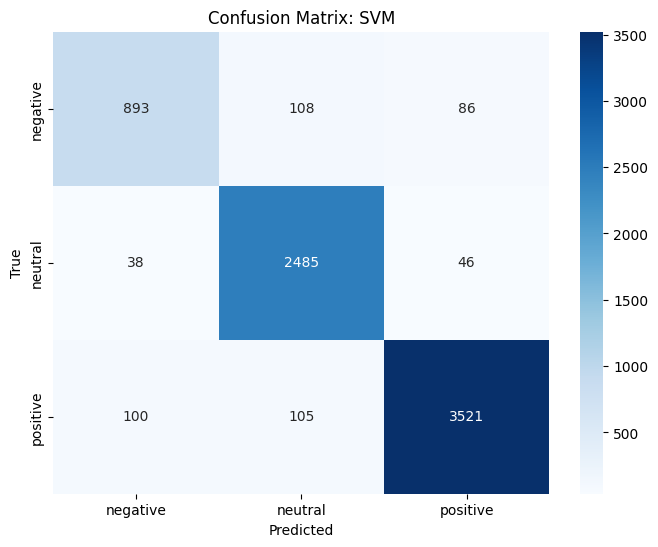

In [251]:
#confusion matrix
conf_matrix_svm = confusion_matrix(y_test, predictions_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: SVM')
plt.show()

### Bi-LSTM Model

In [132]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, SpatialDropout1D, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [133]:
#setting seed for reproducibility
tf.random.set_seed(42)

__Tokenization and Padding the data__

In [254]:
#printing unique words
unique_words = set(tesla_2['New_Tweets_model'].str.split(expand=True).stack())
print('The number of unique words:', (len(unique_words)))

The number of unique words: 20104


In [255]:
#setting 
num_words = 20100
max_len = 100
vocab_size = len(unique_words)
tokenizer = Tokenizer(num_words = vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [256]:
#padding data
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen = max_len, padding = 'post')
X_test_padded = pad_sequences(X_test_seq, maxlen = max_len, padding = 'post')

__Bi-LSTM Model__

In [257]:
#Bi-LSTM model
model_bilistm = Sequential()
model_bilistm.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_len))
model_bilistm.add(Bidirectional(LSTM(128, return_sequences=True)))
model_bilistm.add(Bidirectional(LSTM(64)))
model_bilistm.add(Dropout(0.2))
model_bilistm.add(Dense(256, activation='relu'))
model_bilistm.add(Dropout(0.2))
model_bilistm.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [258]:
model_bilistm.compile(optimizer=Adam(learning_rate=1e-4),
                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_bilistm.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 100, 100)          2010400   
                                                                 
 bidirectional_26 (Bidirect  (None, 100, 256)          234496    
 ional)                                                          
                                                                 
 bidirectional_27 (Bidirect  (None, 128)               164352    
 ional)                                                          
                                                                 
 dropout_26 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 256)               33024     
                                                                 
 dropout_27 (Dropout)        (None, 256)             

__Fitting the model__

In [259]:
#features to fit the model
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)
reduce_lr_loss = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 8, verbose = 1,
                                   min_delta = 1e-4, mode = 'min', min_lr=0.00001)
n_epochs = 30
batch_size = 128

In [260]:
%%time
#fit data
history_bilstm = model_bilistm.fit(X_train_padded,
                                   y_train,
                                   epochs = n_epochs,
                                   validation_split = 0.2,
                                   batch_size = batch_size,
                                   callbacks = [early_stopping, reduce_lr_loss])

Epoch 1/30
108/108 [==============================] - 149s 1s/step - loss: 0.9867 - accuracy: 0.5369 - val_loss: 0.8899 - val_accuracy: 0.6145 - lr: 1.0000e-04
Epoch 2/30
108/108 [==============================] - 141s 1s/step - loss: 0.8109 - accuracy: 0.6506 - val_loss: 0.6759 - val_accuracy: 0.7364 - lr: 1.0000e-04
Epoch 3/30
108/108 [==============================] - 140s 1s/step - loss: 0.5374 - accuracy: 0.7909 - val_loss: 0.5267 - val_accuracy: 0.7962 - lr: 1.0000e-04
Epoch 4/30
108/108 [==============================] - 139s 1s/step - loss: 0.3679 - accuracy: 0.8577 - val_loss: 0.4618 - val_accuracy: 0.8284 - lr: 1.0000e-04
Epoch 5/30
108/108 [==============================] - 141s 1s/step - loss: 0.2557 - accuracy: 0.9104 - val_loss: 0.4785 - val_accuracy: 0.8308 - lr: 1.0000e-04
Epoch 6/30
108/108 [==============================] - 139s 1s/step - loss: 0.1787 - accuracy: 0.9403 - val_loss: 0.5283 - val_accuracy: 0.8284 - lr: 1.0000e-04
Epoch 7/30
108/108 [====================

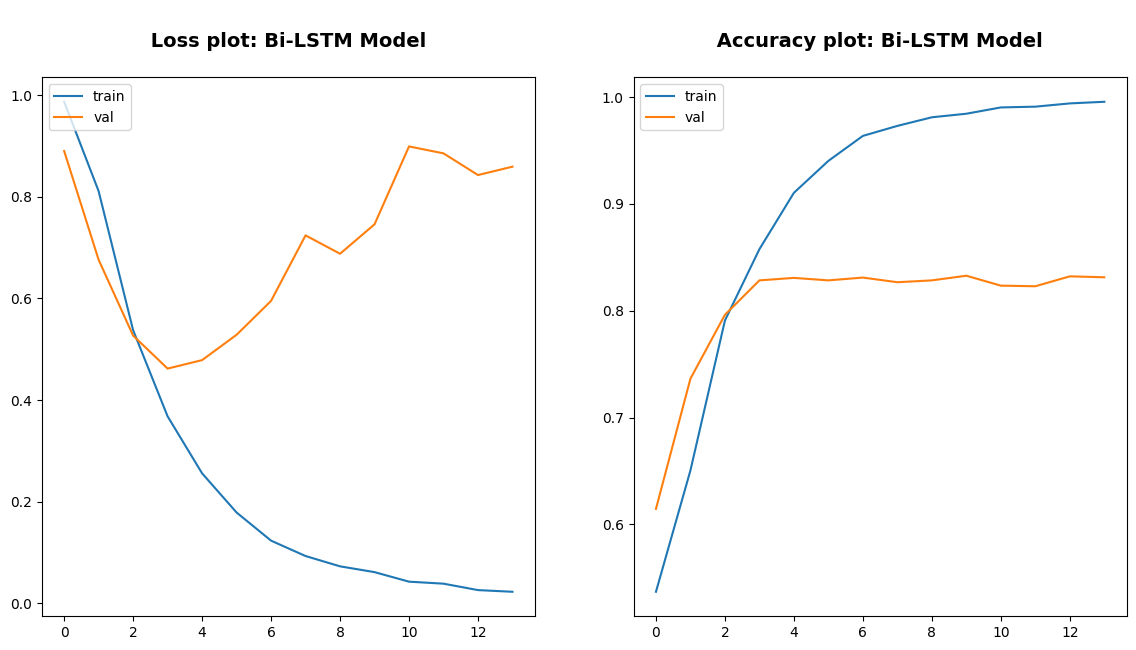

In [261]:
# Plotting Loss and Accuracy Graphs
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['loss'])
plt.plot(history_bilstm.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.title('\n Loss plot: Bi-LSTM Model \n',fontsize = 14, fontweight = 'bold')

plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['accuracy'])
plt.plot(history_bilstm.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.title('\n Accuracy plot: Bi-LSTM Model \n',fontsize = 14, fontweight = 'bold')
plt.show()

In [262]:
#predictions
y_pred_bi_lstm = model_bilistm.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred_bi_lstm, axis=1)

231/231 [==============================] - 48s 192ms/step


In [263]:
#classification report
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.43      0.37      0.40      1087
           1       0.90      0.84      0.87      2569
           2       0.85      0.92      0.89      3726

    accuracy                           0.81      7382
   macro avg       0.73      0.71      0.72      7382
weighted avg       0.81      0.81      0.81      7382



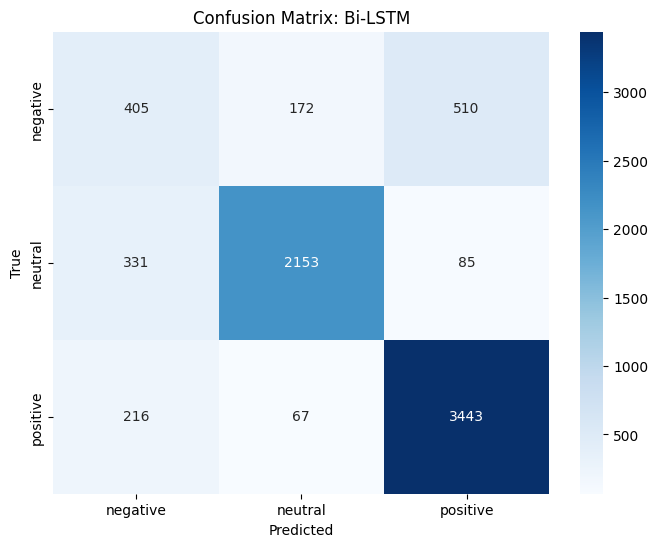

In [264]:
#xonfusion matrix
conf_matrix_bilstm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bilstm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Bi-LSTM')
plt.show()

### Bi-LSTM and GLOVE

In [79]:
# GLOVE embedding
GLOVE_EMBEDDING = r"C:\Users\olada\Downloads\final year project\glove.twitter.27B.100d.txt"

def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype="float32")

embeddings_index = dict(get_coefs(*g.rstrip().rsplit(" ")) for g in open(GLOVE_EMBEDDING, encoding="utf-8"))
embeddings = np.stack(embeddings_index.values())
embedding_mean, embedding_std = embeddings.mean(), embeddings.std()
embedding_size = embeddings.shape[1]



C:\Users\olada\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


In [266]:
#The glove embedding matrix
word_index = tokenizer.word_index
nb_words = min(num_words, len(word_index))

embedding_matrix = np.random.normal(embedding_mean, embedding_std, (num_words, embedding_size))
for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [267]:
#Bi-LSTM model
model_bilistm = Sequential()
model_bilistm.add(Embedding(input_dim = num_words,
                            weights = [embedding_matrix],
                            output_dim = 100,
                            input_length = max_len))

model_bilistm.add(Bidirectional(LSTM(64, return_sequences=True)))
model_bilistm.add(Bidirectional(LSTM(32)))
model_bilistm.add(Dropout(0.3))
model_bilistm.add(Dense(128, activation='relu'))
model_bilistm.add(Dropout(0.3))
model_bilistm.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [268]:
model_bilistm.compile(optimizer=Adam(learning_rate=1e-4),
                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_bilistm.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 100, 100)          2010000   
                                                                 
 bidirectional_28 (Bidirect  (None, 100, 128)          84480     
 ional)                                                          
                                                                 
 bidirectional_29 (Bidirect  (None, 64)                41216     
 ional)                                                          
                                                                 
 dropout_28 (Dropout)        (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 128)               8320      
                                                                 
 dropout_29 (Dropout)        (None, 128)             

In [269]:
%%time
#fit data
history_bilstm = model_bilistm.fit(X_train_padded,
                                   y_train,
                                   epochs = n_epochs,
                                   validation_split = 0.2,
                                   batch_size = batch_size,
                                   callbacks = [early_stopping, reduce_lr_loss])

Epoch 1/30
108/108 [==============================] - 106s 913ms/step - loss: 0.9367 - accuracy: 0.5730 - val_loss: 0.8324 - val_accuracy: 0.6496 - lr: 1.0000e-04
Epoch 2/30
108/108 [==============================] - 96s 893ms/step - loss: 0.8104 - accuracy: 0.6605 - val_loss: 0.7369 - val_accuracy: 0.6943 - lr: 1.0000e-04
Epoch 3/30
108/108 [==============================] - 97s 899ms/step - loss: 0.6986 - accuracy: 0.7108 - val_loss: 0.6062 - val_accuracy: 0.7475 - lr: 1.0000e-04
Epoch 4/30
108/108 [==============================] - 97s 902ms/step - loss: 0.5888 - accuracy: 0.7634 - val_loss: 0.5408 - val_accuracy: 0.7861 - lr: 1.0000e-04
Epoch 5/30
108/108 [==============================] - 98s 905ms/step - loss: 0.5133 - accuracy: 0.8012 - val_loss: 0.4873 - val_accuracy: 0.8107 - lr: 1.0000e-04
Epoch 6/30
108/108 [==============================] - 98s 908ms/step - loss: 0.4557 - accuracy: 0.8294 - val_loss: 0.4536 - val_accuracy: 0.8267 - lr: 1.0000e-04
Epoch 7/30
108/108 [=======

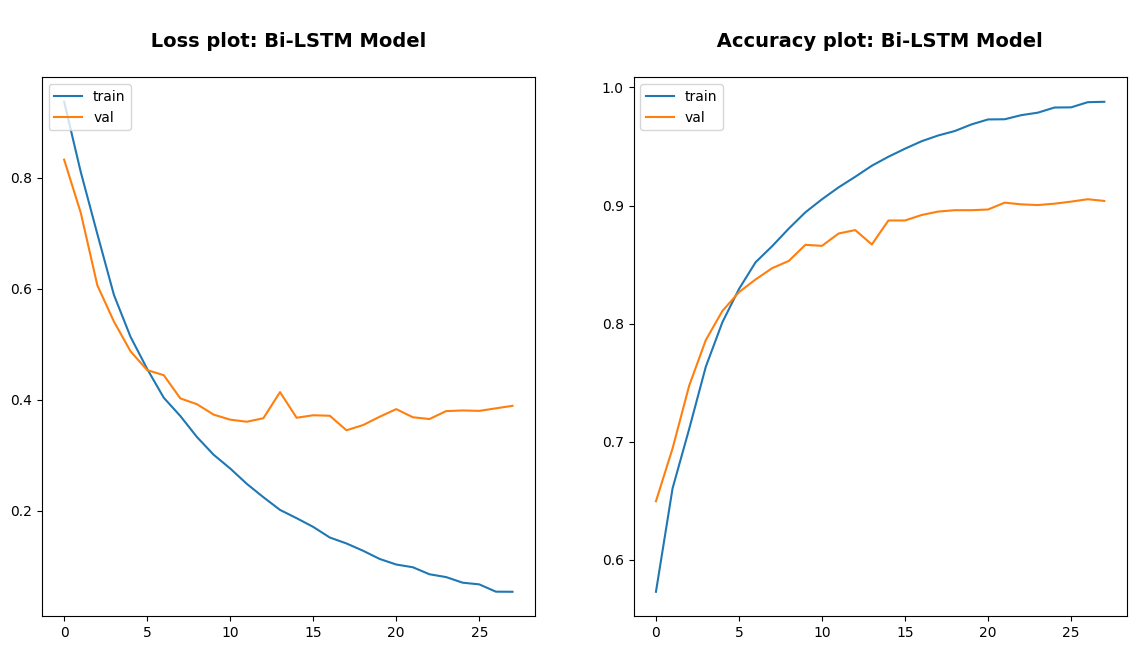

In [270]:
# Plotting Loss and Accuracy Graphs
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['loss'])
plt.plot(history_bilstm.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.title('\n Loss plot: Bi-LSTM Model \n',fontsize = 14, fontweight = 'bold')

plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['accuracy'])
plt.plot(history_bilstm.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.title('\n Accuracy plot: Bi-LSTM Model \n',fontsize = 14, fontweight = 'bold')
plt.show()

In [271]:
#predictions
y_pred_bi_lstm = model_bilistm.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred_bi_lstm, axis=1)

231/231 [==============================] - 23s 95ms/step


In [272]:
#classification report
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1087
           1       0.87      0.93      0.90      2569
           2       0.93      0.92      0.93      3726

    accuracy                           0.89      7382
   macro avg       0.87      0.85      0.86      7382
weighted avg       0.89      0.89      0.89      7382



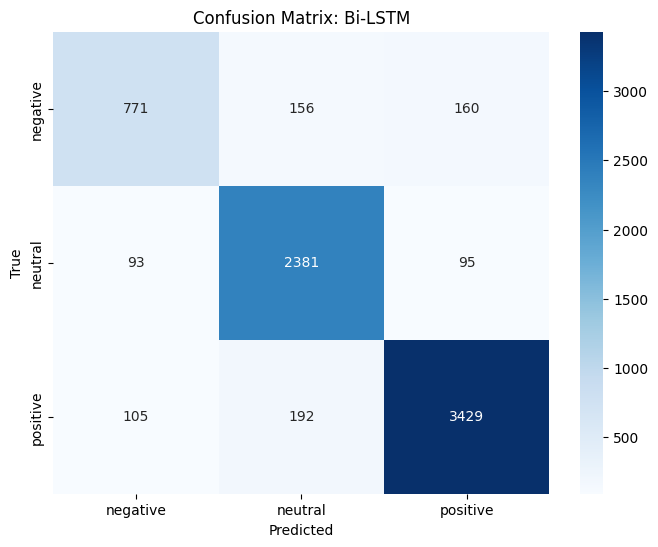

In [273]:
#xonfusion matrix
conf_matrix_bilstm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bilstm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Bi-LSTM')
plt.show()

### Bi-LSTM and WORD2VEC

In [274]:
import gensim
from gensim.models import Word2Vec

In [275]:
#Word2vec embedding
Embedding_dimensions = 100
Word2vec_train_data = list(map(lambda x: x.split(), tesla_2['New_Tweets_model']))
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size = Embedding_dimensions,
                 workers = 8,
                 min_count = 5)

print("Vocabulary Length of Word2vec:", len(word2vec_model.wv.key_to_index))

Vocabulary Length of Word2vec: 5848


In [276]:
#vocabulary size
vocab_length = len(tokenizer.word_index) + 1
tokenizer.num_words = vocab_size
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 17026


In [277]:
#Embedding matrix
embedding_matrix_w2v = np.zeros((vocab_length, Embedding_dimensions))
for word, token in tokenizer.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix_w2v[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix_w2v.shape)

Embedding Matrix Shape: (17026, 100)


In [278]:
#Bi-LSTM model
model_bilistm = Sequential()
model_bilistm.add(Embedding(input_dim = vocab_length,
                            weights = [embedding_matrix_w2v],
                            output_dim = 100,
                            input_length = max_len))

model_bilistm.add(Bidirectional(LSTM(64, return_sequences=True)))
model_bilistm.add(Bidirectional(LSTM(32)))
model_bilistm.add(Dropout(0.3))
model_bilistm.add(Dense(128, activation='relu'))
model_bilistm.add(Dropout(0.3))
model_bilistm.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [279]:
model_bilistm.compile(optimizer=Adam(learning_rate=1e-4),
                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_bilistm.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 100, 100)          1702600   
                                                                 
 bidirectional_30 (Bidirect  (None, 100, 128)          84480     
 ional)                                                          
                                                                 
 bidirectional_31 (Bidirect  (None, 64)                41216     
 ional)                                                          
                                                                 
 dropout_30 (Dropout)        (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 128)               8320      
                                                                 
 dropout_31 (Dropout)        (None, 128)             

In [280]:
%%time
#fit data
history_bilstm = model_bilistm.fit(X_train_padded,
                                   y_train,
                                   epochs = n_epochs,
                                   validation_split = 0.2,
                                   batch_size = batch_size,
                                   callbacks = [early_stopping, reduce_lr_loss])

Epoch 1/30
108/108 [==============================] - 113s 978ms/step - loss: 0.9722 - accuracy: 0.5535 - val_loss: 0.8725 - val_accuracy: 0.6235 - lr: 1.0000e-04
Epoch 2/30
108/108 [==============================] - 105s 971ms/step - loss: 0.8430 - accuracy: 0.6478 - val_loss: 0.7899 - val_accuracy: 0.6711 - lr: 1.0000e-04
Epoch 3/30
108/108 [==============================] - 106s 987ms/step - loss: 0.7788 - accuracy: 0.6859 - val_loss: 0.7329 - val_accuracy: 0.7042 - lr: 1.0000e-04
Epoch 4/30
108/108 [==============================] - 107s 988ms/step - loss: 0.6840 - accuracy: 0.7263 - val_loss: 0.6314 - val_accuracy: 0.7509 - lr: 1.0000e-04
Epoch 5/30
108/108 [==============================] - 107s 990ms/step - loss: 0.5530 - accuracy: 0.7912 - val_loss: 0.5231 - val_accuracy: 0.7980 - lr: 1.0000e-04
Epoch 6/30
108/108 [==============================] - 105s 973ms/step - loss: 0.4182 - accuracy: 0.8503 - val_loss: 0.4959 - val_accuracy: 0.8157 - lr: 1.0000e-04
Epoch 7/30
108/108 [==

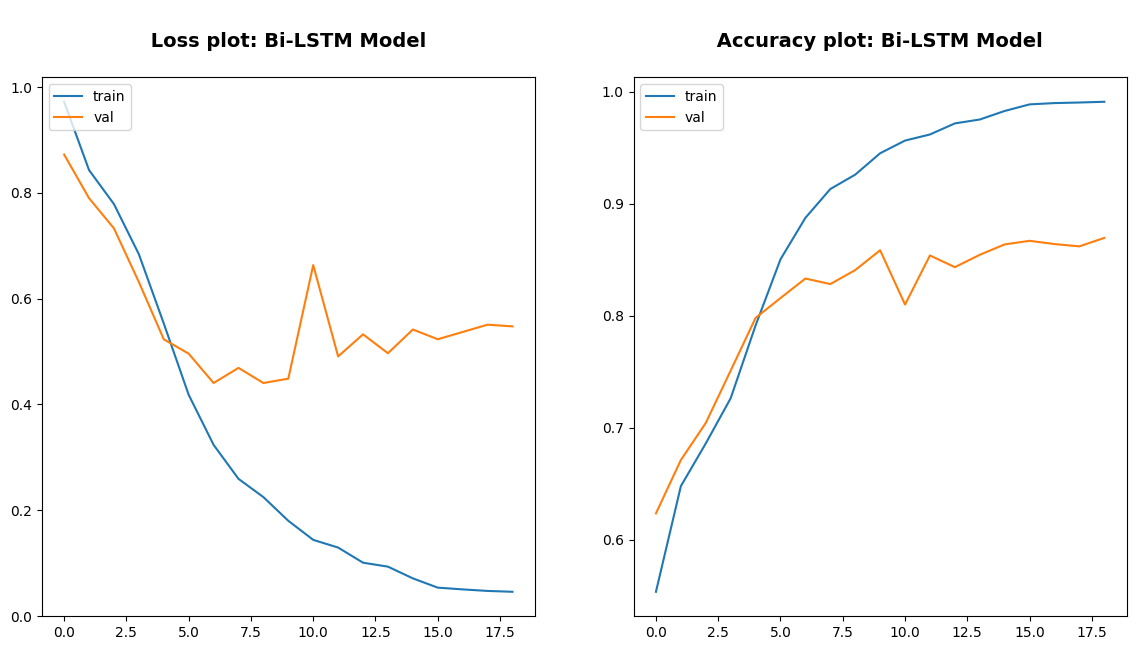

In [281]:
# Plotting Loss and Accuracy Graphs
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['loss'])
plt.plot(history_bilstm.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.title('\n Loss plot: Bi-LSTM Model \n',fontsize = 14, fontweight = 'bold')

plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['accuracy'])
plt.plot(history_bilstm.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.title('\n Accuracy plot: Bi-LSTM Model \n',fontsize = 14, fontweight = 'bold')
plt.show()

In [282]:
#predictions
y_pred_bi_lstm = model_bilistm.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred_bi_lstm, axis=1)

231/231 [==============================] - 24s 100ms/step


In [283]:
#classification report
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.53      0.61      0.57      1087
           1       0.86      0.91      0.88      2569
           2       0.95      0.87      0.91      3726

    accuracy                           0.84      7382
   macro avg       0.78      0.80      0.79      7382
weighted avg       0.86      0.84      0.85      7382



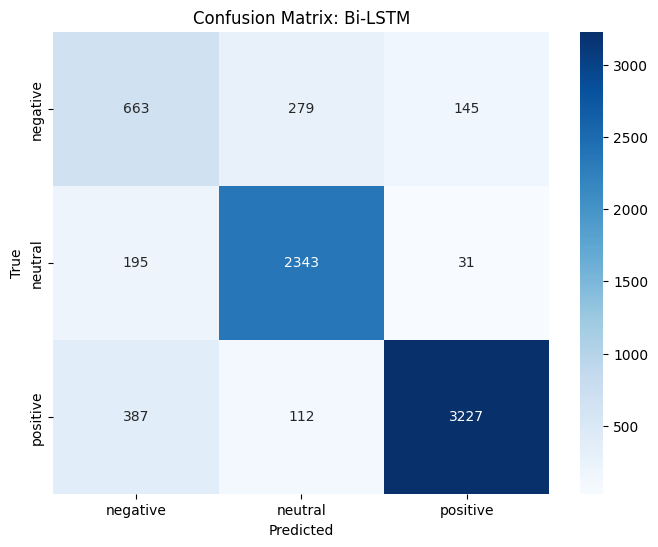

In [284]:
#xonfusion matrix
conf_matrix_bilstm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bilstm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Bi-LSTM')
plt.show()

### BI-LSTM AND FASTTEXT

In [285]:
import fasttext

In [286]:
# Create a vocabulary of words from the data
X = tesla_2['New_Tweets_model']
corpus = [word for text in X for word in text.split()]
count_words = Counter(corpus)
sorted_words = count_words.most_common()
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

In [287]:
# Save the text data to a file
with open('corpus.txt', 'w') as f:
    for text in X:
        f.write(text + '\n')

In [288]:
# Create a FastText model
model = fasttext.train_unsupervised('corpus.txt', model='skipgram', dim=100)

In [289]:
# # Initialize the embedding matrix
# VOCAB_SIZE = len(vocab_to_int) + 1 #+1 for the padding
# EMBEDDING_DIM = model.get_dimension()
# embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))



# Initialize the embedding matrix with FastText embeddings
VOCAB_SIZE = len(vocab_to_int) + 1 #+1 for the padding
EMBEDDING_DIM = model.get_dimension()
embedding_matrix_fst = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))
for word, i in vocab_to_int.items():
    if word in model.words:
        embedding_matrix_fst[i] = model.get_word_vector(word)

In [290]:
# # Update the embedding matrix with the FastText embeddings
# for word, i in vocab_to_int.items():
#     embedding_matrix[i] = model.get_word_vector(word)

# Print the shape of the embedding matrix
print("Embedding Matrix Shape:", embedding_matrix_fst.shape)

Embedding Matrix Shape: (20105, 100)


In [291]:
# Tokenize the data using the vocabulary
text_int = []
for text in X:
    r = [vocab_to_int[word] for word in text.split()]
    text_int.append(r)

In [292]:
#Bi-LSTM model
model_bilistm = Sequential()
model_bilistm.add(Embedding(input_dim = VOCAB_SIZE,
                            weights = [embedding_matrix_fst],
                            output_dim = EMBEDDING_DIM,
                            input_length = max_len))

model_bilistm.add(Bidirectional(LSTM(64, return_sequences=True)))
model_bilistm.add(Bidirectional(LSTM(32)))
model_bilistm.add(Dropout(0.3))
model_bilistm.add(Dense(128, activation='relu'))
model_bilistm.add(Dropout(0.3))
model_bilistm.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [293]:
model_bilistm.compile(optimizer=Adam(learning_rate=1e-4),
                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_bilistm.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 100, 100)          2010500   
                                                                 
 bidirectional_32 (Bidirect  (None, 100, 128)          84480     
 ional)                                                          
                                                                 
 bidirectional_33 (Bidirect  (None, 64)                41216     
 ional)                                                          
                                                                 
 dropout_32 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 128)               8320      
                                                                 
 dropout_33 (Dropout)        (None, 128)             

In [294]:
%%time
#fit data
history_bilstm = model_bilistm.fit(X_train_padded,
                                   y_train,
                                   epochs = n_epochs,
                                   validation_split = 0.2,
                                   batch_size = batch_size,
                                   callbacks = [early_stopping, reduce_lr_loss])

Epoch 1/30
108/108 [==============================] - 116s 981ms/step - loss: 1.0176 - accuracy: 0.4863 - val_loss: 0.9395 - val_accuracy: 0.5364 - lr: 1.0000e-04
Epoch 2/30
108/108 [==============================] - 104s 966ms/step - loss: 0.8954 - accuracy: 0.6101 - val_loss: 0.8209 - val_accuracy: 0.6589 - lr: 1.0000e-04
Epoch 3/30
108/108 [==============================] - 104s 961ms/step - loss: 0.8234 - accuracy: 0.6571 - val_loss: 0.7654 - val_accuracy: 0.6813 - lr: 1.0000e-04
Epoch 4/30
108/108 [==============================] - 105s 971ms/step - loss: 0.7433 - accuracy: 0.7033 - val_loss: 0.6699 - val_accuracy: 0.7266 - lr: 1.0000e-04
Epoch 5/30
108/108 [==============================] - 104s 961ms/step - loss: 0.5910 - accuracy: 0.7724 - val_loss: 0.5437 - val_accuracy: 0.7901 - lr: 1.0000e-04
Epoch 6/30
108/108 [==============================] - 104s 964ms/step - loss: 0.4364 - accuracy: 0.8369 - val_loss: 0.4811 - val_accuracy: 0.8142 - lr: 1.0000e-04
Epoch 7/30
108/108 [==

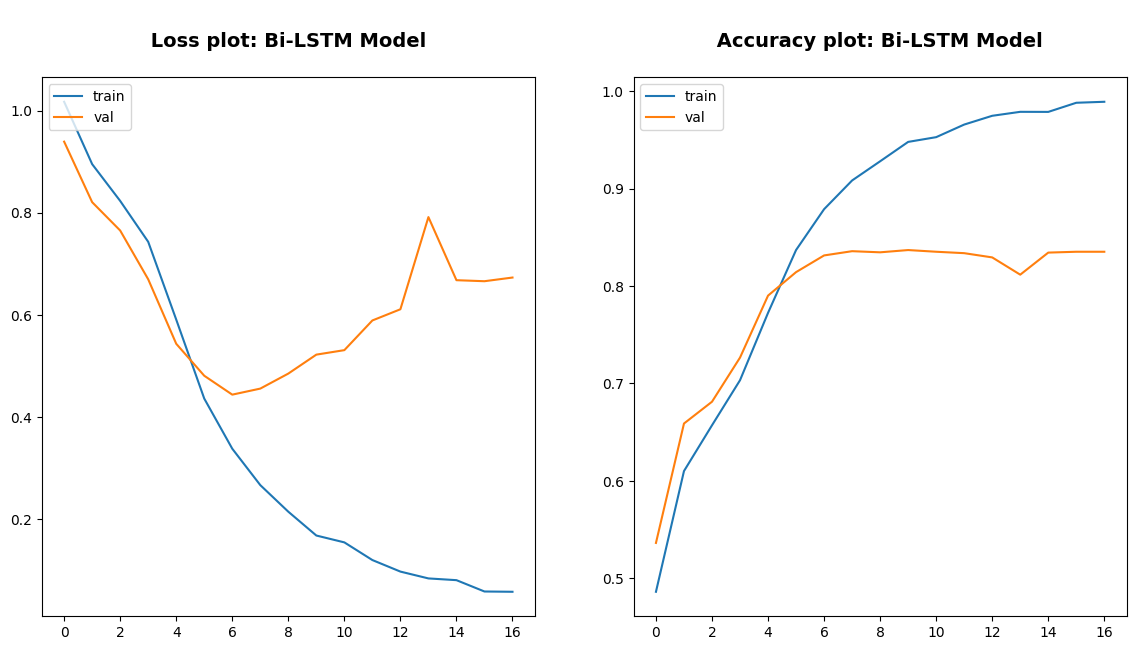

In [304]:
# Plotting Loss and Accuracy Graphs
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['loss'])
plt.plot(history_bilstm.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.title('\n Loss plot: Bi-LSTM Model \n',fontsize = 14, fontweight = 'bold')

plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['accuracy'])
plt.plot(history_bilstm.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.title('\n Accuracy plot: Bi-LSTM Model \n',fontsize = 14, fontweight = 'bold')
plt.show()

In [305]:
#predictions
y_pred_bi_lstm = model_bilistm.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred_bi_lstm, axis=1)

231/231 [==============================] - 22s 97ms/step


In [306]:
#classification report
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.48      0.42      0.45      1087
           1       0.86      0.82      0.84      2569
           2       0.85      0.91      0.88      3726

    accuracy                           0.81      7382
   macro avg       0.73      0.72      0.72      7382
weighted avg       0.80      0.81      0.80      7382



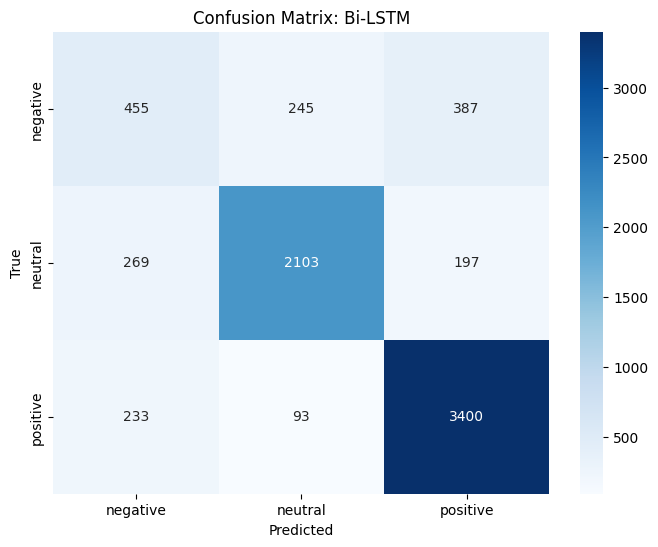

In [307]:
#xonfusion matrix
conf_matrix_bilstm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bilstm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Bi-LSTM')
plt.show()

### BERT

In [134]:
import transformers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from transformers import BertModel, TFBertModel 
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
from transformers import AutoTokenizer
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

__Data Cleaning for Transformers__

In [135]:
#https://www.kaggle.com/code/rajmehra03/a-complete-tweet-classfication-guide-word2vec-lstm
#https://www.kaggle.com/code/chirag9073/amazon-fine-food-reviews-sentiment-analysis
#https://www.kaggle.com/code/faressayah/sentiment-model-with-tensorflow-transformers

"""
Function to carry out the required tweet preprocessing for the transformer models
"""

def clean_text_BERT(tweet):
    #remove urls
    tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet)

    #remove html
    tweet = re.sub(r'<.*?>', '', tweet)

    #remove username
    tweet = re.sub('@[^\s]+', '', tweet)

    #remove hashtags
    tweet = re.sub(r'#\w+\s*', '', tweet)

    return tweet

#Doing the cleaning for the transformers
tesla_2['BERT'] = tesla_2['Tweet'].apply(clean_text_BERT)
tesla_2.head(2)

Username            UTC Date  \
0  @doctorgfitness 2022-12-07 22:23:51   
1   @elonchieftwit 2022-12-07 22:15:02   

                                                                                                                                   Tweet  \
0                  @brent_peabody Are they assuming that once #Elon is gone the #Tesla will be gone too? Tesla is bigger than #ElonMusk.   
1  EM @elonmusk Germany’s EVs Near 40% Share – Tesla Model 3 Bestseller - CleanTechnica https://t.co/7UpZLR38eL #ElonMusk #Tesla #SpaceX   

               Location  Followers  \
0            Arvada, CO     2880.0   
1  Raya Lucaria Academy      288.0   

                                                                                                                                                    Bio  \
0  Take charge of your health and fitness! Be More, Do More, Expect More of Yourself! Question Mainstream Narratives! Be Kind to Strangers and Animals!   
1                                                                                                                                                   NaN   

         Date                                                   New_Tweets  \
0  2022-12-07                        Are assuming gone gone ? Tesla bigger   
1  2022-12-07  Germany EVs Near Share Tesla Model Bestseller CleanTechnica   

                                                  New_Tweets_2  \
0                        Are assuming gone gone ? Tesla bigger   
1  Germany EVs Near Share Tesla Model Bestseller CleanTechnica   

                     hashtag  ... language Words_in_Tweet  \
0    [Elon, Tesla, ElonMusk]  ...       it              7   
1  [ElonMusk, Tesla, SpaceX]  ...       en              8   

  Vader_compound_score Vader_sentiment  Blob_sentiment  Voted_label  \
0                0.000         neutral         neutral      neutral   
1                0.296        positive        positive     positive   

   date_month month_year  \
0  07-12-2022    2022-12   
1  07-12-2022    2022-12   

                                               New_Tweets_model  \
0                               assuming gone gone tesla bigger   
1  germanys evs near share tesla model bestseller cleantechnica   

                                                                                BERT  
0   Are they assuming that once is gone the will be gone too? Tesla is bigger than .  
1      EM  Germany’s EVs Near 40% Share – Tesla Model 3 Bestseller - CleanTechnica    

[2 rows x 23 columns]

In [136]:
#average number of words
average_words_bert = int(tesla_2['BERT'].apply(lambda x: len(x.split())).mean())
average_words_bert

19

In [137]:
#maximum words
max_words_bert = int(tesla_2['BERT'].apply(lambda x: len(x.split())).max())
max_words_bert

57

In [151]:
#https://www.kaggle.com/code/sadikaljarif/fake-news-detection-using-bert
#setting features and targets
max_len = 100
data_text = tesla_2['BERT']
data_label = tesla_2['Voted_label']


bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [152]:
#model tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [153]:
#splitting the data
X_train_bert, X_test_bert, Y_train_bert, Y_test_bert = train_test_split(data_text,
                                                                        data_label,
                                                                        stratify = data_label,
                                                                        test_size = 0.2,
                                                                        random_state =42)

print('X_train shape:', X_train_bert.shape)
print('X_test shape:', X_test_bert.shape)
print('y_train shape:', Y_train_bert.shape)
print('y_test shape:', Y_test_bert.shape)

print('\n')
print('Ytrain class counts')
class_counts = pd.Series(Y_train_bert).value_counts()
print("Class Counts:")
print(class_counts)

X_train shape: (19683,)
X_test shape: (4921,)
y_train shape: (19683,)
y_test shape: (4921,)


Ytrain class counts
Class Counts:
Voted_label
positive    10053
neutral      6754
negative     2876
Name: count, dtype: int64


In [154]:
#tokenization
def tokenize(X):
    
    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = max_len,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

X_train_token = tokenize(X_train_bert)
X_test_token = tokenize(X_test_bert)

In [155]:
#create bert model
def create_model():
    dropout_rate=0.2
    input_ids=Input(shape=(max_len,),dtype=tf.int32)
    input_mask=Input(shape=(max_len,),dtype=tf.int32)
    bert_layer=bert_model([input_ids,input_mask])[1]
    x=Dropout(0.5)(bert_layer)
    x=Dense(128,activation="tanh")(x)
    x=Dropout(0.2)(x)
    x=Dense(3,activation="softmax")(x)
    model = Model(inputs=[input_ids, input_mask], outputs=x)
    return model

In [156]:
#create the model
model=create_model()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 tf_bert_model_2 (TFBertMod  TFBaseModelOutputWithPooli   1094822   ['input_3[0][0]',             
 el)                         ngAndCrossAttentions(last_   40         'input_4[0][0]']             
                             hidden_state=(None, 100, 7                                           
                             68),                                                           

In [157]:
#optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-04, epsilon=1e-08, clipnorm=1.0)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [158]:
#encoding labels
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train_bert)
Y_train_onehot = to_categorical(Y_train_encoded, num_classes=3)

In [159]:
#callbacks
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', verbose=1,
                                            patience=10,baseline=0.4,min_delta=0.0001,restore_best_weights=False)

In [162]:
%%time
#fitting the model
history_bert = model.fit(x={'input_3': X_train_token['input_ids'],
                            'input_4': X_train_token['attention_mask']},
                         y=Y_train_onehot,
                         epochs = 5,
                         validation_split = 0.2, 
                         batch_size = 32,
                         callbacks=[callback])

Epoch 1/5
493/493 [==============================] - 3019s 6s/step - loss: 0.3083 - accuracy: 0.9026 - val_loss: 0.2076 - val_accuracy: 0.9307
Epoch 2/5
493/493 [==============================] - 3046s 6s/step - loss: 0.1248 - accuracy: 0.9644 - val_loss: 0.1745 - val_accuracy: 0.9596
Epoch 3/5
493/493 [==============================] - 3047s 6s/step - loss: 0.0738 - accuracy: 0.9808 - val_loss: 0.1513 - val_accuracy: 0.9611
Epoch 4/5
493/493 [==============================] - 3037s 6s/step - loss: 0.0602 - accuracy: 0.9841 - val_loss: 0.1844 - val_accuracy: 0.9586
Epoch 5/5
493/493 [==============================] - 3035s 6s/step - loss: 0.0429 - accuracy: 0.9902 - val_loss: 0.2382 - val_accuracy: 0.9591
CPU times: total: 1d 5h 57min 11s
Wall time: 4h 13min 4s


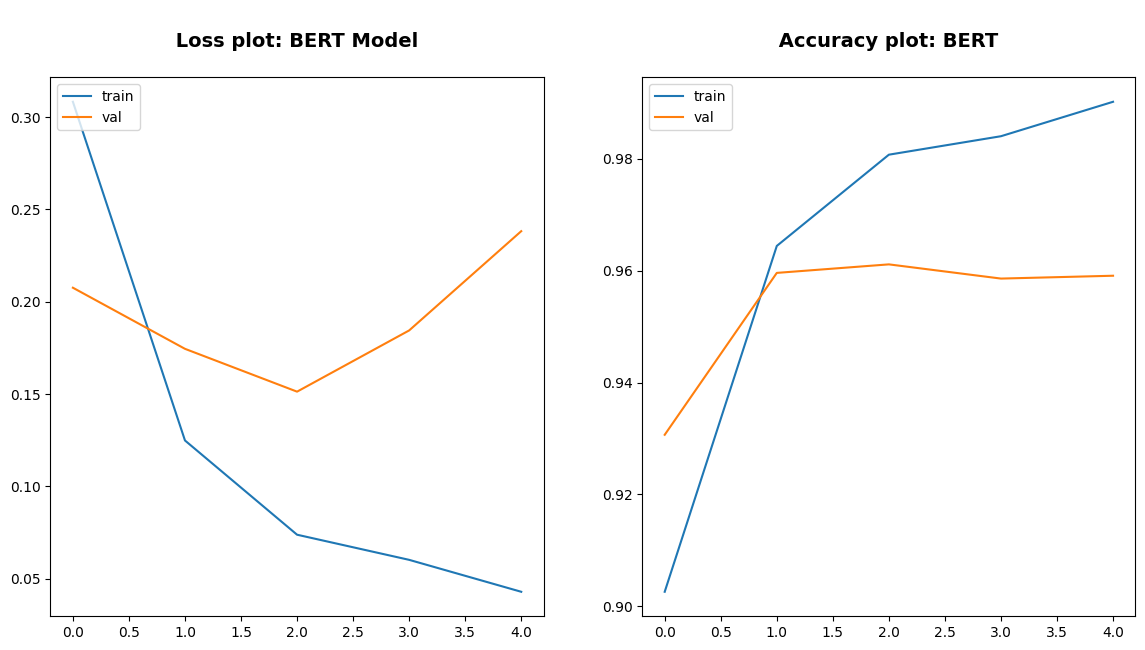

In [163]:
# Plotting Loss and Accuracy Graphs
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history_bert.history['loss'])
plt.plot(history_bert.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.title('\n Loss plot: BERT Model \n',fontsize = 14, fontweight = 'bold')

plt.subplot(1, 2, 2)
plt.plot(history_bert.history['accuracy'])
plt.plot(history_bert.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.title('\n Accuracy plot: BERT \n',fontsize = 14, fontweight = 'bold')
plt.show()

In [165]:
#predictions
Y_pred = model.predict({'input_3': X_test_token['input_ids'], 'input_4': X_test_token['attention_mask']})
Y_pred_labels = np.argmax(Y_pred, axis=1)

Y_pred_labels = label_encoder.inverse_transform(Y_pred_labels)
class_names = ['Negative', 'Neutral', 'Positive']
report = classification_report(Y_test_bert, Y_pred_labels, target_names=class_names)

154/154 [==============================] - 266s 2s/step


In [166]:
#classification report
print(report)

              precision    recall  f1-score   support

    Negative       0.91      0.90      0.91       719
     Neutral       0.97      0.96      0.96      1689
    Positive       0.96      0.97      0.97      2513

    accuracy                           0.96      4921
   macro avg       0.95      0.94      0.95      4921
weighted avg       0.96      0.96      0.96      4921



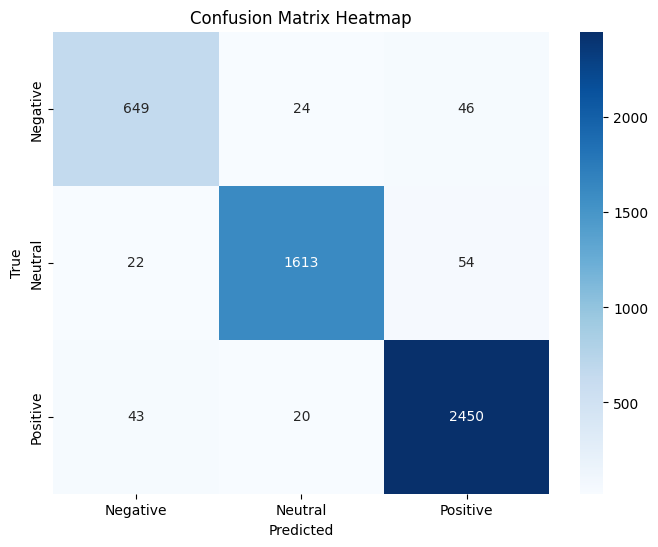

In [167]:
#confusion matrix
conf_matrix = confusion_matrix(Y_test_bert, Y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()